# Importation des librairies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import io 
import geopandas as gpd
%matplotlib inline

# Lecture des fichiers

## Premier fichier

In [3]:
data = pd.read_csv('C:\\Users\\laeti\\OneDrive\\Documents\\P2\\EdStatsCountry.csv')

In [189]:
data.shape

(241, 32)

Donc j'ai 241 individus décrit sur 32 variables

In [5]:
data.head(10)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN
5,ARB,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ARE,United Arab Emirates,United Arab Emirates,United Arab Emirates,AE,U.A.E. dirham,April 2013 database update: Based on data from...,Middle East & North Africa,High income: nonOECD,AE,...,General Data Dissemination System (GDDS),2010,NaN,NaN,NaN,2012,NaN,2011.0,2005,NaN
7,ARG,Argentina,Argentina,Argentine Republic,AR,Argentine peso,NaN,Latin America & Caribbean,Upper middle income,AR,...,Special Data Dissemination Standard (SDDS),2010,"Multiple Indicator Cluster Survey (MICS), 2011/12","Integrated household survey (IHS), 2012",Yes,2013,2002.0,2012.0,2000,NaN
8,ARM,Armenia,Armenia,Republic of Armenia,AM,Armenian dram,NaN,Europe & Central Asia,Lower middle income,AM,...,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2010","Integrated household survey (IHS), 2012",Yes,2013/14,NaN,2012.0,2007,NaN
9,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,NaN,East Asia & Pacific,Upper middle income,AS,...,NaN,2010,NaN,NaN,Yes,2007,NaN,NaN,NaN,NaN


In [190]:
print(data.columns.tolist())# permet d'afficher toutes les colonnes de data

['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code', 'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code', 'National accounts base year', 'National accounts reference year', 'SNA price valuation', 'Lending category', 'Other groups', 'System of National Accounts', 'Alternative conversion factor', 'PPP survey year', 'Balance of Payments Manual in use', 'External debt Reporting status', 'System of trade', 'Government Accounting concept', 'IMF data dissemination standard', 'Latest population census', 'Latest household survey', 'Source of most recent Income and expenditure data', 'Vital registration complete', 'Latest agricultural census', 'Latest industrial data', 'Latest trade data', 'Latest water withdrawal data', 'Unnamed: 31']


Ce fichier donne donc les noms des pays par ordre alphabétique. Il donne une abréviation du nom des pays, des notes spéciales, la région du monde où se situe le pays. Il désigne si le pays a un revenu moyen, inférieur, supérieur,.. Il donne la norme de diffusion des données du FMI, la date du dernier recensement de la population. Il donne le nom et la date de la dernière enquête auprès des ménages ainsi que le nom de la source des dernières données sur le revenu et les dépenses. Il donne aussi l'état de l'enregistrement à l'état civi, le dernier recensement agricole, les dernières données industrielles, les dernières données comerciales, les dernières données de prélèvement de l'eau et une variable anonyme.

## Deuxième fichier

In [5]:
data2 = pd.read_csv('C:\\Users\\laeti\\OneDrive\\Documents\\P2\\EdStatsCountry-Series.csv')

In [7]:
data2.shape

(613, 4)

In [8]:
data2.head(10)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
5,AFG,NY.GDP.MKTP.PP.KD,Estimates are based on regression.,NaN
6,AFG,NY.GNP.MKTP.PP.CD,Estimates are based on regression.,NaN
7,AFG,NY.GDP.MKTP.PP.CD,Estimates are based on regression.,NaN
8,AFG,NY.GDP.PCAP.PP.KD,Estimates are based on regression.,NaN
9,AFG,NY.GNP.PCAP.PP.CD,Estimates are based on regression.,NaN


Ce fichier comprend les code des pays, les series code et une description

In [9]:
data2.dtypes # Permet de voir le type de variable. 

CountryCode     object
SeriesCode      object
DESCRIPTION     object
Unnamed: 3     float64
dtype: object

## Troisième fichier

In [6]:
data3 = pd.read_csv('C:\\Users\\laeti\\OneDrive\\Documents\\P2\\EdStatsData.csv')

In [8]:
data3.shape

(886930, 70)

In [12]:
data3.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.365540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,43.351101,43.318150,44.640701,45.845718,46.449501,48.363892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Arab World,ARB,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.658570,0.656400,0.663290,0.672040,0.672610,0.691760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Arab World,ARB,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,65.826233,65.993584,67.301857,68.219078,69.059013,69.914551,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Arab World,ARB,"Adjusted net enrolment rate, upper secondary, ...",UIS.NERA.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Arab World,ARB,"Adjusted net enrolment rate, upper secondary, ...",UIS.NERA.3.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [236]:
print(data3.columns.tolist())

['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100', 'Unnamed: 69']


Ce fichier comprend le nom des pays, le code des pays, le nom des indicateur, le code des indicateur et les années

## Quatrième fichier

In [7]:
data4 = pd.read_csv('C:\\Users\\laeti\\OneDrive\\Documents\\P2\\EdStatsFootNote.csv')

In [14]:
data4.shape

(643638, 5)

In [15]:
data4.head(10)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN
5,ABW,SE.PRE.NENR,YR2000,Country estimation.,NaN
6,ABW,SE.SEC.ENRL.VO.FE,YR2005,Country estimation.,NaN
7,ABW,SE.SEC.ENRL.GC,YR2003,Country estimation.,NaN
8,ABW,SE.PRM.TCHR.FE,YR1999,Country estimation.,NaN
9,ABW,SE.PRE.TCHR.FE.ZS,YR2008,Country estimation.,NaN


## Cinquième fichier

In [8]:
data5 = pd.read_csv('C:\\Users\\laeti\\OneDrive\\Documents\\P2\\EdStatsSeries.csv')

In [17]:
data5.shape

(3665, 21)

In [18]:
data5.head(10)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,BAR.NOED.2024.ZS,Attainment,Barro-Lee: Percentage of population age 20-24 ...,Percentage of population age 20-24 with no edu...,Percentage of population age 20-24 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,BAR.NOED.2529.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 25-29 with...,Percentage of female population age 25-29 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,BAR.NOED.2529.ZS,Attainment,Barro-Lee: Percentage of population age 25-29 ...,Percentage of population age 25-29 with no edu...,Percentage of population age 25-29 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,BAR.NOED.25UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 25+ with n...,Percentage of female population age 25+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,BAR.NOED.25UP.ZS,Attainment,Barro-Lee: Percentage of population age 25+ wi...,Percentage of population age 25+ with no educa...,Percentage of population age 25+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [237]:
print(data5.columns.tolist())

['Series Code', 'Topic', 'Indicator Name', 'Short definition', 'Long definition', 'Unit of measure', 'Periodicity', 'Base Period', 'Other notes', 'Aggregation method', 'Limitations and exceptions', 'Notes from original source', 'General comments', 'Source', 'Statistical concept and methodology', 'Development relevance', 'Related source links', 'Other web links', 'Related indicators', 'License Type', 'Unnamed: 20']


Ce fichier comprend toutes les colonnes ci-dessus.

#  Fusionner les données pour avoir une data ( jointure)

Avant de faire une jointure, on enlève les doublons. 

In [9]:
data = data.drop_duplicates()

In [528]:
data.shape

(241, 32)

In [10]:
data2 = data2.drop_duplicates()

In [530]:
data2.shape

(613, 4)

On vérifie quels sont les élements de data qui sont dans data2 pour déterminer si on fait une jointure à gauche ou par union. 

In [85]:
len(data['Country Code'].unique()), len(data2['CountryCode'].unique()) #Renvoie des valeurs uniques basées 
#Les uniques sont renvoyés par ordre d'apparition. Cela ne trie pas.

(241, 211)

In [86]:
len(set(data['Country Code'].unique()).intersection(set(data2['CountryCode'].unique())))

211

In [87]:
len(set(data2['CountryCode'].unique())- set(data['Country Code'].unique()))

0

On fait la jointure entre les deux fichier. ```how = 'left'```  nous permet de faire la jointure à gauche 


In [11]:
df1 = pd.merge( data, data2, left_on="Country Code", right_on="CountryCode", how='left')

In [105]:
df1.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,Yes,NaN,NaN,2012.0,NaN,NaN,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,Yes,NaN,NaN,2012.0,NaN,NaN,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,NaN,2013/14,NaN,2012.0,2000,NaN,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,NaN,2013/14,NaN,2012.0,2000,NaN,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,NaN,2013/14,NaN,2012.0,2000,NaN,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [12]:
data3 = data3.drop_duplicates()

In [534]:
data3.shape

(886930, 70)

In [90]:
set(df1.columns).intersection(set(data3.columns))# On cherche les colonnes communes.

{'Country Code'}

In [100]:
len(df1['Country Code'].unique()), len(data3['Country Code'].unique())

(241, 242)

In [101]:
len(set(df1['Country Code'].unique()).intersection(set(data3['Country Code'].unique())))

241

In [102]:
len(set(data3['Country Code'].unique())- set(df1['Country Code'].unique()))

1

On fait la jointure entre les deux fichier. ```how = 'outer'```  nous permet de faire la jointure par union 

In [13]:
df2 = pd.merge(df1, data3, how='outer')

In [536]:
df2.head(5)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data4 = data4.drop_duplicates()

In [108]:
data4.shape

(643638, 5)

In [109]:
set(df2.columns).intersection(set(data4.columns))

{'CountryCode', 'DESCRIPTION', 'SeriesCode'}

In [15]:
df3 = pd.merge(df2,data4, on = ['CountryCode','SeriesCode'], how='outer')

In [540]:
df3.head(5)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69,Year,Unnamed: 4
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [541]:
df3.shape

(6052330, 107)

On va faire la jointure entre df3 et data5 pour avoir la base de données sur laquelle nous allons travailler : df

In [16]:
data5 = data5.drop_duplicates()

In [543]:
data5.shape

(3665, 21)

In [112]:
set(df3.columns).intersection(set(data5.columns))

{'Indicator Name'}

In [114]:
len(df3['Indicator Name'].unique()), len(data5['Indicator Name'].unique())

(3666, 3665)

In [115]:
len(set(df3['Indicator Name'].unique()).intersection(set(data5['Indicator Name'].unique())))

3203

In [116]:
len(set(data5['Indicator Name'].unique())- set(df3['Indicator Name'].unique()))

462

In [17]:
df = pd.merge(df3, data5, how='outer') 

In [32]:
df.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df.tail(10)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
6052782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6052783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6052784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6052785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6052786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6052787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6052788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6052789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6052790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6052791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics.,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [307]:
df.isnull().sum()# parcours chaque colonne et calcule pour chaque colonne la somme des valeurs manquantes

Country Code         643252
Short Name           646917
Table Name           646917
Long Name            646917
2-alpha code        1467877
                     ...   
Topic               1324702
Short definition    2985586
Long definition     1324702
Other notes         5319165
Source              1324702
Length: 65, dtype: int64

In [181]:
df.describe()# décrit statitiquement les données. Ici cela n'a pas de sens

,National accounts reference year,Latest industrial data,Latest trade data,1980,1985,1990,1995,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,2.836710e+06,3.533060e+06,4.167105e+06,6.073850e+05,6.212870e+05,8.184420e+05,8.630750e+05,7.582810e+05,1.127006e+06,7.516400e+05,...,8.193320e+05,8.661850e+05,8.048330e+05,8.591030e+05,1.623925e+06,8.231850e+05,9.417710e+05,8.623500e+05,6.684240e+05,8.847310e+05
mean,2.002251e+03,2.008790e+03,2.011503e+03,6.316631e+08,6.954121e+08,1.901906e+09,2.300531e+09,3.020377e+09,2.150915e+09,3.316509e+09,...,4.277561e+09,4.432857e+09,5.079434e+09,4.708356e+09,2.681546e+09,5.696008e+09,5.185710e+09,5.919507e+09,7.349749e+09,5.643610e+09
std,3.562904e+00,1.863515e+00,1.925673e+00,6.947246e+10,7.795072e+10,1.454164e+11,1.704206e+11,2.083256e+11,1.796595e+11,2.257090e+11,...,2.902096e+11,3.044268e+11,3.327359e+11,3.185268e+11,2.470819e+11,3.709961e+11,3.603596e+11,3.925012e+11,4.389000e+11,3.904489e+11
min,1.987000e+03,2.000000e+03,1.995000e+03,-1.404240e+00,-2.216315e+00,-1.803750e+00,-2.697722e+00,-6.526000e+04,-6.759300e+04,-6.973700e+04,...,-3.708940e+05,-3.882170e+05,-4.088540e+05,-4.561240e+05,-4.969050e+05,-5.709940e+05,-6.049930e+05,-6.157480e+05,-8.900000e+01,-2.467847e+00
25%,2.000000e+03,2.007000e+03,2.012000e+03,1.350000e+00,1.550000e+00,3.932110e+00,4.390000e+00,1.384774e+01,4.770000e+00,1.385140e+01,...,1.119379e+01,1.154136e+01,1.140000e+01,1.110000e+01,1.230000e+00,1.389522e+01,9.234830e+00,1.181575e+01,1.656601e+01,4.600000e-01
50%,2.001000e+03,2.010000e+03,2.012000e+03,9.617790e+00,9.650000e+00,4.322000e+01,4.177000e+01,4.591370e+02,4.459000e+01,8.380000e+02,...,1.000000e+02,9.902244e+01,1.004255e+02,9.910039e+01,2.148512e+01,9.935671e+01,9.214425e+01,9.965207e+01,9.972076e+01,4.415775e+01
75%,2.007000e+03,2.010000e+03,2.012000e+03,7.000000e+01,6.800000e+01,6.568675e+04,4.385300e+04,1.957400e+05,2.399100e+04,2.115905e+05,...,1.589350e+05,1.134320e+05,1.783790e+05,1.271625e+05,1.368000e+03,1.227590e+05,8.089800e+04,1.545408e+05,1.629690e+05,3.549400e+04
max,2.012000e+03,2.010000e+03,2.012000e+03,2.784319e+13,3.166465e+13,4.714344e+13,5.275448e+13,6.040632e+13,6.327293e+13,6.477834e+13,...,8.031840e+13,8.469145e+13,8.711022e+13,8.677516e+13,9.134676e+13,9.506314e+13,9.999473e+13,1.054580e+14,1.108060e+14,1.156198e+14


In [92]:
df['SeriesCode'].unique()

array(['SP.POP.TOTL', 'SP.POP.GROW', 'NY.GDP.PCAP.PP.CD', ...,
       'UIS.AFR.GTCTR.2.F', 'UIS.AFR.GTCTR.2.M', 'UIS.AFR.GTCTR.2.T'],
      dtype=object)

In [93]:
df['SeriesCode']= df['SeriesCode'].astype('str').str.upper()# Mettre tous les SeriesCode en majuscule

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10976937 entries, 0 to 10976936
Columns: 128 entries, Country Code to Unnamed: 20
dtypes: float64(78), object(50)
memory usage: 10.6+ GB


In [18]:
df.shape

(10976937, 128)

# Traitement des données manquantes

In [20]:
col_filter = [col for col in df.columns if df[col].isnull().sum()*100.0/df.shape[0] > 90]
col_filter

['Unnamed: 31',
 'Unnamed: 3',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1986',
 '1987',
 '1988',
 '1989',
 '1991',
 '1992',
 '1993',
 '1994',
 '1996',
 '1997',
 '1998',
 '2016',
 '2017',
 '2020',
 '2025',
 '2030',
 '2035',
 '2040',
 '2045',
 '2050',
 '2055',
 '2060',
 '2065',
 '2070',
 '2075',
 '2080',
 '2085',
 '2090',
 '2095',
 '2100',
 'Unnamed: 69',
 'Unnamed: 4',
 'Unit of measure',
 'Periodicity',
 'Base Period',
 'Aggregation method',
 'Limitations and exceptions',
 'Notes from original source',
 'General comments',
 'Statistical concept and methodology',
 'Development relevance',
 'Related source links',
 'Other web links',
 'Related indicators',
 'License Type',
 'Unnamed: 20']

In [21]:
df.drop(col_filter,1, inplace=True)# 1 colonnes

C:\Users\laeti\AppData\Local\Temp\ipykernel_6940\2845199915.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(col_filter,1, inplace=True)


In [22]:
df.shape

(10976937, 65)

In [23]:
df.dtypes

Country Code        object
Short Name          object
Table Name          object
Long Name           object
2-alpha code        object
                     ...  
Topic               object
Short definition    object
Long definition     object
Other notes         object
Source              object
Length: 65, dtype: object

In [24]:
df.describe()

,National accounts reference year,Latest industrial data,Latest trade data,1985,1990,1995,1999,2000,2001,2002,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,5.255610e+06,8.253580e+06,7.630530e+06,1.116456e+06,1.571772e+06,1.746614e+06,1.500135e+06,2.261546e+06,1.514538e+06,1.565419e+06,...,1.723831e+06,1.870275e+06,1.764446e+06,1.907126e+06,3.363091e+06,1.898349e+06,2.009246e+06,1.913057e+06,1.568740e+06,1.848220e+06
mean,2.002591e+03,2.009186e+03,2.011715e+03,8.059742e+08,2.128421e+09,2.824712e+09,4.223908e+09,3.016394e+09,4.778915e+09,4.964868e+09,...,6.817432e+09,7.196352e+09,8.513592e+09,8.322728e+09,5.239423e+09,1.037450e+10,1.061964e+10,1.202535e+10,1.544363e+10,1.378943e+10
std,5.305226e+00,1.519035e+00,1.460418e+00,5.974487e+10,1.099526e+11,1.316559e+11,1.699190e+11,1.469636e+11,1.873207e+11,1.940517e+11,...,2.594616e+11,2.779851e+11,3.109794e+11,3.114345e+11,2.571063e+11,3.764348e+11,3.930415e+11,4.318826e+11,5.012813e+11,4.876720e+11
min,1.987000e+03,2.000000e+03,1.995000e+03,-2.216315e+00,-1.803750e+00,-2.697722e+00,-6.526000e+04,-6.759300e+04,-6.973700e+04,-9.214300e+04,...,-3.708940e+05,-3.882170e+05,-4.088540e+05,-4.561240e+05,-4.969050e+05,-5.709940e+05,-6.049930e+05,-6.157480e+05,-8.900000e+01,-2.467847e+00
25%,2.000000e+03,2.009000e+03,2.012000e+03,2.030000e+00,4.590000e+00,4.970000e+00,1.434780e+01,5.260000e+00,1.300000e+01,1.179648e+01,...,1.050007e+01,1.009872e+01,9.936040e+00,9.611810e+00,1.070000e+00,1.120000e+01,8.584110e+00,9.288470e+00,1.283418e+01,4.100000e-01
50%,2.001000e+03,2.010000e+03,2.012000e+03,1.000000e+01,4.890610e+01,4.564000e+01,6.005140e+02,4.864506e+01,1.099000e+03,5.888090e+02,...,1.000000e+02,9.742662e+01,9.921045e+01,9.588169e+01,1.897768e+01,9.738986e+01,9.272182e+01,9.770185e+01,9.793816e+01,3.988611e+01
75%,2.007000e+03,2.010000e+03,2.012000e+03,6.640000e+01,1.083620e+05,6.196500e+04,1.800285e+05,3.388800e+04,1.846168e+05,1.693670e+05,...,1.339340e+05,9.593000e+04,1.261980e+05,8.681800e+04,1.641000e+03,7.818600e+04,7.058300e+04,1.077090e+05,1.093800e+05,4.354200e+04
max,2.012000e+03,2.010000e+03,2.012000e+03,3.166465e+13,4.714344e+13,5.275448e+13,6.040632e+13,6.327293e+13,6.477834e+13,6.654753e+13,...,8.031840e+13,8.469145e+13,8.711022e+13,8.677516e+13,9.134676e+13,9.506314e+13,9.999473e+13,1.054580e+14,1.108060e+14,1.156198e+14


# Choix des indicateurs

In [25]:
gb = df.groupby('Indicator Name')['Country Name']
gb1 = gb.count()

In [26]:
gb1

Indicator Name
Adjusted net enrolment rate, lower secondary, both sexes (%)               2820
Adjusted net enrolment rate, lower secondary, female (%)                   2820
Adjusted net enrolment rate, lower secondary, gender parity index (GPI)    2820
Adjusted net enrolment rate, lower secondary, male (%)                     2820
Adjusted net enrolment rate, primary, both sexes (%)                       2820
                                                                           ... 
Youth illiterate population, 15-24 years, male (number)                    2820
Youth literacy rate, population 15-24 years, both sexes (%)                2820
Youth literacy rate, population 15-24 years, female (%)                    2820
Youth literacy rate, population 15-24 years, gender parity index (GPI)     2820
Youth literacy rate, population 15-24 years, male (%)                      2820
Name: Country Name, Length: 4127, dtype: int64

In [27]:
gb1=gb1.sort_values(ascending = False)# on classe les indicateurs en ordre décroissant de nombre d'apparitions. 
gb1

Indicator Name
Adjusted net enrolment rate, lower secondary, both sexes (%)                                                                      2820
Population, ages 0-14 (% of total)                                                                                                2820
Population, age 6, female                                                                                                         2820
Population, age 6, male                                                                                                           2820
Population, age 6, total                                                                                                          2820
                                                                                                                                  ... 
SABER: (School Autonomy and Accountability) Policy Goal 3: Role of the school council on school governance                           0
SABER: (School Autonomy and Accountabili

In [28]:
len(gb1)# la taille de gb1

4127

On choisit les indicateurs

In [29]:
gb1[0:50]

Indicator Name
Adjusted net enrolment rate, lower secondary, both sexes (%)    2820
Population, ages 0-14 (% of total)                              2820
Population, age 6, female                                       2820
Population, age 6, male                                         2820
Population, age 6, total                                        2820
Population, age 7, female                                       2820
Population, age 7, male                                         2820
Population, age 7, total                                        2820
Population, age 8, female                                       2820
Population, age 8, male                                         2820
Population, age 8, total                                        2820
Population, age 9, female                                       2820
Population, age 9, male                                         2820
Population, age 9, total                                        2820
Population, ages 0-

## Résultat des indicateurs

On fait pareil et on en sélectionne. Voici le résultat. On choisit les indicateurs suivants:

1.   'Personal computers (per 100 people)'
2.   'Percentage of students in upper secondary education enrolled in general programmes, both sexes (%)'
3.   'Population of the official age for secondary education, both sexes (number)'
4.   'Population of the official age for tertiary education, both sexes (number)'
5.   'Percentage of enrolment in lower secondary education in private institutions (%)'
6.   'Percentage of enrolment in secondary education in private institutions (%)'
7.   'Percentage of enrolment in tertiary education in private institutions (%)'
8.   'Percentage of enrolment in upper secondary education in private institutions (%)'
9.   'GDP per capita (current US$)'
10.  'Enrolment in secondary education, both sexes (number)'
11.  'Population of the official age for upper secondary education, both sexes (number)'
12.  'Internet users (per 100 people)'
13.  'Proportion of primary schools with acces to electicity(%)'


Pour la projection, on choisit:

1.   'Government expenditure in tertiary institutions as % of GDP (%)'
2.   'Government expenditure in secondary institutions education as % of GDP (%)'
3.   'Government expenditure on tertiary education as % of GDP (%)'
4.   'Government expenditure in post-secondary non-tertiary institutions as % of GDP (%)'
5.   'Government expenditure on post-secondary non-tertiary education as % of GDP (%)'
6.   'Government expenditure on secondary and post-secondary non-tertiary vocational education as % of GDP (%)'
7.   'Government expenditure on education as % of GDP (%)'
8.   'Government expenditure per tertiary student as % of GDP per capita (%)'
9.   'Government expenditure per secondary student as % of GDP per capita (%)'



## Filtre pour tous les indicateurs

In [30]:
liste_Indicateur = ['Personal computers (per 100 people)','Percentage of students in upper secondary education enrolled in general programmes, both sexes (%)','Population of the official age for secondary education, both sexes (number)','Population of the official age for tertiary education, both sexes (number)','Percentage of enrolment in lower secondary education in private institutions (%)','Percentage of enrolment in secondary education in private institutions (%)','Percentage of enrolment in tertiary education in private institutions (%)','Percentage of enrolment in upper secondary education in private institutions (%)','GDP per capita (current US$)','Enrolment in secondary education, both sexes (number)','Population of the official age for upper secondary education, both sexes (number)','Internet users (per 100 people)','Proportion of primary schools with acces to electicity(%)']
data_final = df[df['Indicator Name'].isin(liste_Indicateur)]
data_final.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,2014,2015,Year,DESCRIPTION_y,Series Code,Topic,Short definition,Long definition,Other notes,Source
3358620,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,NaN,NaN,SE.SEC.ENRL,Secondary,NaN,Total number of students enrolled at public an...,NaN,UNESCO Institute for Statistics
3358621,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,YR2017,5-year average value between 0s and 5s,SE.SEC.ENRL,Secondary,NaN,Total number of students enrolled at public an...,NaN,UNESCO Institute for Statistics
3358622,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,2602734.0,2698816.0,YR2017,5-year average value between 0s and 5s,SE.SEC.ENRL,Secondary,NaN,Total number of students enrolled at public an...,NaN,UNESCO Institute for Statistics
3358623,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,2602734.0,2698816.0,NaN,NaN,SE.SEC.ENRL,Secondary,NaN,Total number of students enrolled at public an...,NaN,UNESCO Institute for Statistics
3358624,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,2602734.0,2698816.0,NaN,NaN,SE.SEC.ENRL,Secondary,NaN,Total number of students enrolled at public an...,NaN,UNESCO Institute for Statistics


In [31]:
data_final.shape

(33840, 65)

In [44]:
data_final['Country Name'].unique()#Liste des pays

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'Curacao',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia', 'Euro area', 'European Union',
       'High income', 'Heavily indebted poor countries (HIPC)',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & Caribbean',
       'Least developed countries: UN classification', 'Low income',
       'Lower middle income', 'Low & middle income',
       'St. Martin (French part)', 'Middle East & North Africa',
       'Middle income',
       'Middle East & North Africa (excluding high income)',
       'North America', 'Nauru', 'OECD members', 'South Asia',
       'Sub-Saharan Africa (excluding high income)', 'South Sudan',
       'Sub-Saharan Africa', 'Sint Maarten (Dutch part)',
       'Upper middle income', 'World', 'British Virgin Islands',
       'United A

In [32]:
print(data_final.columns.tolist())# Afficher toutes les colonnes de la DataFrame

['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code', 'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code', 'National accounts base year', 'National accounts reference year', 'SNA price valuation', 'Lending category', 'Other groups', 'System of National Accounts', 'Alternative conversion factor', 'PPP survey year', 'Balance of Payments Manual in use', 'External debt Reporting status', 'System of trade', 'Government Accounting concept', 'IMF data dissemination standard', 'Latest population census', 'Latest household survey', 'Source of most recent Income and expenditure data', 'Vital registration complete', 'Latest agricultural census', 'Latest industrial data', 'Latest trade data', 'Latest water withdrawal data', 'CountryCode', 'SeriesCode', 'DESCRIPTION_x', 'Country Name', 'Indicator Name', 'Indicator Code', '1985', '1990', '1995', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '201

On choisit les années 2000 à 2015

In [33]:
data_final.describe()

,National accounts reference year,Latest industrial data,Latest trade data,1985,1990,1995,1999,2000,2001,2002,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,17208.000000,27024.000000,24984.000000,1.049500e+04,1.448500e+04,1.516700e+04,2.382800e+04,2.408700e+04,2.461900e+04,2.485200e+04,...,2.571300e+04,2.498200e+04,2.476900e+04,2.517000e+04,2.536400e+04,2.456200e+04,2.510300e+04,2.661600e+04,2.504400e+04,1.784200e+04
mean,2002.591353,2009.185613,2011.714697,9.734695e+06,7.160112e+06,6.324575e+06,4.178042e+06,4.241016e+06,4.312031e+06,4.435838e+06,...,4.661520e+06,4.789947e+06,4.779493e+06,4.623837e+06,4.493246e+06,4.450104e+06,4.255225e+06,3.885844e+06,3.942823e+06,4.911283e+06
std,5.305380,1.519063,1.460447,3.276962e+07,2.839484e+07,2.549667e+07,2.113574e+07,2.163591e+07,2.221782e+07,2.291310e+07,...,2.412476e+07,2.435904e+07,2.423347e+07,2.369188e+07,2.313086e+07,2.286731e+07,2.192530e+07,2.073909e+07,2.063754e+07,2.180296e+07
min,1987.000000,2000.000000,1995.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2000.000000,2009.000000,2012.000000,6.736000e+04,1.495011e+01,6.096567e+02,1.230550e+01,1.525539e+01,1.092365e+01,1.106449e+01,...,1.808440e+01,1.708278e+01,2.181000e+01,2.251000e+01,2.610591e+01,2.384977e+01,2.631578e+01,2.190000e+01,2.479841e+01,6.078497e+01
50%,2001.000000,2010.000000,2012.000000,3.522260e+05,8.964000e+04,1.443710e+05,6.288657e+02,3.540037e+02,3.043393e+02,3.049371e+02,...,9.447073e+01,3.698358e+02,9.879962e+01,9.486396e+01,9.391776e+01,9.633074e+01,9.812289e+01,8.628768e+01,9.808184e+01,4.101346e+04
75%,2007.000000,2010.000000,2012.000000,1.421220e+06,1.028864e+06,1.236506e+06,4.153190e+05,4.139100e+05,4.030750e+05,3.977730e+05,...,3.644890e+05,3.608250e+05,3.590160e+05,3.567570e+05,3.635200e+05,3.299180e+05,3.218540e+05,2.966870e+05,2.833540e+05,5.860240e+05
max,2012.000000,2010.000000,2012.000000,6.494002e+08,6.686177e+08,6.897576e+08,7.376916e+08,7.537513e+08,7.679651e+08,7.801041e+08,...,7.948808e+08,7.883471e+08,7.813398e+08,7.762309e+08,7.698868e+08,7.655446e+08,7.612216e+08,7.594943e+08,7.570883e+08,7.578950e+08


# Traitement de valeurs manquantes 2

In [34]:
data_final.isnull().sum()

Country Code            0
Short Name             12
Table Name             12
Long Name              12
2-alpha code         2808
                    ...  
Topic                   0
Short definition    33840
Long definition         0
Other notes         33840
Source                  0
Length: 65, dtype: int64

In [35]:
my_columns = ['Country Name','Region', 'Income Group','2000','2001','2002','2003','2004','2005', '2006','2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
data_final_new = data_final[my_columns]
data_final_new

,Country Name,Region,Income Group,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
3358620,Aruba,Latin America & Caribbean,High income: nonOECD,6178.0,6428.0,6757.0,6869.0,6973.0,7116.0,7439.0,7853.0,7270.0,7439.0,7342.0,7378.0,8377.0,NaN,NaN,NaN
3358621,Aruba,Latin America & Caribbean,High income: nonOECD,6178.0,6428.0,6757.0,6869.0,6973.0,7116.0,7439.0,7853.0,7270.0,7439.0,7342.0,7378.0,8377.0,NaN,NaN,NaN
3358622,Afghanistan,South Asia,Low income,NaN,362415.0,NaN,406895.0,594306.0,651453.0,1006841.0,1035782.0,1425009.0,1716190.0,2044157.0,2208963.0,2415884.0,2538420.0,2602734.0,2698816.0
3358623,Afghanistan,South Asia,Low income,NaN,362415.0,NaN,406895.0,594306.0,651453.0,1006841.0,1035782.0,1425009.0,1716190.0,2044157.0,2208963.0,2415884.0,2538420.0,2602734.0,2698816.0
3358624,Afghanistan,South Asia,Low income,NaN,362415.0,NaN,406895.0,594306.0,651453.0,1006841.0,1035782.0,1425009.0,1716190.0,2044157.0,2208963.0,2415884.0,2538420.0,2602734.0,2698816.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6579055,South Africa,Sub-Saharan Africa,Upper middle income,2784760.0,2862435.0,2941882.0,3022513.0,3095465.0,3145926.0,3179463.0,3179639.0,3153804.0,3121051.0,3099135.0,3107324.0,3137731.0,3173114.0,3192593.0,3184165.0
6579056,Zambia,Sub-Saharan Africa,Lower middle income,713675.0,732171.0,753723.0,776714.0,799374.0,820783.0,837061.0,853218.0,870485.0,889980.0,912154.0,935649.0,962187.0,990577.0,1020428.0,1052490.0
6579057,Zambia,Sub-Saharan Africa,Lower middle income,713675.0,732171.0,753723.0,776714.0,799374.0,820783.0,837061.0,853218.0,870485.0,889980.0,912154.0,935649.0,962187.0,990577.0,1020428.0,1052490.0
6579058,Zimbabwe,Sub-Saharan Africa,Low income,1301540.0,1313878.0,1321977.0,1328536.0,1336030.0,1344484.0,1341028.0,1338730.0,1337559.0,1337565.0,1338788.0,1331526.0,1327364.0,1327040.0,1331677.0,1342035.0


In [36]:
data_final_new.isnull().sum()

Country Name        0
Region            348
Income Group      348
2000             9753
2001             9221
2002             8988
2003             8677
2004             9345
2005             8993
2006             8127
2007             8858
2008             9071
2009             8670
2010             8476
2011             9278
2012             8737
2013             7224
2014             8796
2015            15998
dtype: int64

In [37]:
data_sans_nul = data_final_new['Region'].notnull()# on prend les valeurs non nuls.

In [38]:
data_final_new_sans_nul = data_final_new[data_sans_nul]

In [39]:
data_final_new_sans_nul

,Country Name,Region,Income Group,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
3358620,Aruba,Latin America & Caribbean,High income: nonOECD,6178.0,6428.0,6757.0,6869.0,6973.0,7116.0,7439.0,7853.0,7270.0,7439.0,7342.0,7378.0,8377.0,NaN,NaN,NaN
3358621,Aruba,Latin America & Caribbean,High income: nonOECD,6178.0,6428.0,6757.0,6869.0,6973.0,7116.0,7439.0,7853.0,7270.0,7439.0,7342.0,7378.0,8377.0,NaN,NaN,NaN
3358622,Afghanistan,South Asia,Low income,NaN,362415.0,NaN,406895.0,594306.0,651453.0,1006841.0,1035782.0,1425009.0,1716190.0,2044157.0,2208963.0,2415884.0,2538420.0,2602734.0,2698816.0
3358623,Afghanistan,South Asia,Low income,NaN,362415.0,NaN,406895.0,594306.0,651453.0,1006841.0,1035782.0,1425009.0,1716190.0,2044157.0,2208963.0,2415884.0,2538420.0,2602734.0,2698816.0
3358624,Afghanistan,South Asia,Low income,NaN,362415.0,NaN,406895.0,594306.0,651453.0,1006841.0,1035782.0,1425009.0,1716190.0,2044157.0,2208963.0,2415884.0,2538420.0,2602734.0,2698816.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6579055,South Africa,Sub-Saharan Africa,Upper middle income,2784760.0,2862435.0,2941882.0,3022513.0,3095465.0,3145926.0,3179463.0,3179639.0,3153804.0,3121051.0,3099135.0,3107324.0,3137731.0,3173114.0,3192593.0,3184165.0
6579056,Zambia,Sub-Saharan Africa,Lower middle income,713675.0,732171.0,753723.0,776714.0,799374.0,820783.0,837061.0,853218.0,870485.0,889980.0,912154.0,935649.0,962187.0,990577.0,1020428.0,1052490.0
6579057,Zambia,Sub-Saharan Africa,Lower middle income,713675.0,732171.0,753723.0,776714.0,799374.0,820783.0,837061.0,853218.0,870485.0,889980.0,912154.0,935649.0,962187.0,990577.0,1020428.0,1052490.0
6579058,Zimbabwe,Sub-Saharan Africa,Low income,1301540.0,1313878.0,1321977.0,1328536.0,1336030.0,1344484.0,1341028.0,1338730.0,1337559.0,1337565.0,1338788.0,1331526.0,1327364.0,1327040.0,1331677.0,1342035.0


In [40]:
data_final_new_sans_nul.isnull().sum()

Country Name        0
Region              0
Income Group        0
2000             9640
2001             9112
2002             8883
2003             8563
2004             9231
2005             8881
2006             8008
2007             8723
2008             8940
2009             8542
2010             8338
2011             9139
2012             8600
2013             7083
2014             8652
2015            15731
dtype: int64

In [41]:
#data_sans_nul = data_final['2000'].notnull()
data_final_new_sans_nul = data_final_new_sans_nul[data_final_new_sans_nul['2013'].notnull()]
data_final_new_sans_nul.isnull().sum()

Country Name       0
Region             0
Income Group       0
2000            5309
2001            5008
2002            4820
2003            4544
2004            5137
2005            4551
2006            3049
2007            2830
2008            2626
2009            2157
2010            1737
2011            2540
2012            1910
2013               0
2014            1921
2015            8808
dtype: int64

In [42]:
data_final_new_sans_nul = data_final_new_sans_nul[data_final_new_sans_nul['2003'].notnull()]
data_final_new_sans_nul.isnull().sum()

Country Name       0
Region             0
Income Group       0
2000            1647
2001            1330
2002             597
2003               0
2004             932
2005             940
2006             597
2007             814
2008             831
2009             399
2010             684
2011            1111
2012             943
2013               0
2014             543
2015            6101
dtype: int64

In [43]:
data_final_new_sans_nul = data_final_new_sans_nul[data_final_new_sans_nul['2009'].notnull()]
data_final_new_sans_nul.isnull().sum()

Country Name       0
Region             0
Income Group       0
2000            1385
2001            1083
2002             344
2003               0
2004             678
2005             660
2006             301
2007             518
2008             497
2009               0
2010             630
2011             842
2012             673
2013               0
2014             261
2015            5761
dtype: int64

In [44]:
data_final_new_sans_nul = data_final_new_sans_nul[data_final_new_sans_nul['2014'].notnull()]
data_final_new_sans_nul.isnull().sum()

Country Name       0
Region             0
Income Group       0
2000            1355
2001            1073
2002             336
2003               0
2004             668
2005             652
2006             291
2007             510
2008             491
2009               0
2010             612
2011             824
2012             639
2013               0
2014               0
2015            5516
dtype: int64

In [45]:
data_final_new_sans_nul = data_final_new_sans_nul[data_final_new_sans_nul['2002'].notnull()]
data_final_new_sans_nul.isnull().sum()

Country Name       0
Region             0
Income Group       0
2000            1275
2001             780
2002               0
2003               0
2004             431
2005             416
2006             266
2007             502
2008             481
2009               0
2010             600
2011             820
2012             633
2013               0
2014               0
2015            5260
dtype: int64

In [46]:
data_final_new_sans_nul = data_final_new_sans_nul[data_final_new_sans_nul['2006'].notnull()]
data_final_new_sans_nul.isnull().sum()

Country Name       0
Region             0
Income Group       0
2000            1070
2001             758
2002               0
2003               0
2004             246
2005             228
2006               0
2007             458
2008             463
2009               0
2010             587
2011             802
2012             615
2013               0
2014               0
2015            5196
dtype: int64

In [47]:
data_final_new_sans_nul = data_final_new_sans_nul[data_final_new_sans_nul['2005'].notnull()]
data_final_new_sans_nul.isnull().sum()

Country Name       0
Region             0
Income Group       0
2000            1062
2001             756
2002               0
2003               0
2004              32
2005               0
2006               0
2007             458
2008             463
2009               0
2010             587
2011             802
2012             615
2013               0
2014               0
2015            5184
dtype: int64

In [48]:
data_final_new_sans_nul = data_final_new_sans_nul[data_final_new_sans_nul['2004'].notnull()]
data_final_new_sans_nul.isnull().sum()

Country Name       0
Region             0
Income Group       0
2000            1062
2001             756
2002               0
2003               0
2004               0
2005               0
2006               0
2007             458
2008             463
2009               0
2010             583
2011             802
2012             609
2013               0
2014               0
2015            5173
dtype: int64

In [49]:
data_final_new_sans_nul = data_final_new_sans_nul[data_final_new_sans_nul['2007'].notnull()]
data_final_new_sans_nul.isnull().sum()

Country Name       0
Region             0
Income Group       0
2000            1054
2001             750
2002               0
2003               0
2004               0
2005               0
2006               0
2007               0
2008              27
2009               0
2010             583
2011             800
2012             607
2013               0
2014               0
2015            4723
dtype: int64

In [50]:
data_final_new_sans_nul = data_final_new_sans_nul[data_final_new_sans_nul['2008'].notnull()]
data_final_new_sans_nul.isnull().sum()

Country Name       0
Region             0
Income Group       0
2000            1046
2001             744
2002               0
2003               0
2004               0
2005               0
2006               0
2007               0
2008               0
2009               0
2010             577
2011             794
2012             607
2013               0
2014               0
2015            4707
dtype: int64

In [51]:
data_final_new_sans_nul = data_final_new_sans_nul[data_final_new_sans_nul['2010'].notnull()]
data_final_new_sans_nul.isnull().sum()

Country Name       0
Region             0
Income Group       0
2000             770
2001             740
2002               0
2003               0
2004               0
2005               0
2006               0
2007               0
2008               0
2009               0
2010               0
2011             246
2012              57
2013               0
2014               0
2015            4425
dtype: int64

In [52]:
data_final_new_sans_nul = data_final_new_sans_nul[data_final_new_sans_nul['2012'].notnull()]
data_final_new_sans_nul.isnull().sum()

Country Name       0
Region             0
Income Group       0
2000             766
2001             740
2002               0
2003               0
2004               0
2005               0
2006               0
2007               0
2008               0
2009               0
2010               0
2011             238
2012               0
2013               0
2014               0
2015            4396
dtype: int64

In [53]:
data_final_new_sans_nul = data_final_new_sans_nul[data_final_new_sans_nul['2011'].notnull()]
data_final_new_sans_nul.isnull().sum()

Country Name       0
Region             0
Income Group       0
2000             762
2001             734
2002               0
2003               0
2004               0
2005               0
2006               0
2007               0
2008               0
2009               0
2010               0
2011               0
2012               0
2013               0
2014               0
2015            4382
dtype: int64

In [54]:
data_final_new_sans_nul = data_final_new_sans_nul[data_final_new_sans_nul['2001'].notnull()]
data_final_new_sans_nul.isnull().sum()

Country Name       0
Region             0
Income Group       0
2000             262
2001               0
2002               0
2003               0
2004               0
2005               0
2006               0
2007               0
2008               0
2009               0
2010               0
2011               0
2012               0
2013               0
2014               0
2015            4056
dtype: int64

In [55]:
data_final_new_sans_nul = data_final_new_sans_nul[data_final_new_sans_nul['2000'].notnull()]
data_final_new_sans_nul.isnull().sum()

Country Name       0
Region             0
Income Group       0
2000               0
2001               0
2002               0
2003               0
2004               0
2005               0
2006               0
2007               0
2008               0
2009               0
2010               0
2011               0
2012               0
2013               0
2014               0
2015            3863
dtype: int64

In [56]:
data_final_new_sans_nul = data_final_new_sans_nul[data_final_new_sans_nul['2015'].notnull()]
data_final_new_sans_nul.isnull().sum()

Country Name    0
Region          0
Income Group    0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
dtype: int64

In [57]:
import copy

In [58]:
data6 = copy.deepcopy(data_final_new_sans_nul)

In [59]:
data6 = data6[~(data6["Country Name"] == "World")]
data6 = data6[~(data6["Country Name"] == "Middle income")]
data6 = data6[~(data6["Country Name"] == "Lower middle income")]
data6 = data6[~(data6["Country Name"] == "Upper middle income")]
data6 = data6[~(data6["Country Name"] == "High income")]
data6 = data6[~(data6["Country Name"] == "Low income")]
data6 

,Country Name,Region,Income Group,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
3358632,Albania,Europe & Central Asia,Upper middle income,365664.0,377936.0,382205.0,396095.0,393503.0,407403.0,408980.0,410444.0,406553.0,354587.0,355871.0,355158.0,349269.0,346365.000,3.332910e+05,315079.00
3358633,Albania,Europe & Central Asia,Upper middle income,365664.0,377936.0,382205.0,396095.0,393503.0,407403.0,408980.0,410444.0,406553.0,354587.0,355871.0,355158.0,349269.0,346365.000,3.332910e+05,315079.00
3358900,Austria,Europe & Central Asia,High income: OECD,748659.0,749135.0,755581.0,764426.0,770391.0,781292.0,782981.0,777792.0,770792.0,762981.0,743709.0,723523.0,709910.0,706501.625,6.973884e+05,691071.25
3358901,Austria,Europe & Central Asia,High income: OECD,748659.0,749135.0,755581.0,764426.0,770391.0,781292.0,782981.0,777792.0,770792.0,762981.0,743709.0,723523.0,709910.0,706501.625,6.973884e+05,691071.25
3358906,Belgium,Europe & Central Asia,High income: OECD,1057536.0,1125256.0,1149329.0,1180028.0,805778.0,814539.0,821996.0,825293.0,817258.0,810411.0,805880.0,802659.0,793767.0,1206574.000,1.210112e+06,1217912.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6579055,South Africa,Sub-Saharan Africa,Upper middle income,2784760.0,2862435.0,2941882.0,3022513.0,3095465.0,3145926.0,3179463.0,3179639.0,3153804.0,3121051.0,3099135.0,3107324.0,3137731.0,3173114.000,3.192593e+06,3184165.00
6579056,Zambia,Sub-Saharan Africa,Lower middle income,713675.0,732171.0,753723.0,776714.0,799374.0,820783.0,837061.0,853218.0,870485.0,889980.0,912154.0,935649.0,962187.0,990577.000,1.020428e+06,1052490.00
6579057,Zambia,Sub-Saharan Africa,Lower middle income,713675.0,732171.0,753723.0,776714.0,799374.0,820783.0,837061.0,853218.0,870485.0,889980.0,912154.0,935649.0,962187.0,990577.000,1.020428e+06,1052490.00
6579058,Zimbabwe,Sub-Saharan Africa,Low income,1301540.0,1313878.0,1321977.0,1328536.0,1336030.0,1344484.0,1341028.0,1338730.0,1337559.0,1337565.0,1338788.0,1331526.0,1327364.0,1327040.000,1.331677e+06,1342035.00


# Modélisation

## Score

In [60]:
data_pays = data6.groupby(['Country Name']).mean()
data_pays

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,
Afghanistan,1.885511e+06,1.980274e+06,2.086670e+06,2.196692e+06,2.300024e+06,2.389219e+06,2.436958e+06,2.482279e+06,2.534447e+06,2.603798e+06,2.698310e+06,2.835133e+06,2.988325e+06,3.148834e+06,3.305817e+06,3.451619e+06
Albania,2.293188e+05,2.330244e+05,2.356838e+05,2.403641e+05,2.422068e+05,2.462240e+05,2.473706e+05,2.434127e+05,2.382041e+05,2.058402e+05,2.025589e+05,1.994117e+05,1.958372e+05,1.924907e+05,1.870878e+05,1.801460e+05
Algeria,2.068385e+06,2.099462e+06,2.126870e+06,2.145508e+06,2.156284e+06,2.160114e+06,2.156036e+06,2.293348e+06,2.270259e+06,2.204919e+06,2.157542e+06,2.103631e+06,2.039079e+06,1.978275e+06,1.921657e+06,1.869868e+06
Andorra,2.193653e+04,2.222885e+04,2.474149e+04,3.277644e+04,3.850348e+04,4.128202e+04,4.374877e+04,4.858281e+04,4.778566e+04,4.333938e+04,3.973635e+04,4.109877e+04,3.839108e+04,4.061971e+04,4.229499e+04,3.603827e+04
Angola,9.004814e+05,9.285616e+05,9.605819e+05,9.952460e+05,1.031321e+06,1.068195e+06,1.104702e+06,9.748696e+05,1.009811e+06,1.046955e+06,1.086732e+06,1.126366e+06,1.169137e+06,1.214531e+06,1.261836e+06,1.310269e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virgin Islands (U.S.),1.381508e+01,1.837577e+01,2.749443e+01,2.742907e+01,2.737701e+01,2.734432e+01,2.733261e+01,2.733934e+01,2.736178e+01,2.739651e+01,3.122000e+01,3.560000e+01,4.054790e+01,4.530000e+01,5.007000e+01,5.483914e+01
West Bank and Gaza,2.170693e+05,2.276695e+05,2.381862e+05,2.487028e+05,2.601785e+05,2.693815e+05,2.790395e+05,2.874502e+05,2.945762e+05,3.016125e+05,3.071171e+05,3.116854e+05,3.161365e+05,3.203215e+05,3.243449e+05,3.292499e+05
"Yemen, Rep.",9.532085e+05,9.944417e+05,1.038255e+06,1.081562e+06,1.124864e+06,1.170408e+06,1.218062e+06,1.259043e+06,1.295923e+06,1.326361e+06,1.347161e+06,1.356186e+06,1.357846e+06,1.360113e+06,1.366211e+06,1.376609e+06


In [61]:
data_pays_2= data_pays.sort_values(by= '2000', ascending = False)
data_pays_2

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,
India,6.921281e+07,7.042615e+07,7.192020e+07,7.352159e+07,7.482848e+07,7.627900e+07,7.717364e+07,7.838634e+07,7.977629e+07,8.009124e+07,8.161044e+07,8.303457e+07,8.433278e+07,8.477099e+07,8.683404e+07,8.722359e+07
China,5.772091e+07,5.999785e+07,6.251096e+07,6.489709e+07,6.683400e+07,6.803950e+07,6.830003e+07,6.763815e+07,6.636747e+07,6.452918e+07,6.208365e+07,5.907418e+07,5.588520e+07,5.275481e+07,4.993472e+07,4.756348e+07
Indonesia,1.263089e+07,1.270026e+07,1.272286e+07,1.281547e+07,1.288151e+07,1.283372e+07,1.301284e+07,1.329365e+07,1.315250e+07,1.326228e+07,1.325257e+07,1.333464e+07,1.356992e+07,1.384934e+07,1.402665e+07,1.435228e+07
Pakistan,1.228612e+07,1.270493e+07,1.307756e+07,1.343359e+07,1.376229e+07,1.405528e+07,1.430979e+07,1.453101e+07,1.471559e+07,1.487392e+07,1.501426e+07,1.514098e+07,1.520775e+07,1.527253e+07,1.532584e+07,1.537100e+07
United States,9.290541e+06,9.430615e+06,9.566004e+06,9.685763e+06,9.793764e+06,9.897820e+06,9.996137e+06,1.001601e+07,1.003801e+07,1.006111e+07,1.007682e+07,1.008267e+07,1.010112e+07,1.008422e+07,1.003366e+07,9.960058e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Monaco,4.218486e+01,4.664614e+01,4.804712e+01,4.949117e+01,5.249020e+01,5.546483e+01,6.147604e+01,6.437768e+01,6.725000e+01,7.010000e+01,7.500000e+01,8.030000e+01,8.700000e+01,9.070000e+01,9.240000e+01,9.336330e+01
Guam,1.611313e+01,2.538023e+01,3.119229e+01,3.371668e+01,3.616179e+01,3.855988e+01,4.385144e+01,4.615047e+01,4.841870e+01,5.064203e+01,5.404000e+01,5.770000e+01,6.153416e+01,6.540000e+01,6.927000e+01,7.314000e+01
New Caledonia,1.393955e+01,1.823711e+01,2.238980e+01,2.640833e+01,3.029805e+01,3.235901e+01,3.351571e+01,3.505000e+01,3.451000e+01,3.399000e+01,4.200000e+01,5.000000e+01,5.800000e+01,6.600000e+01,7.000000e+01,7.400175e+01


In [62]:
data_pays_2.columns

Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'],
      dtype='object')

In [63]:
data_pays_2.columns

Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'],
      dtype='object')

In [64]:
data_pays_3 =data_pays_2.head(10) # On prend les dix premiers pays qui ont une moyenne élevé en 2000.
data_pays_3


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,
India,6.921281e+07,7.042615e+07,7.192020e+07,7.352159e+07,7.482848e+07,7.627900e+07,7.717364e+07,7.838634e+07,7.977629e+07,8.009124e+07,8.161044e+07,8.303457e+07,8.433278e+07,8.477099e+07,8.683404e+07,8.722359e+07
China,5.772091e+07,5.999785e+07,6.251096e+07,6.489709e+07,6.683400e+07,6.803950e+07,6.830003e+07,6.763815e+07,6.636747e+07,6.452918e+07,6.208365e+07,5.907418e+07,5.588520e+07,5.275481e+07,4.993472e+07,4.756348e+07
Indonesia,1.263089e+07,1.270026e+07,1.272286e+07,1.281547e+07,1.288151e+07,1.283372e+07,1.301284e+07,1.329365e+07,1.315250e+07,1.326228e+07,1.325257e+07,1.333464e+07,1.356992e+07,1.384934e+07,1.402665e+07,1.435228e+07
Pakistan,1.228612e+07,1.270493e+07,1.307756e+07,1.343359e+07,1.376229e+07,1.405528e+07,1.430979e+07,1.453101e+07,1.471559e+07,1.487392e+07,1.501426e+07,1.514098e+07,1.520775e+07,1.527253e+07,1.532584e+07,1.537100e+07
United States,9.290541e+06,9.430615e+06,9.566004e+06,9.685763e+06,9.793764e+06,9.897820e+06,9.996137e+06,1.001601e+07,1.003801e+07,1.006111e+07,1.007682e+07,1.008267e+07,1.010112e+07,1.008422e+07,1.003366e+07,9.960058e+06
Bangladesh,8.374616e+06,8.455363e+06,8.529858e+06,8.595946e+06,8.650360e+06,8.692942e+06,8.700885e+06,8.715193e+06,8.741277e+06,8.782337e+06,8.839040e+06,8.876563e+06,8.911925e+06,8.944298e+06,8.973446e+06,8.995093e+06
Russian Federation,6.692892e+06,6.733431e+06,6.700697e+06,6.619809e+06,6.632287e+06,6.493431e+06,6.289035e+06,6.050328e+06,5.792843e+06,5.517446e+06,5.226544e+06,4.930052e+06,4.628500e+06,4.354903e+06,4.120804e+06,3.937696e+06
Nigeria,6.217922e+06,6.349123e+06,6.454471e+06,6.569141e+06,6.695514e+06,6.830932e+06,6.973189e+06,7.103546e+06,7.256885e+06,7.432260e+06,7.627108e+06,7.838612e+06,8.053264e+06,8.290560e+06,8.548242e+06,8.826304e+06
"Iran, Islamic Rep.",6.172625e+06,6.276436e+06,6.373835e+06,6.401802e+06,6.375957e+06,6.276092e+06,6.132188e+06,5.881999e+06,5.668624e+06,5.416835e+06,5.125389e+06,4.908560e+06,4.699237e+06,4.144152e+06,3.984827e+06,3.851041e+06


Text(0.5, 1.0, 'Pays avec les plus grande moyennes')

<Figure size 1080x720 with 0 Axes>

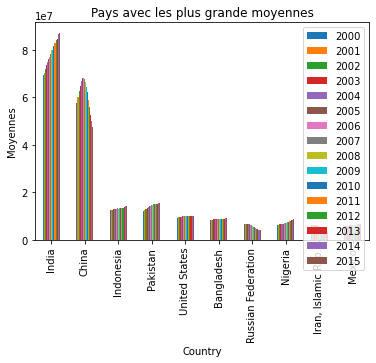

In [65]:
plt.figure(figsize=(15,10))
ax = data_pays.sort_values(by= '2000', ascending = False).head(10).plot(kind='bar')
ax.set_xlabel("Country")
ax.set_ylabel("Moyennes")
ax.set_title("Pays avec les plus grande moyennes")



Text(0.5, 1.0, 'Top dix des pays avec les moyennes les plus élevées')

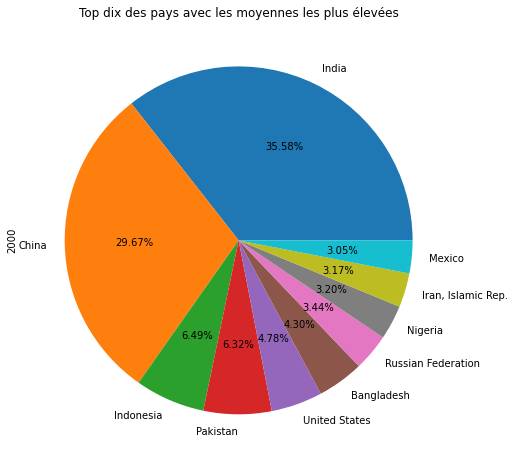

In [192]:
#Diagramme circulaire des pays ayant les plus grandes moyennes
data_pays_4 = data_pays['2000'].sort_values(ascending=False)
ax=data_pays_4.head(10).plot(kind='pie',autopct='%.2f%%',labels=data_pays_4.index,figsize=(12,8))
ax.set_title("Top dix des pays avec les moyennes les plus élevées")

<AxesSubplot:ylabel='Country Name'>

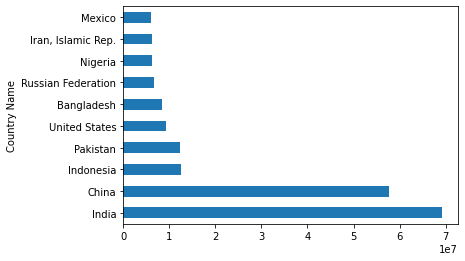

In [67]:
data_pays_3['2000'].plot.barh(x='moyennes')

On peut voir les 10 pays les mieux placés par rapport au score. 

On va refaire la même chose pour 2001

In [68]:
data_pays_2= data_pays.sort_values(by= '2001', ascending = False)
data_pays_3 =data_pays_2.head(10) # On prend les dix premiers pays qui ont une moyenne élevé en 2001.
data_pays_3

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,
India,6.921281e+07,7.042615e+07,7.192020e+07,7.352159e+07,7.482848e+07,7.627900e+07,7.717364e+07,7.838634e+07,7.977629e+07,8.009124e+07,8.161044e+07,8.303457e+07,8.433278e+07,8.477099e+07,8.683404e+07,8.722359e+07
China,5.772091e+07,5.999785e+07,6.251096e+07,6.489709e+07,6.683400e+07,6.803950e+07,6.830003e+07,6.763815e+07,6.636747e+07,6.452918e+07,6.208365e+07,5.907418e+07,5.588520e+07,5.275481e+07,4.993472e+07,4.756348e+07
Pakistan,1.228612e+07,1.270493e+07,1.307756e+07,1.343359e+07,1.376229e+07,1.405528e+07,1.430979e+07,1.453101e+07,1.471559e+07,1.487392e+07,1.501426e+07,1.514098e+07,1.520775e+07,1.527253e+07,1.532584e+07,1.537100e+07
Indonesia,1.263089e+07,1.270026e+07,1.272286e+07,1.281547e+07,1.288151e+07,1.283372e+07,1.301284e+07,1.329365e+07,1.315250e+07,1.326228e+07,1.325257e+07,1.333464e+07,1.356992e+07,1.384934e+07,1.402665e+07,1.435228e+07
United States,9.290541e+06,9.430615e+06,9.566004e+06,9.685763e+06,9.793764e+06,9.897820e+06,9.996137e+06,1.001601e+07,1.003801e+07,1.006111e+07,1.007682e+07,1.008267e+07,1.010112e+07,1.008422e+07,1.003366e+07,9.960058e+06
Bangladesh,8.374616e+06,8.455363e+06,8.529858e+06,8.595946e+06,8.650360e+06,8.692942e+06,8.700885e+06,8.715193e+06,8.741277e+06,8.782337e+06,8.839040e+06,8.876563e+06,8.911925e+06,8.944298e+06,8.973446e+06,8.995093e+06
Russian Federation,6.692892e+06,6.733431e+06,6.700697e+06,6.619809e+06,6.632287e+06,6.493431e+06,6.289035e+06,6.050328e+06,5.792843e+06,5.517446e+06,5.226544e+06,4.930052e+06,4.628500e+06,4.354903e+06,4.120804e+06,3.937696e+06
Nigeria,6.217922e+06,6.349123e+06,6.454471e+06,6.569141e+06,6.695514e+06,6.830932e+06,6.973189e+06,7.103546e+06,7.256885e+06,7.432260e+06,7.627108e+06,7.838612e+06,8.053264e+06,8.290560e+06,8.548242e+06,8.826304e+06
"Iran, Islamic Rep.",6.172625e+06,6.276436e+06,6.373835e+06,6.401802e+06,6.375957e+06,6.276092e+06,6.132188e+06,5.881999e+06,5.668624e+06,5.416835e+06,5.125389e+06,4.908560e+06,4.699237e+06,4.144152e+06,3.984827e+06,3.851041e+06


<AxesSubplot:ylabel='Country Name'>

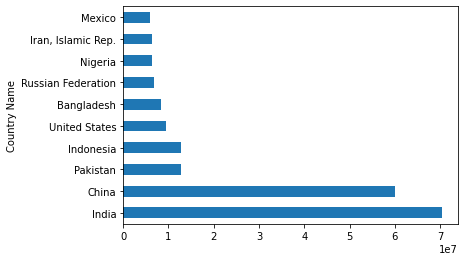

In [69]:
data_pays_3['2001'].plot.barh(x='moyennes')

On retrouve les mêmes pays en 2001

<AxesSubplot:ylabel='Country Name'>

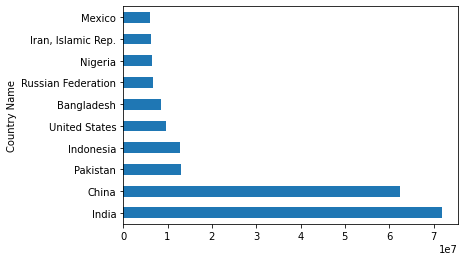

In [70]:
#On va refaire la même chose pour 2002
data_pays_2= data_pays.sort_values(by= '2002', ascending = False)
data_pays_3 =data_pays_2.head(10) 
data_pays_3['2002'].plot.barh(x='moyennes')

Encore les mêmes pays

<AxesSubplot:ylabel='Country Name'>

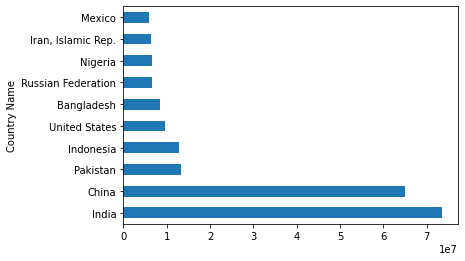

In [71]:
#On va refaire la même chose pour 2003
data_pays_2= data_pays.sort_values(by= '2003', ascending = False)
data_pays_3 =data_pays_2.head(10) 
data_pays_3['2003'].plot.barh(x='moyennes')

<AxesSubplot:ylabel='Country Name'>

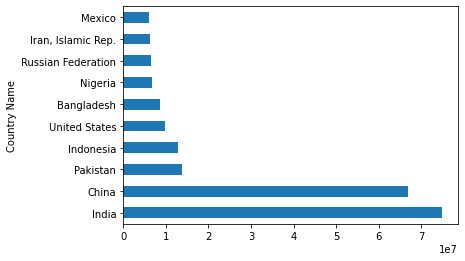

In [72]:
#On va refaire la même chose pour 2004
data_pays_2= data_pays.sort_values(by= '2004', ascending = False)
data_pays_3 =data_pays_2.head(10)
data_pays_3['2004'].plot.barh(x='moyennes')

<AxesSubplot:ylabel='Country Name'>

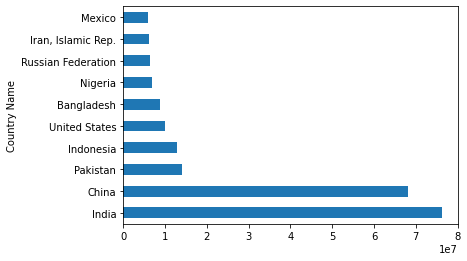

In [73]:
#On va refaire la même chose pour 2005
data_pays_2= data_pays.sort_values(by= '2005', ascending = False)
data_pays_3 =data_pays_2.head(10)
data_pays_3['2005'].plot.barh(x='moyennes')

<AxesSubplot:ylabel='Country Name'>

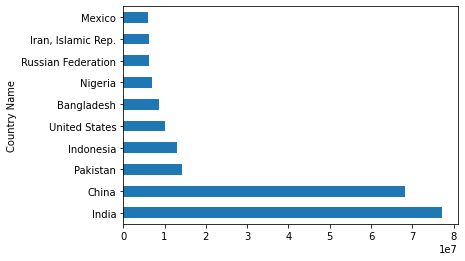

In [74]:
#On va refaire la même chose pour 2006
data_pays_2= data_pays.sort_values(by= '2006', ascending = False)
data_pays_3 =data_pays_2.head(10)
data_pays_3['2006'].plot.barh(x='moyennes')

<AxesSubplot:ylabel='Country Name'>

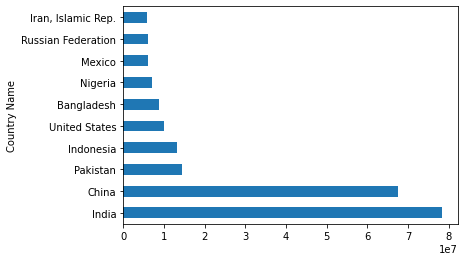

In [75]:
#On va refaire la même chose pour 2007
data_pays_2= data_pays.sort_values(by= '2007', ascending = False)
data_pays_3 =data_pays_2.head(10)
data_pays_3['2007'].plot.barh(x='moyennes')

<AxesSubplot:ylabel='Country Name'>

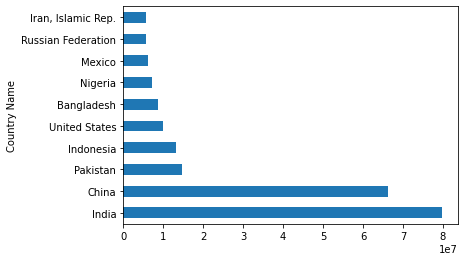

In [76]:
#On va refaire la même chose pour 2008
data_pays_2= data_pays.sort_values(by= '2008', ascending = False)
data_pays_3 =data_pays_2.head(10)
data_pays_3['2008'].plot.barh(x='moyennes')

L'ordre de Mexico, de la Russie et de l'Iran ont changé. Mais, ce sont toujours les mêmes pays. 

<AxesSubplot:ylabel='Country Name'>

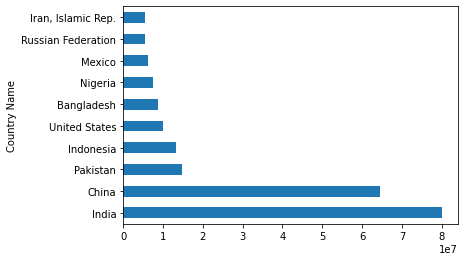

In [77]:
#On va refaire la même chose pour 2009
data_pays_2= data_pays.sort_values(by= '2009', ascending = False)
data_pays_3 =data_pays_2.head(10)
data_pays_3['2009'].plot.barh(x='moyennes')

<AxesSubplot:ylabel='Country Name'>

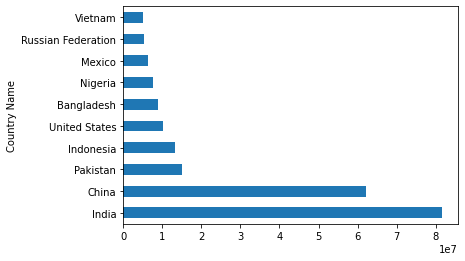

In [78]:
#On va refaire la même chose pour 2010
data_pays_2= data_pays.sort_values(by= '2010', ascending = False)
data_pays_3 =data_pays_2.head(10)
data_pays_3['2010'].plot.barh(x='moyennes')

2010, il n'y a plus l'Iran parmi les 10 premiers mais le Vietnam à la place. Les autres restent inchangés.

<AxesSubplot:ylabel='Country Name'>

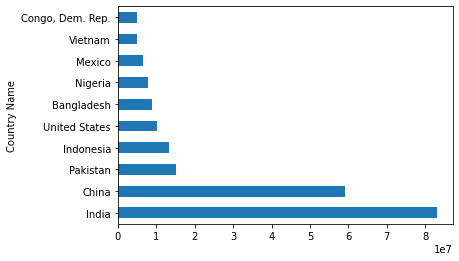

In [79]:
#On va refaire la même chose pour 2011
data_pays_2= data_pays.sort_values(by= '2011', ascending = False)
data_pays_3 =data_pays_2.head(10)
data_pays_3['2011'].plot.barh(x='moyennes')

2011, plus de Russie mais la République Démocratique du Congo. 

<AxesSubplot:ylabel='Country Name'>

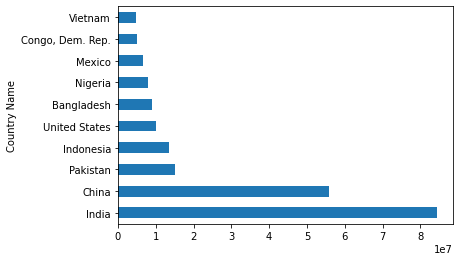

In [80]:
#On va refaire la même chose pour 2012
data_pays_2= data_pays.sort_values(by= '2012', ascending = False)
data_pays_3 =data_pays_2.head(10)
data_pays_3['2012'].plot.barh(x='moyennes')

<AxesSubplot:ylabel='Country Name'>

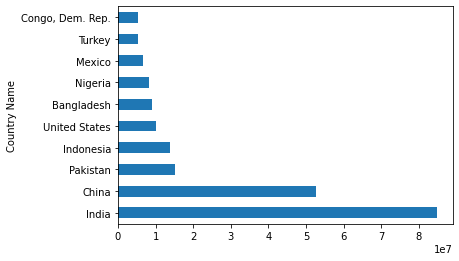

In [81]:
#On va refaire la même chose pour 2013
data_pays_2= data_pays.sort_values(by= '2013', ascending = False)
data_pays_3 =data_pays_2.head(10)
data_pays_3['2013'].plot.barh(x='moyennes')

En 2013, plus de Vietnam, mais la Turquie.

<AxesSubplot:ylabel='Country Name'>

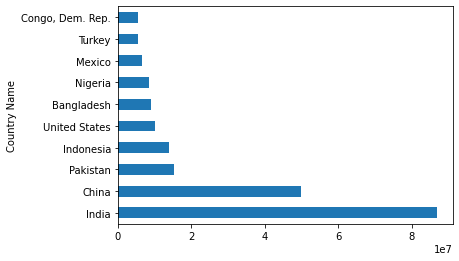

In [82]:
#On va refaire la même chose pour 2014
data_pays_2= data_pays.sort_values(by= '2014', ascending = False)
data_pays_3 =data_pays_2.head(10)
data_pays_3['2014'].plot.barh(x='moyennes')

<AxesSubplot:ylabel='moyennes'>

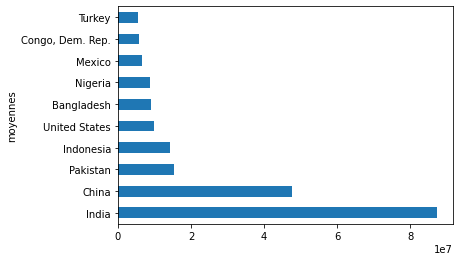

In [83]:
#On va refaire la même chose pour 2015
data_pays_2= data_pays.sort_values(by= '2015', ascending = False)
data_pays_3 =data_pays_2.head(10)
data_pays_3['2015'].plot.barh(xlabel='moyennes')

### Choix des pays

<font color='red'>Nous allons choisir les 8 premiers pays qui étaient dans le top 10 de 2000 à 2015 soient : India, China, Pakistan, Indonésia, United States, Bangladesh, Nigeria et Mexico.</font>

In [100]:
liste_pays = [ 'India', 'China','Pakistan', 'Indonesia', 'United States', 'Bangladesh','Nigeria','Mexico']

## Pays à fort intérêt.

In [84]:
data_pays_2 = data6.groupby(['Region']).mean()
data_pays_2


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Region,,,,,,,,,,,,,,,,
East Asia & Pacific,1.630522e+07,1.693468e+07,1.762698e+07,1.829270e+07,1.882801e+07,1.915604e+07,1.924434e+07,1.908099e+07,1.875356e+07,1.826898e+07,1.762187e+07,1.682357e+07,1.598006e+07,1.514101e+07,1.439667e+07,1.375189e+07
Europe & Central Asia,3.143014e+05,3.141953e+05,3.119885e+05,3.106391e+05,3.031535e+05,3.013274e+05,2.977107e+05,2.931814e+05,2.875713e+05,2.858757e+05,2.799561e+05,2.722187e+05,2.649747e+05,2.608836e+05,2.547744e+05,2.489784e+05
Latin America & Caribbean,6.171408e+05,6.236821e+05,6.294322e+05,6.335579e+05,6.391967e+05,6.445914e+05,6.499768e+05,6.549445e+05,6.591117e+05,6.628494e+05,6.653132e+05,6.678835e+05,6.698931e+05,6.736032e+05,6.747815e+05,6.756653e+05
Middle East & North Africa,3.604648e+05,3.715614e+05,3.828608e+05,3.970005e+05,4.077600e+05,4.158200e+05,4.242164e+05,4.314197e+05,4.367193e+05,4.410843e+05,4.436617e+05,4.455236e+05,4.466086e+05,4.453408e+05,4.425695e+05,4.450963e+05
North America,3.719717e+06,3.773479e+06,3.826179e+06,3.873031e+06,3.941933e+06,3.983442e+06,4.022885e+06,4.033215e+06,4.042270e+06,4.049075e+06,4.051830e+06,4.049061e+06,4.028803e+06,4.019839e+06,3.997485e+06,3.965457e+06
South Asia,4.899999e+06,4.969315e+06,5.049910e+06,5.137555e+06,5.209377e+06,5.285921e+06,5.329003e+06,5.388586e+06,5.459119e+06,5.483829e+06,5.569107e+06,5.648629e+06,5.724048e+06,5.762795e+06,5.877883e+06,5.915566e+06
Sub-Saharan Africa,6.924801e+05,7.088913e+05,7.249525e+05,7.415199e+05,7.594472e+05,7.783945e+05,7.973819e+05,8.174930e+05,8.394276e+05,8.618760e+05,8.851266e+05,9.085814e+05,9.322106e+05,9.575246e+05,9.851524e+05,1.014779e+06


In [85]:
data_pays_2.reset_index(inplace = True)

<AxesSubplot:ylabel='Region'>

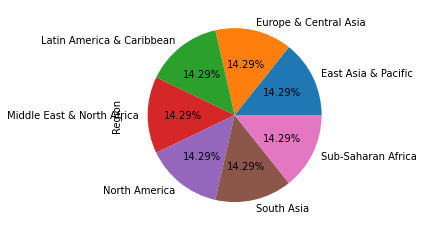

In [193]:
data_pays_2["Region"].value_counts(normalize = True).plot(kind = 'pie', autopct='%.2f%%')

Par rapport aux indicateurs choisis, on ne peut pas départager les pays par Région. 

In [195]:
data_pays_3 = data6.groupby(['Income Group']).mean()
data_pays_3

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Income Group,,,,,,,,,,,,,,,,
High income: OECD,9.173964e+05,9.271346e+05,9.342031e+05,9.429282e+05,9.492485e+05,9.557584e+05,9.678881e+05,9.768228e+05,9.829355e+05,9.824992e+05,9.817212e+05,9.844525e+05,9.839151e+05,9.846258e+05,9.787718e+05,9.717745e+05
High income: nonOECD,8.383737e+04,8.446465e+04,8.439759e+04,8.511199e+04,8.611987e+04,8.597992e+04,8.561727e+04,8.510130e+04,8.441224e+04,8.211451e+04,8.188828e+04,8.024075e+04,7.712331e+04,7.460745e+04,7.184980e+04,6.915791e+04
Low income,1.380214e+06,1.414082e+06,1.447204e+06,1.481055e+06,1.516806e+06,1.553919e+06,1.591103e+06,1.631469e+06,1.674776e+06,1.719906e+06,1.766855e+06,1.814719e+06,1.863373e+06,1.915201e+06,1.971194e+06,2.032004e+06
Lower middle income,6.200316e+05,6.305805e+05,6.405321e+05,6.522205e+05,6.558727e+05,6.649585e+05,6.712658e+05,6.772469e+05,6.812914e+05,6.871764e+05,6.902487e+05,6.922571e+05,6.940956e+05,6.935067e+05,6.958926e+05,6.960064e+05
Upper middle income,1.202196e+07,1.248378e+07,1.299204e+07,1.348066e+07,1.387246e+07,1.411187e+07,1.417174e+07,1.404606e+07,1.380046e+07,1.344064e+07,1.296048e+07,1.236666e+07,1.174073e+07,1.112001e+07,1.056991e+07,1.009359e+07


In [198]:
data_pays_3.reset_index(inplace = True)

In [200]:
data_pays_3

,Income Group,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,High income: OECD,9.173964e+05,9.271346e+05,9.342031e+05,9.429282e+05,9.492485e+05,9.557584e+05,9.678881e+05,9.768228e+05,9.829355e+05,9.824992e+05,9.817212e+05,9.844525e+05,9.839151e+05,9.846258e+05,9.787718e+05,9.717745e+05
1,High income: nonOECD,8.383737e+04,8.446465e+04,8.439759e+04,8.511199e+04,8.611987e+04,8.597992e+04,8.561727e+04,8.510130e+04,8.441224e+04,8.211451e+04,8.188828e+04,8.024075e+04,7.712331e+04,7.460745e+04,7.184980e+04,6.915791e+04
2,Low income,1.380214e+06,1.414082e+06,1.447204e+06,1.481055e+06,1.516806e+06,1.553919e+06,1.591103e+06,1.631469e+06,1.674776e+06,1.719906e+06,1.766855e+06,1.814719e+06,1.863373e+06,1.915201e+06,1.971194e+06,2.032004e+06
3,Lower middle income,6.200316e+05,6.305805e+05,6.405321e+05,6.522205e+05,6.558727e+05,6.649585e+05,6.712658e+05,6.772469e+05,6.812914e+05,6.871764e+05,6.902487e+05,6.922571e+05,6.940956e+05,6.935067e+05,6.958926e+05,6.960064e+05
4,Upper middle income,1.202196e+07,1.248378e+07,1.299204e+07,1.348066e+07,1.387246e+07,1.411187e+07,1.417174e+07,1.404606e+07,1.380046e+07,1.344064e+07,1.296048e+07,1.236666e+07,1.174073e+07,1.112001e+07,1.056991e+07,1.009359e+07


<AxesSubplot:ylabel='Income Group'>

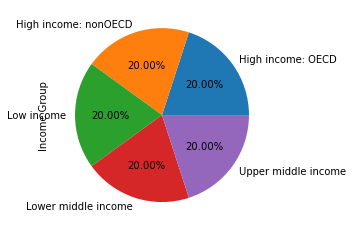

In [199]:
data_pays_3["Income Group"].value_counts(normalize = True).plot(kind = 'pie', autopct='%.2f%%')

# Projection

In [87]:
PIB = ['Government expenditure in tertiary institutions as % of GDP (%)', 'Government expenditure in secondary institutions education as % of GDP (%)', 'Government expenditure on tertiary education as % of GDP (%)','Government expenditure in post-secondary non-tertiary institutions as % of GDP (%)','Government expenditure on post-secondary non-tertiary education as % of GDP (%)','Government expenditure on secondary and post-secondary non-tertiary vocational education as % of GDP (%)','Government expenditure on education as % of GDP (%)','Government expenditure per tertiary student as % of GDP per capita (%)','Government expenditure per secondary student as % of GDP per capita (%)']


In [88]:
data_projection = df[df['Indicator Name'].isin(PIB)]

In [89]:
data_projection.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,2014,2015,Year,DESCRIPTION_y,Series Code,Topic,Short definition,Long definition,Other notes,Source
3539100,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,NaN,NaN,UIS.XGDP.4.FSGOV.FDINSTADM.FFD,Expenditures,NaN,"Total general (local, regional and central) go...",NaN,UNESCO Institute for Statistics
3539101,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,YR2017,5-year average value between 0s and 5s,UIS.XGDP.4.FSGOV.FDINSTADM.FFD,Expenditures,NaN,"Total general (local, regional and central) go...",NaN,UNESCO Institute for Statistics
3539102,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,NaN,NaN,YR2017,5-year average value between 0s and 5s,UIS.XGDP.4.FSGOV.FDINSTADM.FFD,Expenditures,NaN,"Total general (local, regional and central) go...",NaN,UNESCO Institute for Statistics
3539103,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,NaN,NaN,NaN,NaN,UIS.XGDP.4.FSGOV.FDINSTADM.FFD,Expenditures,NaN,"Total general (local, regional and central) go...",NaN,UNESCO Institute for Statistics
3539104,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,NaN,NaN,NaN,NaN,UIS.XGDP.4.FSGOV.FDINSTADM.FFD,Expenditures,NaN,"Total general (local, regional and central) go...",NaN,UNESCO Institute for Statistics


In [90]:
data_projection = data_projection[['Country Name', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015' ]]
data_projection.head()

,Country Name,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
3539100,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3539101,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3539102,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3539103,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3539104,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
country_select = ['India','China' , 'Indonésia', 'Bangladesh' ,'Nigeria' ,'Mexico', 'Pakistan', 'United States' ]

In [92]:
d1 = pd.DataFrame({'Country Name': data_projection['Country Name'], 'Years': 2005*np.ones(len(data_projection)),'PIB' :data_projection['2005']})
d2 = pd.DataFrame({'Country Name': data_projection['Country Name'], 'Years': 2006*np.ones(len(data_projection)),'PIB' :data_projection['2006']})
d3 = pd.DataFrame({'Country Name': data_projection['Country Name'], 'Years': 2007*np.ones(len(data_projection)),'PIB' :data_projection['2007']})
d4 = pd.DataFrame({'Country Name': data_projection['Country Name'], 'Years': 2008*np.ones(len(data_projection)),'PIB' :data_projection['2008']})
d5 = pd.DataFrame({'Country Name': data_projection['Country Name'], 'Years': 2009*np.ones(len(data_projection)),'PIB' :data_projection['2009']})
d6 = pd.DataFrame({'Country Name': data_projection['Country Name'], 'Years': 2010*np.ones(len(data_projection)),'PIB' :data_projection['2010']})
d7 = pd.DataFrame({'Country Name': data_projection['Country Name'], 'Years': 2011*np.ones(len(data_projection)),'PIB' :data_projection['2011']})
d8 = pd.DataFrame({'Country Name': data_projection['Country Name'], 'Years': 2012*np.ones(len(data_projection)),'PIB' :data_projection['2012']})
d9 = pd.DataFrame({'Country Name': data_projection['Country Name'], 'Years': 2013*np.ones(len(data_projection)),'PIB' :data_projection['2013']})
d10 = pd.DataFrame({'Country Name': data_projection['Country Name'], 'Years': 2014*np.ones(len(data_projection)),'PIB' :data_projection['2014']})


In [93]:
d = pd.concat([d1, d2, d3, d4, d5, d6, d7, d8, d9, d10])

In [94]:
d[d['Country Name']=='China']

,Country Name,Years,PIB
3539649,China,2005.0,NaN
3539650,China,2005.0,NaN
3539651,China,2005.0,NaN
3539652,China,2005.0,NaN
3539653,China,2005.0,NaN
...,...,...,...
3641378,China,2014.0,NaN
3641379,China,2014.0,NaN
3641380,China,2014.0,NaN
3641381,China,2014.0,NaN


<AxesSubplot:xlabel='Years', ylabel='PIB'>

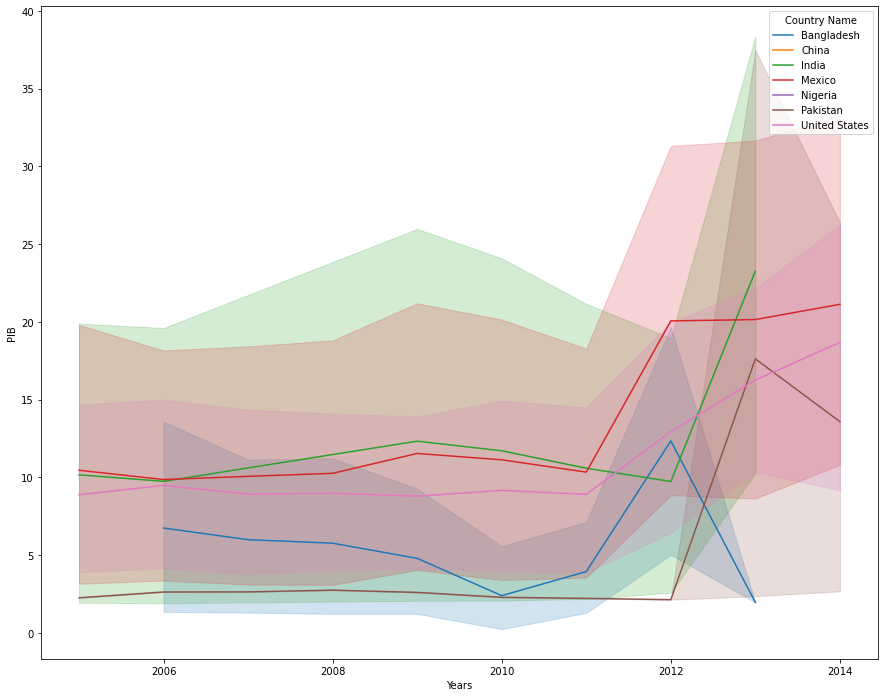

In [95]:
fig = plt.figure(figsize = (15,12))
sns.lineplot(x = 'Years', y = 'PIB', hue = 'Country Name', data = d[d['Country Name'].isin(country_select)].reset_index())

In [325]:
#data_projection.isnull().sum()

Country Name        0
2005             9688
2006             8757
2007             8431
2008             8834
2009             7736
2010             7372
2011             8166
2012            10790
2013             9553
2014             9601
2015            12363
dtype: int64

In [326]:
#data_projection.shape

(13284, 12)

In [328]:
data_projection.isnull().sum()

Country Name       0
2005            2806
2006            1900
2007            1524
2008            2070
2009             864
2010               0
2011            1114
2012            3754
2013            2766
2014            3294
2015            5050
dtype: int64

In [331]:
#data_projection = data_projection [data_projection['2009'].notnull()]

In [332]:
data_projection.isnull().sum()

Country Name       0
2005            2240
2006            1128
2007            1004
2008            1346
2009               0
2010               0
2011             562
2012            3116
2013            2136
2014            2606
2015            4236
dtype: int64

In [333]:
#data_projection = data_projection [data_projection['2011'].notnull()]
#data_projection.isnull().sum()

Country Name       0
2005            2186
2006            1062
2007             970
2008            1322
2009               0
2010               0
2011               0
2012            2620
2013            1634
2014            2530
2015            3690
dtype: int64

In [334]:
#data_projection = data_projection [data_projection['2007'].notnull()]
#data_projection.isnull().sum()

Country Name       0
2005            1394
2006             228
2007               0
2008             542
2009               0
2010               0
2011               0
2012            1926
2013            1354
2014            1762
2015            2768
dtype: int64

In [335]:
#data_projection = data_projection [data_projection['2008'].notnull()]
#data_projection.isnull().sum()

Country Name       0
2005             906
2006             192
2007               0
2008               0
2009               0
2010               0
2011               0
2012            1692
2013            1276
2014            1466
2015            2448
dtype: int64

In [336]:
#data_projection = data_projection [data_projection['2006'].notnull()]
#data_projection.isnull().sum()

Country Name       0
2005             762
2006               0
2007               0
2008               0
2009               0
2010               0
2011               0
2012            1654
2013            1180
2014            1364
2015            2286
dtype: int64

In [337]:
#data_projection = data_projection [data_projection['2005'].notnull()]
#data_projection.isnull().sum()

Country Name       0
2005               0
2006               0
2007               0
2008               0
2009               0
2010               0
2011               0
2012            1416
2013             894
2014            1098
2015            1956
dtype: int64

In [338]:
#data_projection = data_projection [data_projection['2013'].notnull()]
#data_projection.isnull().sum()

Country Name       0
2005               0
2006               0
2007               0
2008               0
2009               0
2010               0
2011               0
2012             700
2013               0
2014             234
2015            1064
dtype: int64

In [339]:
#data_projection = data_projection [data_projection['2014'].notnull()]
#data_projection.isnull().sum()

Country Name      0
2005              0
2006              0
2007              0
2008              0
2009              0
2010              0
2011              0
2012            682
2013              0
2014              0
2015            832
dtype: int64

In [340]:
#data_projection = data_projection [data_projection['2012'].notnull()]
#data_projection.isnull().sum()

Country Name      0
2005              0
2006              0
2007              0
2008              0
2009              0
2010              0
2011              0
2012              0
2013              0
2014              0
2015            154
dtype: int64

In [341]:
#data_projection.shape

(210, 12)

In [342]:
#data_projection.drop(['2015'], axis=1, inplace = True)

In [343]:
#data_projection['Country Name'].unique()

array(['Iran, Islamic Rep.', 'Colombia', 'Hong Kong SAR, China', 'Peru',
       'South Africa', 'Argentina', 'Armenia', 'Australia', 'Austria',
       'Azerbaijan', 'Switzerland', 'Chile', "Cote d'Ivoire", 'Spain',
       'Finland', 'Ghana', 'Israel', 'Kyrgyz Republic', 'Lao PDR',
       'Macao SAR, China', 'Maldives', 'Mexico', 'Mauritius',
       'Netherlands', 'Nepal', 'New Zealand', 'Pakistan', 'Poland',
       'Portugal', 'Qatar', 'El Salvador', 'Slovak Republic', 'Sweden',
       'Togo', 'United States', 'Hungary', 'Italy'], dtype=object)

In [349]:
#country_select = ['Iran, Islamic Rep.','Mexico', 'Pakistan', 'United States' ]

In [344]:
#data_projection.head()

,Country Name,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
1853073,"Iran, Islamic Rep.",0.11268,0.11328,0.09205,0.06607,0.09262,0.14792,0.16856,0.14541,0.17174,0.15496
1853074,"Iran, Islamic Rep.",0.11268,0.11328,0.09205,0.06607,0.09262,0.14792,0.16856,0.14541,0.17174,0.15496
1857153,Colombia,1.44330,1.13305,1.05333,1.55109,1.66228,1.61260,1.56815,1.53073,1.67124,1.60080
1857154,Colombia,1.44330,1.13305,1.05333,1.55109,1.66228,1.61260,1.56815,1.53073,1.67124,1.60080
1857483,"Hong Kong SAR, China",1.35335,1.23792,1.14185,1.07781,1.13518,1.19982,1.15429,1.13553,1.11258,1.08409


In [345]:
#d1 = pd.DataFrame({'Country Name': data_projection['Country Name'], 'Years': 2005*np.ones(len(data_projection)),'PIB' :data_projection['2005']})
#d2 = pd.DataFrame({'Country Name': data_projection['Country Name'], 'Years': 2006*np.ones(len(data_projection)),'PIB' :data_projection['2006']})
#d3 = pd.DataFrame({'Country Name': data_projection['Country Name'], 'Years': 2007*np.ones(len(data_projection)),'PIB' :data_projection['2007']})
#d4 = pd.DataFrame({'Country Name': data_projection['Country Name'], 'Years': 2008*np.ones(len(data_projection)),'PIB' :data_projection['2008']})
#d5 = pd.DataFrame({'Country Name': data_projection['Country Name'], 'Years': 2009*np.ones(len(data_projection)),'PIB' :data_projection['2009']})
#d6 = pd.DataFrame({'Country Name': data_projection['Country Name'], 'Years': 2010*np.ones(len(data_projection)),'PIB' :data_projection['2010']})
#d7 = pd.DataFrame({'Country Name': data_projection['Country Name'], 'Years': 2011*np.ones(len(data_projection)),'PIB' :data_projection['2011']})
#d8 = pd.DataFrame({'Country Name': data_projection['Country Name'], 'Years': 2012*np.ones(len(data_projection)),'PIB' :data_projection['2012']})
#d9 = pd.DataFrame({'Country Name': data_projection['Country Name'], 'Years': 2013*np.ones(len(data_projection)),'PIB' :data_projection['2013']})
#d10 = pd.DataFrame({'Country Name': data_projection['Country Name'], 'Years': 2014*np.ones(len(data_projection)),'PIB' :data_projection['2014']})


In [346]:
#d1.head()

,Country Name,Years,PIB
1853073,"Iran, Islamic Rep.",2005.0,0.11268
1853074,"Iran, Islamic Rep.",2005.0,0.11268
1857153,Colombia,2005.0,1.44330
1857154,Colombia,2005.0,1.44330
1857483,"Hong Kong SAR, China",2005.0,1.35335


In [348]:
#d.shape

(2100, 3)

In [347]:
#d = pd.concat([d1, d2, d3, d4, d5, d6, d7, d8, d9, d10])

<AxesSubplot:xlabel='Years', ylabel='PIB'>

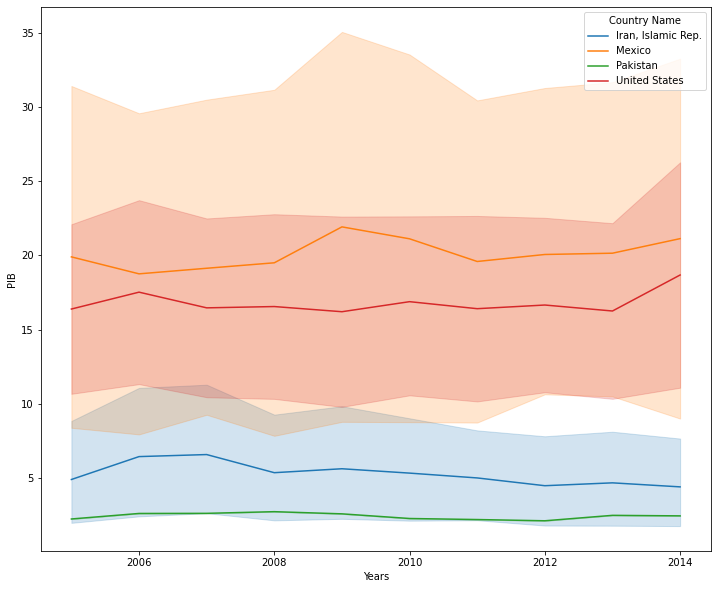

In [352]:
#fig = plt.figure(figsize = (12,10))
#sns.lineplot(x = 'Years', y = 'PIB', hue = 'Country Name', data = d[d['Country Name'].isin(country_select)].reset_index())

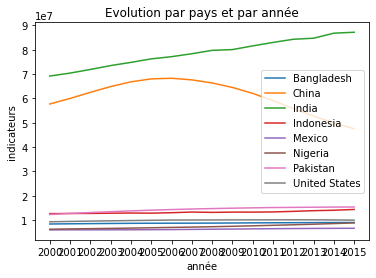

In [175]:
"""x = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
for index in data_pays_chosis_1.index: 
  y0 = data_pays_chosis_1.loc[index]['2000']
  y1 = data_pays_chosis_1.loc[index]['2001']
  y2 = data_pays_chosis_1.loc[index]['2002']
  y3 = data_pays_chosis_1.loc[index]['2003']
  y4 = data_pays_chosis_1.loc[index]['2004']
  y5 = data_pays_chosis_1.loc[index]['2005']
  y6 = data_pays_chosis_1.loc[index]['2006']
  y7 = data_pays_chosis_1.loc[index]['2007']
  y8 = data_pays_chosis_1.loc[index]['2008']
  y9 = data_pays_chosis_1.loc[index]['2009']
  y10 = data_pays_chosis_1.loc[index]['2010']
  y11 = data_pays_chosis_1.loc[index]['2011']
  y12 = data_pays_chosis_1.loc[index]['2012']
  y13 = data_pays_chosis_1.loc[index]['2013']
  y14 = data_pays_chosis_1.loc[index]['2014']
  y15 = data_pays_chosis_1.loc[index]['2015']
  y =[y0, y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, y14, y15]
  plt.plot(x,y, label = data_pays_chosis_1.loc[index]['Country Name'])
  #plt.legend([data_pays_choisis.loc[index]['Country Name']])
  #plt.xlabel(data_pays_choisis.loc[index]['Country Name'])
  plt.xlabel('année')
  plt.ylabel("indicateurs")
  plt.title('Evolution par pays et par année')
plt.legend()"""

La chine et l'Inde se détache des autres, mais c'est l'Inde qui est à fort potentiel. 

# On regarde pour chaque indicateur:

In [96]:
my_columns = ['Country Name','2000','2001','2002','2003','2004','2005', '2006','2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']

## Le premier indicateur : 'Personal computers (per 100 people)'

In [97]:
mask1 = df['Indicator Name'] == (liste_Indicateur[0])
data_indicateur_1 = df[mask1]
data_indicateur_1 

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,2014,2015,Year,DESCRIPTION_y,Series Code,Topic,Short definition,Long definition,Other notes,Source
5876880,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,NaN,NaN,IT.CMP.PCMP.P2,Infrastructure: Communications,NaN,Personal computers are self-contained computer...,NaN,"International Telecommunication Union, World T..."
5876881,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,YR2017,5-year average value between 0s and 5s,IT.CMP.PCMP.P2,Infrastructure: Communications,NaN,Personal computers are self-contained computer...,NaN,"International Telecommunication Union, World T..."
5876882,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,NaN,NaN,YR2017,5-year average value between 0s and 5s,IT.CMP.PCMP.P2,Infrastructure: Communications,NaN,Personal computers are self-contained computer...,NaN,"International Telecommunication Union, World T..."
5876883,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,NaN,NaN,NaN,NaN,IT.CMP.PCMP.P2,Infrastructure: Communications,NaN,Personal computers are self-contained computer...,NaN,"International Telecommunication Union, World T..."
5876884,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,NaN,NaN,NaN,NaN,IT.CMP.PCMP.P2,Infrastructure: Communications,NaN,Personal computers are self-contained computer...,NaN,"International Telecommunication Union, World T..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5879695,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,...,NaN,NaN,YR2017,5-year average value between 0s and 5s,IT.CMP.PCMP.P2,Infrastructure: Communications,NaN,Personal computers are self-contained computer...,NaN,"International Telecommunication Union, World T..."
5879696,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data have rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,...,NaN,NaN,YR2017,5-year average value between 0s and 5s,IT.CMP.PCMP.P2,Infrastructure: Communications,NaN,Personal computers are self-contained computer...,NaN,"International Telecommunication Union, World T..."
5879697,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data have rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,...,NaN,NaN,NaN,NaN,IT.CMP.PCMP.P2,Infrastructure: Communications,NaN,Personal computers are self-contained computer...,NaN,"International Telecommunication Union, World T..."
5879698,ZWE,Zimbabwe,Zimbabwe,Republic of Zimbabwe,ZW,U.S. dollar,Fiscal year end: June 30; reporting period for...,Sub-Saharan Africa,Low income,ZW,...,NaN,NaN,NaN,NaN,IT.CMP.PCMP.P2,Infrastructure: Communications,NaN,Personal computers are self-contained computer...,NaN,"International Telecommunication Union, World T..."


In [98]:
data_indicateur_1_new = data_indicateur_1[my_columns]
data_indicateur_1_new

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
5876880,Aruba,NaN,NaN,NaN,NaN,NaN,7.923544,9.917683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5876881,Aruba,NaN,NaN,NaN,NaN,NaN,7.923544,9.917683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5876882,Afghanistan,NaN,NaN,NaN,NaN,NaN,0.341903,0.390148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5876883,Afghanistan,NaN,NaN,NaN,NaN,NaN,0.341903,0.390148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5876884,Afghanistan,NaN,NaN,NaN,NaN,NaN,0.341903,0.390148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5879695,South Africa,6.466533,6.811208,7.144745,7.495355,7.864904,8.222196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5879696,Zambia,0.693002,0.723789,0.752911,0.871998,1.011217,1.142108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5879697,Zambia,0.693002,0.723789,0.752911,0.871998,1.011217,1.142108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5879698,Zimbabwe,1.559544,1.588971,4.746489,4.892251,5.514830,6.687338,6.798012,NaN,7.43114,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
data_indicateur_1_new_1 = data_indicateur_1_new[data_indicateur_1_new['Country Name'].isin(liste_pays)] 
data_indicateur_1_new_1

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
5877176,Bangladesh,0.151076,0.185557,0.328452,0.754386,1.168265,1.571941,2.415981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5877177,Bangladesh,0.151076,0.185557,0.328452,0.754386,1.168265,1.571941,2.415981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5877429,China,1.608836,1.941159,2.740631,3.869328,4.043759,4.818777,5.588372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5877430,China,1.608836,1.941159,2.740631,3.869328,4.043759,4.818777,5.588372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5877431,China,1.608836,1.941159,2.740631,3.869328,4.043759,4.818777,5.588372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5878856,Nigeria,0.610368,0.634895,0.660091,0.648811,0.637504,0.859686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5878872,Pakistan,0.410201,0.408560,0.454261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5878873,Pakistan,0.410201,0.408560,0.454261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5879651,United States,56.571740,61.906016,NaN,NaN,75.742688,77.272444,79.915488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
data_indicateur_1_new_1 = data_indicateur_1_new_1.drop_duplicates()
data_indicateur_1_new_1

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
5877176,Bangladesh,0.151076,0.185557,0.328452,0.754386,1.168265,1.571941,2.415981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5877429,China,1.608836,1.941159,2.740631,3.869328,4.043759,4.818777,5.588372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5878130,Indonesia,1.005079,1.085057,1.171419,1.264752,1.365605,1.463376,1.980591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5878137,India,0.441348,0.566304,0.696569,0.857114,1.173212,1.508237,2.703515,3.192145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5878435,Mexico,5.487438,6.550226,7.826755,9.254434,10.248529,12.643158,13.378918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5878855,Nigeria,0.610368,0.634895,0.660091,0.648811,0.637504,0.859686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5878872,Pakistan,0.410201,0.408560,0.454261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5879651,United States,56.571740,61.906016,NaN,NaN,75.742688,77.272444,79.915488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
d1 = pd.DataFrame({'Country Name': data_indicateur_1_new_1['Country Name'], 'Years': 2000*np.ones(len(data_indicateur_1_new_1)),'Personnal computers' :data_indicateur_1_new_1['2000']})
d2 = pd.DataFrame({'Country Name': data_indicateur_1_new_1['Country Name'], 'Years': 2001*np.ones(len(data_indicateur_1_new_1)),'Personnal computers' :data_indicateur_1_new_1['2001']})
d3 = pd.DataFrame({'Country Name': data_indicateur_1_new_1['Country Name'], 'Years': 2002*np.ones(len(data_indicateur_1_new_1)),'Personnal computers' :data_indicateur_1_new_1['2002']})
d4 = pd.DataFrame({'Country Name': data_indicateur_1_new_1['Country Name'], 'Years': 2003*np.ones(len(data_indicateur_1_new_1)),'Personnal computers' :data_indicateur_1_new_1['2003']})
d5 = pd.DataFrame({'Country Name': data_indicateur_1_new_1['Country Name'], 'Years': 2004*np.ones(len(data_indicateur_1_new_1)),'Personnal computers' :data_indicateur_1_new_1['2004']})
d6 = pd.DataFrame({'Country Name': data_indicateur_1_new_1['Country Name'], 'Years': 2005*np.ones(len(data_indicateur_1_new_1)),'Personnal computers' :data_indicateur_1_new_1['2005']})
d7 = pd.DataFrame({'Country Name': data_indicateur_1_new_1['Country Name'], 'Years': 2006*np.ones(len(data_indicateur_1_new_1)),'Personnal computers' :data_indicateur_1_new_1['2006']})
d8 = pd.DataFrame({'Country Name': data_indicateur_1_new_1['Country Name'], 'Years': 2007*np.ones(len(data_indicateur_1_new_1)),'Personnal computers' :data_indicateur_1_new_1['2007']})
d9 = pd.DataFrame({'Country Name': data_indicateur_1_new_1['Country Name'], 'Years': 2008*np.ones(len(data_indicateur_1_new_1)),'Personnal computers' :data_indicateur_1_new_1['2008']})
d10 = pd.DataFrame({'Country Name': data_indicateur_1_new_1['Country Name'], 'Years': 2009*np.ones(len(data_indicateur_1_new_1)),'Personnal computers' :data_indicateur_1_new_1['2009']})
d11= pd.DataFrame({'Country Name': data_indicateur_1_new_1['Country Name'], 'Years': 2010*np.ones(len(data_indicateur_1_new_1)),'Personnal computers' :data_indicateur_1_new_1['2010']})
d12= pd.DataFrame({'Country Name': data_indicateur_1_new_1['Country Name'], 'Years': 2011*np.ones(len(data_indicateur_1_new_1)),'Personnal computers' :data_indicateur_1_new_1['2011']})
d13= pd.DataFrame({'Country Name': data_indicateur_1_new_1['Country Name'], 'Years': 2012*np.ones(len(data_indicateur_1_new_1)),'Personnal computers' :data_indicateur_1_new_1['2012']})
d14= pd.DataFrame({'Country Name': data_indicateur_1_new_1['Country Name'], 'Years': 2013*np.ones(len(data_indicateur_1_new_1)),'Personnal computers' :data_indicateur_1_new_1['2013']})
d15 = pd.DataFrame({'Country Name': data_indicateur_1_new_1['Country Name'], 'Years': 2014*np.ones(len(data_indicateur_1_new_1)),'Personnal computers' :data_indicateur_1_new_1['2014']})
d16 = pd.DataFrame({'Country Name': data_indicateur_1_new_1['Country Name'], 'Years': 2015*np.ones(len(data_indicateur_1_new_1)),'Personnal computers' :data_indicateur_1_new_1['2015']})

In [104]:
d = pd.concat([d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12, d13, d14, d15, d16])

<AxesSubplot:xlabel='Years', ylabel='Personnal computers'>

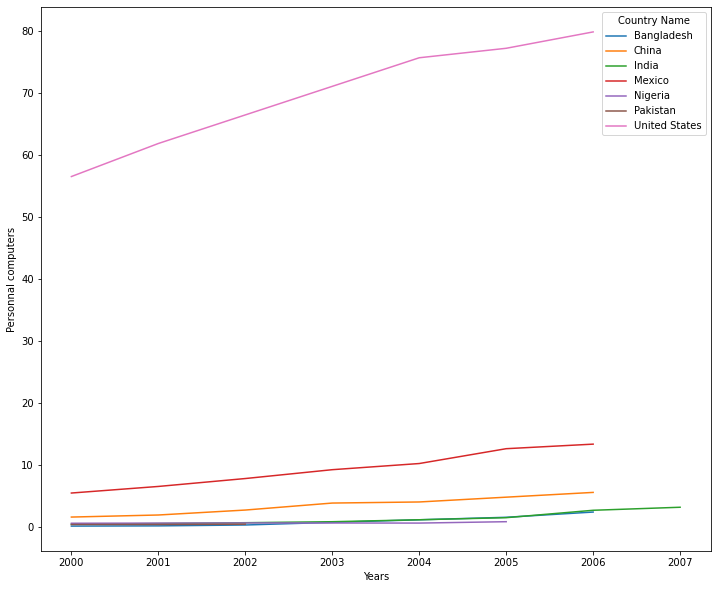

In [105]:
fig = plt.figure(figsize = (12,10))
sns.lineplot(x = 'Years', y = 'Personnal computers', hue = 'Country Name', data = d[d['Country Name'].isin(country_select)].reset_index())

## Le deuxième indicateur : 'Percentage of students in upper secondary education enrolled in general programmes, both sexes (%)'

In [106]:
mask2 = df['Indicator Name'] == (liste_Indicateur[1])
data_indicateur_2 = df[mask2]
data_indicateur_2 

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,2014,2015,Year,DESCRIPTION_y,Series Code,Topic,Short definition,Long definition,Other notes,Source
5795100,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,NaN,NaN,UIS.GTVP.3.GPV,Secondary,NaN,Total number of students enrolled in general p...,NaN,UNESCO Institute for Statistics
5795101,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,YR2017,5-year average value between 0s and 5s,UIS.GTVP.3.GPV,Secondary,NaN,Total number of students enrolled in general p...,NaN,UNESCO Institute for Statistics
5795102,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,97.417442,NaN,YR2017,5-year average value between 0s and 5s,UIS.GTVP.3.GPV,Secondary,NaN,Total number of students enrolled in general p...,NaN,UNESCO Institute for Statistics
5795103,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,97.417442,NaN,NaN,NaN,UIS.GTVP.3.GPV,Secondary,NaN,Total number of students enrolled in general p...,NaN,UNESCO Institute for Statistics
5795104,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,97.417442,NaN,NaN,NaN,UIS.GTVP.3.GPV,Secondary,NaN,Total number of students enrolled in general p...,NaN,UNESCO Institute for Statistics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797915,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,...,87.792961,NaN,YR2017,5-year average value between 0s and 5s,UIS.GTVP.3.GPV,Secondary,NaN,Total number of students enrolled in general p...,NaN,UNESCO Institute for Statistics
5797916,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data have rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,...,NaN,NaN,YR2017,5-year average value between 0s and 5s,UIS.GTVP.3.GPV,Secondary,NaN,Total number of students enrolled in general p...,NaN,UNESCO Institute for Statistics
5797917,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data have rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,...,NaN,NaN,NaN,NaN,UIS.GTVP.3.GPV,Secondary,NaN,Total number of students enrolled in general p...,NaN,UNESCO Institute for Statistics
5797918,ZWE,Zimbabwe,Zimbabwe,Republic of Zimbabwe,ZW,U.S. dollar,Fiscal year end: June 30; reporting period for...,Sub-Saharan Africa,Low income,ZW,...,NaN,NaN,NaN,NaN,UIS.GTVP.3.GPV,Secondary,NaN,Total number of students enrolled in general p...,NaN,UNESCO Institute for Statistics


In [107]:
data_indicateur_2_new = data_indicateur_2[my_columns]
data_indicateur_2_new

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
5795100,Aruba,73.933952,71.790237,71.007088,69.794800,74.036339,74.687332,76.435753,70.428886,72.783249,74.572433,76.360847,78.060448,82.586243,NaN,NaN,NaN
5795101,Aruba,73.933952,71.790237,71.007088,69.794800,74.036339,74.687332,76.435753,70.428886,72.783249,74.572433,76.360847,78.060448,82.586243,NaN,NaN,NaN
5795102,Afghanistan,NaN,100.000000,NaN,98.362221,98.405022,95.259956,NaN,97.406151,97.310028,94.873390,97.983940,97.567268,97.343018,96.954399,97.417442,NaN
5795103,Afghanistan,NaN,100.000000,NaN,98.362221,98.405022,95.259956,NaN,97.406151,97.310028,94.873390,97.983940,97.567268,97.343018,96.954399,97.417442,NaN
5795104,Afghanistan,NaN,100.000000,NaN,98.362221,98.405022,95.259956,NaN,97.406151,97.310028,94.873390,97.983940,97.567268,97.343018,96.954399,97.417442,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797915,South Africa,91.072906,90.239929,89.471397,89.876839,89.670776,91.513321,91.203888,90.896561,90.591263,90.288033,91.857986,91.784142,91.120354,87.771317,87.792961,NaN
5797916,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5797917,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5797918,Zimbabwe,100.000000,100.000000,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,100.000000,NaN,NaN


In [108]:
data_indicateur_2_new_2 = data_indicateur_2_new[data_indicateur_2_new['Country Name'].isin(liste_pays)] 
data_indicateur_2_new_2

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
5795396,Bangladesh,97.494812,97.12059,97.141388,97.143761,95.878227,95.034897,94.619339,93.868759,91.860527,92.158974,91.364883,92.733719,91.833687,92.574272,NaN,NaN
5795397,Bangladesh,97.494812,97.12059,97.141388,97.143761,95.878227,95.034897,94.619339,93.868759,91.860527,92.158974,91.364883,92.733719,91.833687,92.574272,NaN,NaN
5795649,China,46.993259,NaN,NaN,60.317902,NaN,NaN,61.832748,59.637878,57.363560,55.739552,54.480171,54.508339,55.523380,54.005959,55.995899,NaN
5795650,China,46.993259,NaN,NaN,60.317902,NaN,NaN,61.832748,59.637878,57.363560,55.739552,54.480171,54.508339,55.523380,54.005959,55.995899,NaN
5795651,China,46.993259,NaN,NaN,60.317902,NaN,NaN,61.832748,59.637878,57.363560,55.739552,54.480171,54.508339,55.523380,54.005959,55.995899,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797076,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5797092,Pakistan,NaN,NaN,NaN,95.429893,93.839363,93.343292,91.694298,91.099739,91.250031,90.337708,90.805389,90.932739,91.483521,91.996452,92.395554,NaN
5797093,Pakistan,NaN,NaN,NaN,95.429893,93.839363,93.343292,91.694298,91.099739,91.250031,90.337708,90.805389,90.932739,91.483521,91.996452,92.395554,NaN
5797871,United States,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN


In [109]:
data_indicateur_2_new_2 = data_indicateur_2_new_2.drop_duplicates()
data_indicateur_2_new_2

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
5795396,Bangladesh,97.494812,97.120590,97.141388,97.143761,95.878227,95.034897,94.619339,93.868759,91.860527,92.158974,91.364883,92.733719,91.833687,92.574272,NaN,NaN
5795649,China,46.993259,NaN,NaN,60.317902,NaN,NaN,61.832748,59.637878,57.363560,55.739552,54.480171,54.508339,55.523380,54.005959,55.995899,NaN
5796350,Indonesia,64.537338,63.911018,64.509804,64.661247,64.498932,65.711678,65.722191,66.705231,62.752480,61.738079,59.419991,57.744991,56.668819,57.174599,57.590618,NaN
5796357,India,97.866013,98.264030,98.026909,97.923180,97.927338,98.037079,98.088188,98.152710,98.156776,NaN,NaN,NaN,NaN,97.281387,NaN,NaN
5796655,Mexico,87.042351,87.768349,88.583443,89.100410,89.548401,89.773323,90.237137,90.581978,90.636467,90.647789,90.803711,91.019638,91.151382,NaN,NaN,NaN
5797075,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5797092,Pakistan,NaN,NaN,NaN,95.429893,93.839363,93.343292,91.694298,91.099739,91.250031,90.337708,90.805389,90.932739,91.483521,91.996452,92.395554,NaN
5797871,United States,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN


In [110]:
d1 = pd.DataFrame({'Country Name': data_indicateur_2_new_2['Country Name'], 'Years': 2000*np.ones(len(data_indicateur_2_new_2)),'PSUSEEGP' :data_indicateur_2_new_2['2000']})
d2 = pd.DataFrame({'Country Name': data_indicateur_2_new_2['Country Name'], 'Years': 2001*np.ones(len(data_indicateur_2_new_2)),'PSUSEEGP' :data_indicateur_2_new_2['2001']})
d3 = pd.DataFrame({'Country Name': data_indicateur_2_new_2['Country Name'], 'Years': 2002*np.ones(len(data_indicateur_2_new_2)),'PSUSEEGP' :data_indicateur_2_new_2['2002']})
d4 = pd.DataFrame({'Country Name': data_indicateur_2_new_2['Country Name'], 'Years': 2003*np.ones(len(data_indicateur_2_new_2)),'PSUSEEGP' :data_indicateur_2_new_2['2003']})
d5 = pd.DataFrame({'Country Name': data_indicateur_2_new_2['Country Name'], 'Years': 2004*np.ones(len(data_indicateur_2_new_2)),'PSUSEEGP' :data_indicateur_2_new_2['2004']})
d6 = pd.DataFrame({'Country Name': data_indicateur_2_new_2['Country Name'], 'Years': 2005*np.ones(len(data_indicateur_2_new_2)),'PSUSEEGP' :data_indicateur_2_new_2['2005']})
d7 = pd.DataFrame({'Country Name': data_indicateur_2_new_2['Country Name'], 'Years': 2006*np.ones(len(data_indicateur_2_new_2)),'PSUSEEGP' :data_indicateur_2_new_2['2006']})
d8 = pd.DataFrame({'Country Name': data_indicateur_2_new_2['Country Name'], 'Years': 2007*np.ones(len(data_indicateur_2_new_2)),'PSUSEEGP' :data_indicateur_2_new_2['2007']})
d9 = pd.DataFrame({'Country Name': data_indicateur_2_new_2['Country Name'], 'Years': 2008*np.ones(len(data_indicateur_2_new_2)),'PSUSEEGP' :data_indicateur_2_new_2['2008']})
d10 = pd.DataFrame({'Country Name': data_indicateur_2_new_2['Country Name'], 'Years': 2009*np.ones(len(data_indicateur_2_new_2)),'PSUSEEGP' :data_indicateur_2_new_2['2009']})
d11= pd.DataFrame({'Country Name': data_indicateur_2_new_2['Country Name'], 'Years': 2010*np.ones(len(data_indicateur_2_new_2)),'PSUSEEGP' :data_indicateur_2_new_2['2010']})
d12= pd.DataFrame({'Country Name': data_indicateur_2_new_2['Country Name'], 'Years': 2011*np.ones(len(data_indicateur_2_new_2)),'PSUSEEGP' :data_indicateur_2_new_2['2011']})
d13= pd.DataFrame({'Country Name': data_indicateur_2_new_2['Country Name'], 'Years': 2012*np.ones(len(data_indicateur_2_new_2)),'PSUSEEGP' :data_indicateur_2_new_2['2012']})
d14= pd.DataFrame({'Country Name': data_indicateur_2_new_2['Country Name'], 'Years': 2013*np.ones(len(data_indicateur_2_new_2)),'PSUSEEGP' :data_indicateur_2_new_2['2013']})
d15 = pd.DataFrame({'Country Name': data_indicateur_2_new_2['Country Name'], 'Years': 2014*np.ones(len(data_indicateur_2_new_2)),'PSUSEEGP' :data_indicateur_2_new_2['2014']})
d16 = pd.DataFrame({'Country Name': data_indicateur_2_new_2['Country Name'], 'Years': 2015*np.ones(len(data_indicateur_2_new_2)),'PSUSEEGP' :data_indicateur_2_new_2['2015']})

In [111]:
d = pd.concat([d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12, d13, d14, d15, d16])

<AxesSubplot:xlabel='Years', ylabel='PSUSEEGP'>

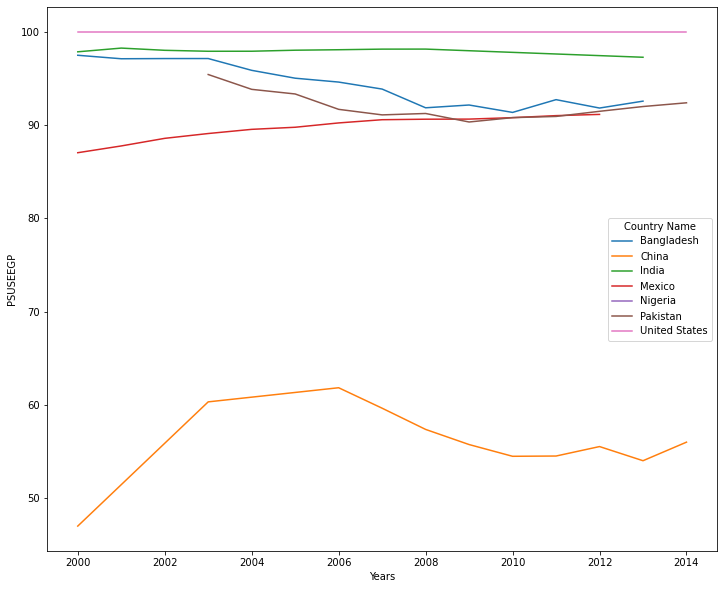

In [112]:
fig = plt.figure(figsize = (12,10))
sns.lineplot(x = 'Years', y = 'PSUSEEGP', hue = 'Country Name', data = d[d['Country Name'].isin(country_select)].reset_index())

In [75]:
#data_indicateur_2_new_3 = data_indicateur_2_new_2.groupby(['Country Name']).mean()
#data_indicateur_2_new_3

<AxesSubplot:ylabel='Country Name'>

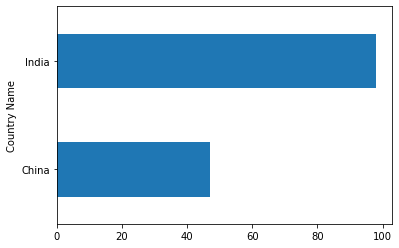

In [131]:
#data_indicateur_2_new_3['2000'].plot.barh()

## Le troisième indicateur : 'Population of the official age for secondary education, both sexes (number)'

In [113]:
mask3 = df['Indicator Name'] == (liste_Indicateur[2])
data_indicateur_3 = df[mask3]
data_indicateur_3

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,2014,2015,Year,DESCRIPTION_y,Series Code,Topic,Short definition,Long definition,Other notes,Source
6550860,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,7457.0,7408.0,NaN,NaN,SP.SEC.TOTL.IN,Population,NaN,Population of the age-group theoretically corr...,NaN,UNESCO Institute for Statistics
6550861,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,7457.0,7408.0,YR2017,5-year average value between 0s and 5s,SP.SEC.TOTL.IN,Population,NaN,Population of the age-group theoretically corr...,NaN,UNESCO Institute for Statistics
6550862,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,4676453.0,4850112.0,YR2017,5-year average value between 0s and 5s,SP.SEC.TOTL.IN,Population,NaN,Population of the age-group theoretically corr...,NaN,UNESCO Institute for Statistics
6550863,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,4676453.0,4850112.0,NaN,NaN,SP.SEC.TOTL.IN,Population,NaN,Population of the age-group theoretically corr...,NaN,UNESCO Institute for Statistics
6550864,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,4676453.0,4850112.0,NaN,NaN,SP.SEC.TOTL.IN,Population,NaN,Population of the age-group theoretically corr...,NaN,UNESCO Institute for Statistics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6553675,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,...,5283336.0,5233782.0,YR2017,5-year average value between 0s and 5s,SP.SEC.TOTL.IN,Population,NaN,Population of the age-group theoretically corr...,NaN,UNESCO Institute for Statistics
6553676,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data have rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,...,1763278.0,1821221.0,YR2017,5-year average value between 0s and 5s,SP.SEC.TOTL.IN,Population,NaN,Population of the age-group theoretically corr...,NaN,UNESCO Institute for Statistics
6553677,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data have rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,...,1763278.0,1821221.0,NaN,NaN,SP.SEC.TOTL.IN,Population,NaN,Population of the age-group theoretically corr...,NaN,UNESCO Institute for Statistics
6553678,ZWE,Zimbabwe,Zimbabwe,Republic of Zimbabwe,ZW,U.S. dollar,Fiscal year end: June 30; reporting period for...,Sub-Saharan Africa,Low income,ZW,...,2026425.0,2047619.0,NaN,NaN,SP.SEC.TOTL.IN,Population,NaN,Population of the age-group theoretically corr...,NaN,UNESCO Institute for Statistics


In [114]:
data_indicateur_3_new = data_indicateur_3[my_columns]
data_indicateur_3_new

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
6550860,Aruba,6403.0,6560.0,6723.0,6932.0,7170.0,7418.0,7641.0,7658.0,7681.0,7691.0,7662.0,7605.0,7535.0,7493.0,7457.0,7408.0
6550861,Aruba,6403.0,6560.0,6723.0,6932.0,7170.0,7418.0,7641.0,7658.0,7681.0,7691.0,7662.0,7605.0,7535.0,7493.0,7457.0,7408.0
6550862,Afghanistan,2650420.0,2777395.0,2915857.0,3055436.0,3184103.0,3292878.0,3363934.0,3443063.0,3542738.0,3672349.0,3839021.0,4044521.0,4262522.0,4477827.0,4676453.0,4850112.0
6550863,Afghanistan,2650420.0,2777395.0,2915857.0,3055436.0,3184103.0,3292878.0,3363934.0,3443063.0,3542738.0,3672349.0,3839021.0,4044521.0,4262522.0,4477827.0,4676453.0,4850112.0
6550864,Afghanistan,2650420.0,2777395.0,2915857.0,3055436.0,3184103.0,3292878.0,3363934.0,3443063.0,3542738.0,3672349.0,3839021.0,4044521.0,4262522.0,4477827.0,4676453.0,4850112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6553675,South Africa,4744850.0,4870601.0,4995701.0,5106551.0,5190307.0,5238452.0,5265505.0,5250518.0,5219397.0,5198891.0,5196030.0,5223321.0,5267420.0,5294980.0,5283336.0,5233782.0
6553676,Zambia,1231828.0,1265863.0,1302284.0,1337909.0,1371599.0,1404677.0,1431726.0,1460323.0,1492226.0,1528843.0,1569975.0,1611691.0,1658160.0,1708848.0,1763278.0,1821221.0
6553677,Zambia,1231828.0,1265863.0,1302284.0,1337909.0,1371599.0,1404677.0,1431726.0,1460323.0,1492226.0,1528843.0,1569975.0,1611691.0,1658160.0,1708848.0,1763278.0,1821221.0
6553678,Zimbabwe,1983407.0,1998598.0,2008258.0,2015561.0,2023873.0,2034066.0,2026737.0,2020780.0,2016726.0,2015706.0,2018022.0,2009047.0,2007007.0,2012733.0,2026425.0,2047619.0


In [115]:
data_indicateur_3_new_3 = data_indicateur_3_new[data_indicateur_3_new['Country Name'].isin(liste_pays)] 
data_indicateur_3_new_3

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
6551156,Bangladesh,21469804.0,21656844.0,21827720.0,21980208.0,22107932.0,22210256.0,22237064.0,22283976.0,22360620.0,22471366.0,22614096.0,22693984.0,22766088.0,22833554.0,22895224.0,22930938.0
6551157,Bangladesh,21469804.0,21656844.0,21827720.0,21980208.0,22107932.0,22210256.0,22237064.0,22283976.0,22360620.0,22471366.0,22614096.0,22693984.0,22766088.0,22833554.0,22895224.0,22930938.0
6551409,China,133526752.0,142060128.0,149223664.0,153572944.0,154829648.0,152990208.0,147848432.0,140301600.0,132270432.0,124544272.0,116835520.0,109401352.0,103104904.0,98007792.0,94020824.0,91333960.0
6551410,China,133526752.0,142060128.0,149223664.0,153572944.0,154829648.0,152990208.0,147848432.0,140301600.0,132270432.0,124544272.0,116835520.0,109401352.0,103104904.0,98007792.0,94020824.0,91333960.0
6551411,China,133526752.0,142060128.0,149223664.0,153572944.0,154829648.0,152990208.0,147848432.0,140301600.0,132270432.0,124544272.0,116835520.0,109401352.0,103104904.0,98007792.0,94020824.0,91333960.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6552836,Nigeria,16779886.0,17129188.0,17417044.0,17728316.0,18069620.0,18437302.0,18826960.0,19194636.0,19627068.0,20119304.0,20660236.0,21242468.0,21839328.0,22498750.0,23212050.0,23976304.0
6552852,Pakistan,23299304.0,24006106.0,24577716.0,25085952.0,25519272.0,25857738.0,26117386.0,26347510.0,26554720.0,26749850.0,26932652.0,27074292.0,27091162.0,27102854.0,27106390.0,27125616.0
6552853,Pakistan,23299304.0,24006106.0,24577716.0,25085952.0,25519272.0,25857738.0,26117386.0,26347510.0,26554720.0,26749850.0,26932652.0,27074292.0,27091162.0,27102854.0,27106390.0,27125616.0
6553631,United States,24249296.0,24573622.0,24865362.0,25108572.0,25324772.0,25536868.0,25735168.0,25741660.0,25728344.0,25702174.0,25652052.0,25575956.0,25397300.0,25117862.0,24834576.0,24617058.0


In [116]:
data_indicateur_3_new_3 = data_indicateur_3_new_3.drop_duplicates()
data_indicateur_3_new_3

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
6551156,Bangladesh,21469804.0,21656844.0,21827720.0,21980208.0,22107932.0,22210256.0,22237064.0,22283976.0,22360620.0,22471366.0,22614096.0,22693984.0,22766088.0,22833554.0,22895224.0,22930938.0
6551409,China,133526752.0,142060128.0,149223664.0,153572944.0,154829648.0,152990208.0,147848432.0,140301600.0,132270432.0,124544272.0,116835520.0,109401352.0,103104904.0,98007792.0,94020824.0,91333960.0
6552110,Indonesia,26716928.0,26689344.0,26476676.0,26383112.0,26432970.0,26596432.0,26838114.0,26526828.0,26265752.0,26120248.0,26098598.0,26231284.0,26671412.0,27060944.0,27388520.0,27674442.0
6552117,India,157622736.0,159662016.0,161247568.0,162675552.0,163983504.0,165141728.0,166168416.0,167108112.0,168083072.0,169098080.0,170145776.0,171221008.0,172268736.0,173302416.0,174268896.0,175129728.0
6552415,Mexico,13008098.0,13093500.0,13131001.0,13179951.0,13244575.0,13333353.0,13451486.0,13594303.0,13745271.0,13896988.0,14042682.0,14171517.0,14266066.0,14324051.0,14349383.0,14345589.0
6552835,Nigeria,16779886.0,17129188.0,17417044.0,17728316.0,18069620.0,18437302.0,18826960.0,19194636.0,19627068.0,20119304.0,20660236.0,21242468.0,21839328.0,22498750.0,23212050.0,23976304.0
6552852,Pakistan,23299304.0,24006106.0,24577716.0,25085952.0,25519272.0,25857738.0,26117386.0,26347510.0,26554720.0,26749850.0,26932652.0,27074292.0,27091162.0,27102854.0,27106390.0,27125616.0
6553631,United States,24249296.0,24573622.0,24865362.0,25108572.0,25324772.0,25536868.0,25735168.0,25741660.0,25728344.0,25702174.0,25652052.0,25575956.0,25397300.0,25117862.0,24834576.0,24617058.0


In [117]:
d1 = pd.DataFrame({'Country Name': data_indicateur_3_new_3['Country Name'], 'Years': 2000*np.ones(len(data_indicateur_3_new_3)),'POASE' :data_indicateur_3_new_3['2000']})
d2 = pd.DataFrame({'Country Name': data_indicateur_3_new_3['Country Name'], 'Years': 2001*np.ones(len(data_indicateur_3_new_3)),'POASE' :data_indicateur_3_new_3['2001']})
d3 = pd.DataFrame({'Country Name': data_indicateur_3_new_3['Country Name'], 'Years': 2002*np.ones(len(data_indicateur_3_new_3)),'POASE' :data_indicateur_3_new_3['2002']})
d4 = pd.DataFrame({'Country Name': data_indicateur_3_new_3['Country Name'], 'Years': 2003*np.ones(len(data_indicateur_3_new_3)),'POASE' :data_indicateur_3_new_3['2003']})
d5 = pd.DataFrame({'Country Name': data_indicateur_3_new_3['Country Name'], 'Years': 2004*np.ones(len(data_indicateur_3_new_3)),'POASE' :data_indicateur_3_new_3['2004']})
d6 = pd.DataFrame({'Country Name': data_indicateur_3_new_3['Country Name'], 'Years': 2005*np.ones(len(data_indicateur_3_new_3)),'POASE' :data_indicateur_3_new_3['2005']})
d7 = pd.DataFrame({'Country Name': data_indicateur_3_new_3['Country Name'], 'Years': 2006*np.ones(len(data_indicateur_3_new_3)),'POASE' :data_indicateur_3_new_3['2006']})
d8 = pd.DataFrame({'Country Name': data_indicateur_3_new_3['Country Name'], 'Years': 2007*np.ones(len(data_indicateur_3_new_3)),'POASE' :data_indicateur_3_new_3['2007']})
d9 = pd.DataFrame({'Country Name': data_indicateur_3_new_3['Country Name'], 'Years': 2008*np.ones(len(data_indicateur_3_new_3)),'POASE' :data_indicateur_3_new_3['2008']})
d10 = pd.DataFrame({'Country Name': data_indicateur_3_new_3['Country Name'], 'Years': 2009*np.ones(len(data_indicateur_3_new_3)),'POASE' :data_indicateur_3_new_3['2009']})
d11= pd.DataFrame({'Country Name': data_indicateur_3_new_3['Country Name'], 'Years': 2010*np.ones(len(data_indicateur_3_new_3)),'POASE' :data_indicateur_3_new_3['2010']})
d12= pd.DataFrame({'Country Name': data_indicateur_3_new_3['Country Name'], 'Years': 2011*np.ones(len(data_indicateur_3_new_3)),'POASE' :data_indicateur_3_new_3['2011']})
d13= pd.DataFrame({'Country Name': data_indicateur_3_new_3['Country Name'], 'Years': 2012*np.ones(len(data_indicateur_3_new_3)),'POASE' :data_indicateur_3_new_3['2012']})
d14= pd.DataFrame({'Country Name': data_indicateur_3_new_3['Country Name'], 'Years': 2013*np.ones(len(data_indicateur_3_new_3)),'POASE' :data_indicateur_3_new_3['2013']})
d15 = pd.DataFrame({'Country Name': data_indicateur_3_new_3['Country Name'], 'Years': 2014*np.ones(len(data_indicateur_3_new_3)),'POASE' :data_indicateur_3_new_3['2014']})
d16 = pd.DataFrame({'Country Name': data_indicateur_3_new_3['Country Name'], 'Years': 2015*np.ones(len(data_indicateur_3_new_3)),'POASE' :data_indicateur_3_new_3['2015']})

In [118]:
d = pd.concat([d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12, d13, d14, d15, d16])

In [119]:
d.head(10)

,Country Name,Years,POASE
6551156,Bangladesh,2000.0,21469804.0
6551409,China,2000.0,133526752.0
6552110,Indonesia,2000.0,26716928.0
6552117,India,2000.0,157622736.0
6552415,Mexico,2000.0,13008098.0
6552835,Nigeria,2000.0,16779886.0
6552852,Pakistan,2000.0,23299304.0
6553631,United States,2000.0,24249296.0
6551156,Bangladesh,2001.0,21656844.0
6551409,China,2001.0,142060128.0


<AxesSubplot:xlabel='Years', ylabel='POASE'>

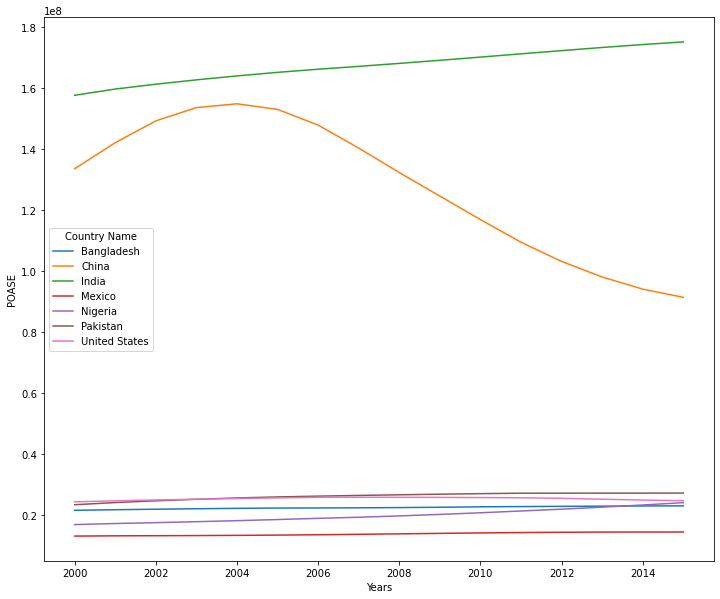

In [120]:
fig = plt.figure(figsize = (12,10))
sns.lineplot(x = 'Years', y = 'POASE', hue = 'Country Name', data = d[d['Country Name'].isin(country_select)].reset_index())

In [179]:
#data_indicateur_3_new_4 = data_indicateur_3_new_3.groupby(['Country Name']).mean()
#data_indicateur_3_new_4

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,
China,133526752.0,142060128.0,149223664.0,153572944.0,154829648.0,152990208.0,147848432.0,140301600.0,132270432.0,124544272.0,116835520.0,109401352.0,103104904.0,98007792.0,94020824.0,91333960.0
India,157622736.0,159662016.0,161247568.0,162675552.0,163983504.0,165141728.0,166168416.0,167108112.0,168083072.0,169098080.0,170145776.0,171221008.0,172268736.0,173302416.0,174268896.0,175129728.0


<AxesSubplot:ylabel='Country Name'>

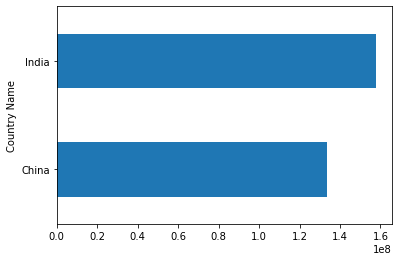

In [183]:
#data_indicateur_3_new_4['2000'].plot.barh()

On aura à peu près le même graphique pour les années 2003, 2006, 2007, 2008 et 2013.

## Le quatrième indicateur: 'Population of the official age for tertiary education, both sexes (number)'

In [121]:
mask4 = df['Indicator Name'] == (liste_Indicateur[3])
data_indicateur_4 = df[mask4]
data_indicateur_4

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,2014,2015,Year,DESCRIPTION_y,Series Code,Topic,Short definition,Long definition,Other notes,Source
6559320,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,7528.0,7634.0,NaN,NaN,SP.TER.TOTL.IN,Population,NaN,Population of the age-group theoretically corr...,NaN,UNESCO Institute for Statistics
6559321,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,7528.0,7634.0,YR2017,5-year average value between 0s and 5s,SP.TER.TOTL.IN,Population,NaN,Population of the age-group theoretically corr...,NaN,UNESCO Institute for Statistics
6559322,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,3034517.0,3199607.0,YR2017,5-year average value between 0s and 5s,SP.TER.TOTL.IN,Population,NaN,Population of the age-group theoretically corr...,NaN,UNESCO Institute for Statistics
6559323,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,3034517.0,3199607.0,NaN,NaN,SP.TER.TOTL.IN,Population,NaN,Population of the age-group theoretically corr...,NaN,UNESCO Institute for Statistics
6559324,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,3034517.0,3199607.0,NaN,NaN,SP.TER.TOTL.IN,Population,NaN,Population of the age-group theoretically corr...,NaN,UNESCO Institute for Statistics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6562135,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,...,5256976.0,NaN,YR2017,5-year average value between 0s and 5s,SP.TER.TOTL.IN,Population,NaN,Population of the age-group theoretically corr...,NaN,UNESCO Institute for Statistics
6562136,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data have rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,...,1497656.0,NaN,YR2017,5-year average value between 0s and 5s,SP.TER.TOTL.IN,Population,NaN,Population of the age-group theoretically corr...,NaN,UNESCO Institute for Statistics
6562137,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data have rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,...,1497656.0,NaN,NaN,NaN,SP.TER.TOTL.IN,Population,NaN,Population of the age-group theoretically corr...,NaN,UNESCO Institute for Statistics
6562138,ZWE,Zimbabwe,Zimbabwe,Republic of Zimbabwe,ZW,U.S. dollar,Fiscal year end: June 30; reporting period for...,Sub-Saharan Africa,Low income,ZW,...,1604698.0,1607620.0,NaN,NaN,SP.TER.TOTL.IN,Population,NaN,Population of the age-group theoretically corr...,NaN,UNESCO Institute for Statistics


In [122]:
data_indicateur_4_new = data_indicateur_4[my_columns]
data_indicateur_4_new

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
6559320,Aruba,5321.0,5603.0,5963.0,6249.0,6478.0,6647.0,6776.0,6579.0,6362.0,6210.0,6237.0,6464.0,6942.0,7292.0,7528.0,7634.0
6559321,Aruba,5321.0,5603.0,5963.0,6249.0,6478.0,6647.0,6776.0,6579.0,6362.0,6210.0,6237.0,6464.0,6942.0,7292.0,7528.0,7634.0
6559322,Afghanistan,1760125.0,1854199.0,1965626.0,2085468.0,2201216.0,2304393.0,2348976.0,2378682.0,2404018.0,2438519.0,2490352.0,2595965.0,2724642.0,2873526.0,3034517.0,3199607.0
6559323,Afghanistan,1760125.0,1854199.0,1965626.0,2085468.0,2201216.0,2304393.0,2348976.0,2378682.0,2404018.0,2438519.0,2490352.0,2595965.0,2724642.0,2873526.0,3034517.0,3199607.0
6559324,Afghanistan,1760125.0,1854199.0,1965626.0,2085468.0,2201216.0,2304393.0,2348976.0,2378682.0,2404018.0,2438519.0,2490352.0,2595965.0,2724642.0,2873526.0,3034517.0,3199607.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6562135,South Africa,4151666.0,4250083.0,4392335.0,4558192.0,4723108.0,4877791.0,5023879.0,5151120.0,5253277.0,5327940.0,5368882.0,5335958.0,5294929.0,5266763.0,5256976.0,NaN
6562136,Zambia,1074103.0,1091997.0,1110077.0,1131888.0,1159347.0,1191803.0,1221639.0,1255827.0,1291432.0,1326472.0,1361124.0,1391685.0,1423615.0,1458724.0,1497656.0,NaN
6562137,Zambia,1074103.0,1091997.0,1110077.0,1131888.0,1159347.0,1191803.0,1221639.0,1255827.0,1291432.0,1326472.0,1361124.0,1391685.0,1423615.0,1458724.0,1497656.0,NaN
6562138,Zimbabwe,1387551.0,1418944.0,1450883.0,1482470.0,1512963.0,1542683.0,1554849.0,1565455.0,1576742.0,1589291.0,1602057.0,1601799.0,1601931.0,1602843.0,1604698.0,1607620.0


In [123]:
data_indicateur_4_new_4 = data_indicateur_4_new[data_indicateur_4_new['Country Name'].isin(liste_pays)] 
data_indicateur_4_new_4

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
6559616,Bangladesh,13345370.0,13669650.0,13951527.0,14201414.0,14424307.0,14620045.0,14793269.0,14917875.0,15038863.0,15038863.0,15075014.0,15122229.0,15217635.0,15303217.0,15388625.0,NaN
6559617,Bangladesh,13345370.0,13669650.0,13951527.0,14201414.0,14424307.0,14620045.0,14793269.0,14917875.0,15038863.0,15038863.0,15075014.0,15122229.0,15217635.0,15303217.0,15388625.0,NaN
6559869,China,95384152.0,94445688.0,94939320.0,97124688.0,101003744.0,106544088.0,113966672.0,121596760.0,127467608.0,130111424.0,129642728.0,125873928.0,119869952.0,113027008.0,106432544.0,99943816.0
6559870,China,95384152.0,94445688.0,94939320.0,97124688.0,101003744.0,106544088.0,113966672.0,121596760.0,127467608.0,130111424.0,129642728.0,125873928.0,119869952.0,113027008.0,106432544.0,99943816.0
6559871,China,95384152.0,94445688.0,94939320.0,97124688.0,101003744.0,106544088.0,113966672.0,121596760.0,127467608.0,130111424.0,129642728.0,125873928.0,119869952.0,113027008.0,106432544.0,99943816.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6561296,Nigeria,11844181.0,12201748.0,12506192.0,12802070.0,13088755.0,13373225.0,13660742.0,13899360.0,14150794.0,14420778.0,14711701.0,15027092.0,15331340.0,15665927.0,16039920.0,NaN
6561312,Pakistan,13244175.0,13710296.0,14177036.0,14689884.0,15244384.0,15837538.0,16428981.0,16955136.0,17369320.0,17692108.0,17940468.0,18147532.0,18297156.0,18470100.0,18656032.0,18852632.0
6561313,Pakistan,13244175.0,13710296.0,14177036.0,14689884.0,15244384.0,15837538.0,16428981.0,16955136.0,17369320.0,17692108.0,17940468.0,18147532.0,18297156.0,18470100.0,18656032.0,18852632.0
6562091,United States,19377156.0,19709414.0,20077388.0,20429280.0,20746050.0,21041800.0,21312414.0,21388224.0,21466660.0,21565184.0,21679020.0,21818524.0,22135816.0,22489522.0,22731736.0,22765372.0


In [124]:
data_indicateur_4_new_4 = data_indicateur_4_new_4.drop_duplicates()
data_indicateur_4_new_4

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
6559616,Bangladesh,13345370.0,13669650.0,13951527.0,14201414.0,14424307.0,14620045.0,14793269.0,14917875.0,15038863.0,15038863.0,15075014.0,15122229.0,15217635.0,15303217.0,15388625.0,NaN
6559869,China,95384152.0,94445688.0,94939320.0,97124688.0,101003744.0,106544088.0,113966672.0,121596760.0,127467608.0,130111424.0,129642728.0,125873928.0,119869952.0,113027008.0,106432544.0,99943816.0
6560570,Indonesia,21010584.0,21271892.0,21442292.0,21471252.0,21368420.0,21221964.0,21125412.0,21365432.0,21350326.0,21075336.0,20665772.0,20239432.0,20335060.0,20531690.0,20780900.0,21059620.0
6560577,India,98502400.0,101009064.0,103475032.0,105819880.0,107908192.0,109758832.0,111369672.0,112694112.0,113852616.0,114887520.0,115795728.0,116576344.0,117250232.0,117936408.0,118681472.0,119469984.0
6560875,Mexico,10290353.0,10311050.0,10304758.0,10295179.0,10295001.0,10314980.0,10363982.0,10473703.0,10600063.0,10737925.0,10881786.0,11026525.0,11167364.0,11299243.0,11420467.0,11533390.0
6561295,Nigeria,11844181.0,12201748.0,12506192.0,12802070.0,13088755.0,13373225.0,13660742.0,13899360.0,14150794.0,14420778.0,14711701.0,15027092.0,15331340.0,15665927.0,16039920.0,NaN
6561312,Pakistan,13244175.0,13710296.0,14177036.0,14689884.0,15244384.0,15837538.0,16428981.0,16955136.0,17369320.0,17692108.0,17940468.0,18147532.0,18297156.0,18470100.0,18656032.0,18852632.0
6562091,United States,19377156.0,19709414.0,20077388.0,20429280.0,20746050.0,21041800.0,21312414.0,21388224.0,21466660.0,21565184.0,21679020.0,21818524.0,22135816.0,22489522.0,22731736.0,22765372.0


In [125]:
d1 = pd.DataFrame({'Country Name': data_indicateur_4_new_4['Country Name'], 'Years': 2000*np.ones(len(data_indicateur_4_new_4)),'POTE' :data_indicateur_4_new_4['2000']})
d2 = pd.DataFrame({'Country Name': data_indicateur_4_new_4['Country Name'], 'Years': 2001*np.ones(len(data_indicateur_4_new_4)),'POTE' :data_indicateur_4_new_4['2001']})
d3 = pd.DataFrame({'Country Name': data_indicateur_4_new_4['Country Name'], 'Years': 2002*np.ones(len(data_indicateur_4_new_4)),'POTE' :data_indicateur_4_new_4['2002']})
d4 = pd.DataFrame({'Country Name': data_indicateur_4_new_4['Country Name'], 'Years': 2003*np.ones(len(data_indicateur_4_new_4)),'POTE' :data_indicateur_4_new_4['2003']})
d5 = pd.DataFrame({'Country Name': data_indicateur_4_new_4['Country Name'], 'Years': 2004*np.ones(len(data_indicateur_4_new_4)),'POTE' :data_indicateur_4_new_4['2004']})
d6 = pd.DataFrame({'Country Name': data_indicateur_4_new_4['Country Name'], 'Years': 2005*np.ones(len(data_indicateur_4_new_4)),'POTE' :data_indicateur_4_new_4['2005']})
d7 = pd.DataFrame({'Country Name': data_indicateur_4_new_4['Country Name'], 'Years': 2006*np.ones(len(data_indicateur_4_new_4)),'POTE' :data_indicateur_4_new_4['2006']})
d8 = pd.DataFrame({'Country Name': data_indicateur_4_new_4['Country Name'], 'Years': 2007*np.ones(len(data_indicateur_4_new_4)),'POTE' :data_indicateur_4_new_4['2007']})
d9 = pd.DataFrame({'Country Name': data_indicateur_4_new_4['Country Name'], 'Years': 2008*np.ones(len(data_indicateur_4_new_4)),'POTE' :data_indicateur_4_new_4['2008']})
d10 = pd.DataFrame({'Country Name': data_indicateur_4_new_4['Country Name'], 'Years': 2009*np.ones(len(data_indicateur_4_new_4)),'POTE' :data_indicateur_4_new_4['2009']})
d11= pd.DataFrame({'Country Name': data_indicateur_4_new_4['Country Name'], 'Years': 2010*np.ones(len(data_indicateur_4_new_4)),'POTE' :data_indicateur_4_new_4['2010']})
d12= pd.DataFrame({'Country Name': data_indicateur_4_new_4['Country Name'], 'Years': 2011*np.ones(len(data_indicateur_4_new_4)),'POTE' :data_indicateur_4_new_4['2011']})
d13= pd.DataFrame({'Country Name': data_indicateur_4_new_4['Country Name'], 'Years': 2012*np.ones(len(data_indicateur_4_new_4)),'POTE' :data_indicateur_4_new_4['2012']})
d14= pd.DataFrame({'Country Name': data_indicateur_4_new_4['Country Name'], 'Years': 2013*np.ones(len(data_indicateur_4_new_4)),'POTE' :data_indicateur_4_new_4['2013']})
d15 = pd.DataFrame({'Country Name': data_indicateur_4_new_4['Country Name'], 'Years': 2014*np.ones(len(data_indicateur_4_new_4)),'POTE' :data_indicateur_4_new_4['2014']})
d16 = pd.DataFrame({'Country Name': data_indicateur_4_new_4['Country Name'], 'Years': 2015*np.ones(len(data_indicateur_4_new_4)),'POTE' :data_indicateur_4_new_4['2015']})

In [126]:
d = pd.concat([d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12, d13, d14, d15, d16])

<AxesSubplot:xlabel='Years', ylabel='POTE'>

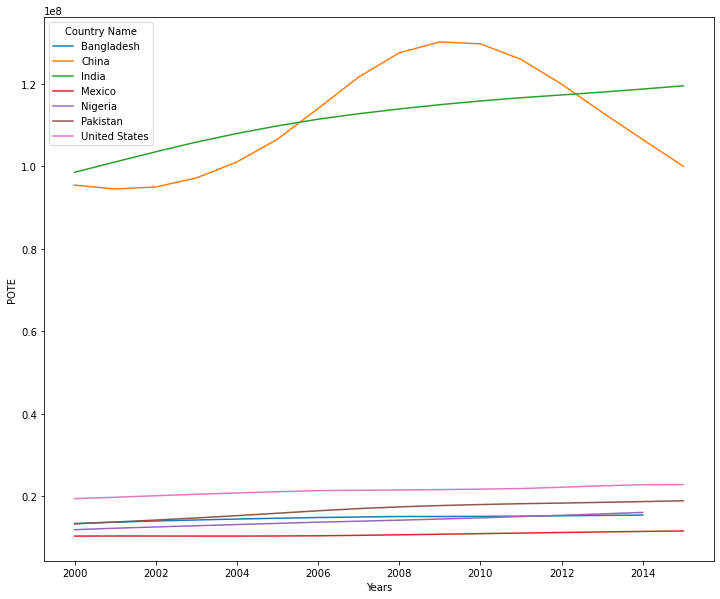

In [127]:
fig = plt.figure(figsize = (12,10))
sns.lineplot(x = 'Years', y = 'POTE', hue = 'Country Name', data = d[d['Country Name'].isin(country_select)].reset_index())

## Le cinquième indicateur : 'Percentage of enrolment in lower secondary education in private institutions (%)'

In [128]:
mask5=df['Indicator Name'] == (liste_Indicateur[4])
data_indicateur_5 = df[mask5]
data_indicateur_5.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,2014,2015,Year,DESCRIPTION_y,Series Code,Topic,Short definition,Long definition,Other notes,Source
5222640,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,NaN,NaN,UIS.PRP.2,Secondary,NaN,Total number of students in lower secondary ed...,NaN,UNESCO Institute for Statistics
5222641,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,YR2017,5-year average value between 0s and 5s,UIS.PRP.2,Secondary,NaN,Total number of students in lower secondary ed...,NaN,UNESCO Institute for Statistics
5222642,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,2.19117,NaN,YR2017,5-year average value between 0s and 5s,UIS.PRP.2,Secondary,NaN,Total number of students in lower secondary ed...,NaN,UNESCO Institute for Statistics
5222643,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,2.19117,NaN,NaN,NaN,UIS.PRP.2,Secondary,NaN,Total number of students in lower secondary ed...,NaN,UNESCO Institute for Statistics
5222644,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,2.19117,NaN,NaN,NaN,UIS.PRP.2,Secondary,NaN,Total number of students in lower secondary ed...,NaN,UNESCO Institute for Statistics


In [129]:
data_indicateur_5_new = data_indicateur_5[my_columns]
data_indicateur_5_new

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
5222640,Aruba,NaN,90.643089,91.274750,90.603607,91.050583,89.877838,91.479187,91.206543,90.778816,91.048218,90.638672,90.757042,90.356331,NaN,NaN,NaN
5222641,Aruba,NaN,90.643089,91.274750,90.603607,91.050583,89.877838,91.479187,91.206543,90.778816,91.048218,90.638672,90.757042,90.356331,NaN,NaN,NaN
5222642,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.346180,2.018810,NaN,2.19117,NaN
5222643,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.346180,2.018810,NaN,2.19117,NaN
5222644,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.346180,2.018810,NaN,2.19117,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5225455,South Africa,2.0,1.999990,2.217600,2.435490,2.512520,2.751680,2.901320,2.722910,2.898390,3.183110,3.511150,3.601870,3.603410,3.63604,3.75923,NaN
5225456,Zambia,NaN,NaN,1.878740,NaN,3.325230,NaN,3.456340,NaN,3.840660,2.587000,2.776270,3.886650,NaN,3.23608,NaN,NaN
5225457,Zambia,NaN,NaN,1.878740,NaN,3.325230,NaN,3.456340,NaN,3.840660,2.587000,2.776270,3.886650,NaN,3.23608,NaN,NaN
5225458,Zimbabwe,NaN,73.205292,73.017113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
data_indicateur_5_new_5 = data_indicateur_5_new[data_indicateur_5_new['Country Name'].isin(liste_pays)] 
data_indicateur_5_new_5

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
5222936,Bangladesh,97.622032,97.781647,97.843674,97.825996,97.713081,97.761589,97.744003,97.694557,97.726273,97.792953,97.764816,97.791779,97.650963,97.794029,NaN,NaN
5222937,Bangladesh,97.622032,97.781647,97.843674,97.825996,97.713081,97.761589,97.744003,97.694557,97.726273,97.792953,97.764816,97.791779,97.650963,97.794029,NaN,NaN
5223189,China,NaN,NaN,NaN,NaN,NaN,NaN,6.009190,6.611260,7.183210,7.659020,7.959320,8.356180,8.715260,9.334120,10.278390,NaN
5223190,China,NaN,NaN,NaN,NaN,NaN,NaN,6.009190,6.611260,7.183210,7.659020,7.959320,8.356180,8.715260,9.334120,10.278390,NaN
5223191,China,NaN,NaN,NaN,NaN,NaN,NaN,6.009190,6.611260,7.183210,7.659020,7.959320,8.356180,8.715260,9.334120,10.278390,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5224616,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,11.513380,14.658540,12.276960,15.267640,17.664190,NaN,NaN,NaN,NaN,NaN
5224632,Pakistan,NaN,NaN,NaN,25.654270,27.109591,27.932280,33.500950,31.557091,31.836149,32.325489,32.181469,31.742229,33.499882,33.981289,36.172642,NaN
5224633,Pakistan,NaN,NaN,NaN,25.654270,27.109591,27.932280,33.500950,31.557091,31.836149,32.325489,32.181469,31.742229,33.499882,33.981289,36.172642,NaN
5225411,United States,9.900000,9.900000,8.780560,9.172230,8.832850,8.734250,8.407540,8.903670,8.906390,9.081620,8.426740,8.334060,8.196950,8.013250,7.850470,NaN


In [131]:
data_indicateur_5_new_5 = data_indicateur_5_new_5.drop_duplicates()
data_indicateur_5_new_5

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
5222936,Bangladesh,97.622032,97.781647,97.843674,97.825996,97.713081,97.761589,97.744003,97.694557,97.726273,97.792953,97.764816,97.791779,97.650963,97.794029,NaN,NaN
5223189,China,NaN,NaN,NaN,NaN,NaN,NaN,6.009190,6.611260,7.183210,7.659020,7.959320,8.356180,8.715260,9.334120,10.278390,NaN
5223890,Indonesia,37.491531,37.029652,36.380409,36.161121,36.067799,37.792671,37.374569,41.297878,37.183300,36.746719,36.289688,36.126671,35.713928,35.113850,36.418018,NaN
5223897,India,34.500000,34.883350,33.934311,33.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835972,NaN,NaN
5224195,Mexico,13.425460,13.834780,13.226490,12.640530,12.647190,12.154370,12.384800,12.764660,13.622150,11.292840,11.479790,11.266400,11.182060,10.687010,10.383230,NaN
5224615,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,11.513380,14.658540,12.276960,15.267640,17.664190,NaN,NaN,NaN,NaN,NaN
5224632,Pakistan,NaN,NaN,NaN,25.654270,27.109591,27.932280,33.500950,31.557091,31.836149,32.325489,32.181469,31.742229,33.499882,33.981289,36.172642,NaN
5225411,United States,9.900000,9.900000,8.780560,9.172230,8.832850,8.734250,8.407540,8.903670,8.906390,9.081620,8.426740,8.334060,8.196950,8.013250,7.850470,NaN


In [132]:
d1 = pd.DataFrame({'Country Name': data_indicateur_5_new_5['Country Name'], 'Years': 2000*np.ones(len(data_indicateur_5_new_5)),'PELSEPI' :data_indicateur_5_new_5['2000']})
d2 = pd.DataFrame({'Country Name': data_indicateur_5_new_5['Country Name'], 'Years': 2001*np.ones(len(data_indicateur_5_new_5)),'PELSEPI' :data_indicateur_5_new_5['2001']})
d3 = pd.DataFrame({'Country Name': data_indicateur_5_new_5['Country Name'], 'Years': 2002*np.ones(len(data_indicateur_5_new_5)),'PELSEPI' :data_indicateur_5_new_5['2002']})
d4 = pd.DataFrame({'Country Name': data_indicateur_5_new_5['Country Name'], 'Years': 2003*np.ones(len(data_indicateur_5_new_5)),'PELSEPI' :data_indicateur_5_new_5['2003']})
d5 = pd.DataFrame({'Country Name': data_indicateur_5_new_5['Country Name'], 'Years': 2004*np.ones(len(data_indicateur_5_new_5)),'PELSEPI' :data_indicateur_5_new_5['2004']})
d6 = pd.DataFrame({'Country Name': data_indicateur_5_new_5['Country Name'], 'Years': 2005*np.ones(len(data_indicateur_5_new_5)),'PELSEPI' :data_indicateur_5_new_5['2005']})
d7 = pd.DataFrame({'Country Name': data_indicateur_5_new_5['Country Name'], 'Years': 2006*np.ones(len(data_indicateur_5_new_5)),'PELSEPI' :data_indicateur_5_new_5['2006']})
d8 = pd.DataFrame({'Country Name': data_indicateur_5_new_5['Country Name'], 'Years': 2007*np.ones(len(data_indicateur_5_new_5)),'PELSEPI' :data_indicateur_5_new_5['2007']})
d9 = pd.DataFrame({'Country Name': data_indicateur_5_new_5['Country Name'], 'Years': 2008*np.ones(len(data_indicateur_5_new_5)),'PELSEPI' :data_indicateur_5_new_5['2008']})
d10 = pd.DataFrame({'Country Name': data_indicateur_5_new_5['Country Name'], 'Years': 2009*np.ones(len(data_indicateur_5_new_5)),'PELSEPI' :data_indicateur_5_new_5['2009']})
d11= pd.DataFrame({'Country Name': data_indicateur_5_new_5['Country Name'], 'Years': 2010*np.ones(len(data_indicateur_5_new_5)),'PELSEPI' :data_indicateur_5_new_5['2010']})
d12= pd.DataFrame({'Country Name': data_indicateur_5_new_5['Country Name'], 'Years': 2011*np.ones(len(data_indicateur_5_new_5)),'PELSEPI' :data_indicateur_5_new_5['2011']})
d13= pd.DataFrame({'Country Name': data_indicateur_5_new_5['Country Name'], 'Years': 2012*np.ones(len(data_indicateur_5_new_5)),'PELSEPI' :data_indicateur_5_new_5['2012']})
d14= pd.DataFrame({'Country Name': data_indicateur_5_new_5['Country Name'], 'Years': 2013*np.ones(len(data_indicateur_5_new_5)),'PELSEPI' :data_indicateur_5_new_5['2013']})
d15 = pd.DataFrame({'Country Name': data_indicateur_5_new_5['Country Name'], 'Years': 2014*np.ones(len(data_indicateur_5_new_5)),'PELSEPI' :data_indicateur_5_new_5['2014']})
d16 = pd.DataFrame({'Country Name': data_indicateur_5_new_5['Country Name'], 'Years': 2015*np.ones(len(data_indicateur_5_new_5)),'PELSEPI' :data_indicateur_5_new_5['2015']})

In [133]:
d = pd.concat([d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12, d13, d14, d15, d16])

<AxesSubplot:xlabel='Years', ylabel='PELSEPI'>

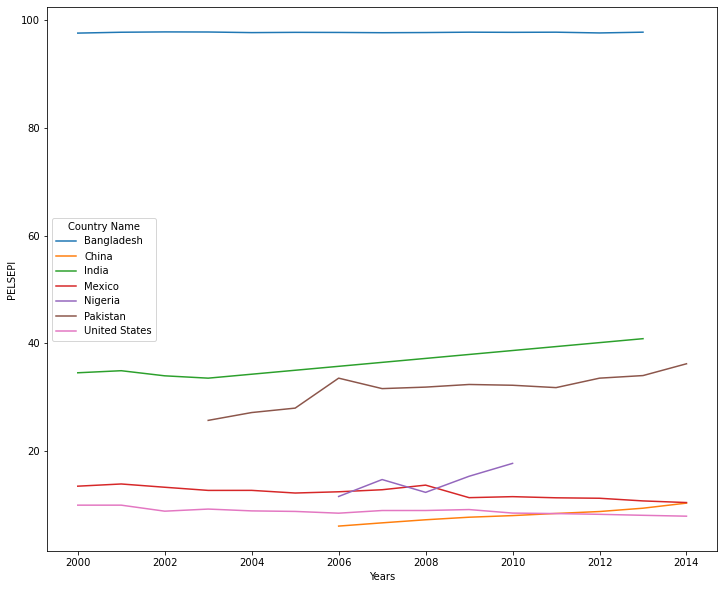

In [134]:
fig = plt.figure(figsize = (12,10))
sns.lineplot(x = 'Years', y = 'PELSEPI', hue = 'Country Name', data = d[d['Country Name'].isin(country_select)].reset_index())

## Le sixième indicateur : 'Percentage of enrolment in secondary education in private institutions (%)'

In [135]:
mask6=df['Indicator Name'] == (liste_Indicateur[5])
data_indicateur_6 = df[mask6]
data_indicateur_6.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,2014,2015,Year,DESCRIPTION_y,Series Code,Topic,Short definition,Long definition,Other notes,Source
5233920,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,NaN,NaN,SE.SEC.PRIV.ZS,Secondary,NaN,Total number of students in secondary educatio...,NaN,UNESCO Institute for Statistics
5233921,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,YR2017,5-year average value between 0s and 5s,SE.SEC.PRIV.ZS,Secondary,NaN,Total number of students in secondary educatio...,NaN,UNESCO Institute for Statistics
5233922,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,1.9775,2.67373,YR2017,5-year average value between 0s and 5s,SE.SEC.PRIV.ZS,Secondary,NaN,Total number of students in secondary educatio...,NaN,UNESCO Institute for Statistics
5233923,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,1.9775,2.67373,NaN,NaN,SE.SEC.PRIV.ZS,Secondary,NaN,Total number of students in secondary educatio...,NaN,UNESCO Institute for Statistics
5233924,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,1.9775,2.67373,NaN,NaN,SE.SEC.PRIV.ZS,Secondary,NaN,Total number of students in secondary educatio...,NaN,UNESCO Institute for Statistics


In [136]:
data_indicateur_6_new = data_indicateur_6[my_columns]
data_indicateur_6_new

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
5233920,Aruba,NaN,91.412567,91.460709,91.629059,91.796928,91.343452,92.243584,92.283203,91.78817,91.840302,91.773361,91.569527,92.383911,NaN,NaN,NaN
5233921,Aruba,NaN,91.412567,91.460709,91.629059,91.796928,91.343452,92.243584,92.283203,91.78817,91.840302,91.773361,91.569527,92.383911,NaN,NaN,NaN
5233922,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.273540,1.947610,NaN,1.97750,2.67373
5233923,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.273540,1.947610,NaN,1.97750,2.67373
5233924,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.273540,1.947610,NaN,1.97750,2.67373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5236735,South Africa,2.29503,2.376950,2.540940,2.565150,2.601420,2.843310,3.016940,2.936420,2.99831,3.236780,3.678780,3.901130,4.106920,NaN,4.18667,NaN
5236736,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5236737,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5236738,Zimbabwe,NaN,71.291229,71.269333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.410339,NaN,NaN,NaN


In [137]:
data_indicateur_6_new_6 = data_indicateur_6_new[data_indicateur_6_new['Country Name'].isin(liste_pays)] 
data_indicateur_6_new_6

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
5234216,Bangladesh,95.73172,95.895073,96.052803,95.915833,95.686783,95.991837,95.824287,95.631042,95.267578,95.325043,95.114578,94.791496,94.457443,94.591690,NaN,94.433029
5234217,Bangladesh,95.73172,95.895073,96.052803,95.915833,95.686783,95.991837,95.824287,95.631042,95.267578,95.325043,95.114578,94.791496,94.457443,94.591690,NaN,94.433029
5234469,China,NaN,NaN,NaN,NaN,NaN,NaN,7.480920,8.321120,9.058380,9.591470,9.939840,10.719270,10.986860,9.830400,10.169300,10.626500
5234470,China,NaN,NaN,NaN,NaN,NaN,NaN,7.480920,8.321120,9.058380,9.591470,9.939840,10.719270,10.986860,9.830400,10.169300,10.626500
5234471,China,NaN,NaN,NaN,NaN,NaN,NaN,7.480920,8.321120,9.058380,9.591470,9.939840,10.719270,10.986860,9.830400,10.169300,10.626500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5235896,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,11.846690,13.679240,12.902290,19.978130,21.531590,24.181801,18.699320,18.715130,NaN,NaN
5235912,Pakistan,NaN,NaN,NaN,24.520929,25.778320,26.396740,32.410580,31.410839,31.352690,31.653940,31.316650,30.878071,31.118959,31.065559,34.718868,35.830280
5235913,Pakistan,NaN,NaN,NaN,24.520929,25.778320,26.396740,32.410580,31.410839,31.352690,31.653940,31.316650,30.878071,31.118959,31.065559,34.718868,35.830280
5236691,United States,9.65265,9.651150,8.809190,9.153380,8.810250,8.661830,8.224650,8.764620,8.778080,8.927140,8.428380,8.270550,8.218100,8.091580,7.911390,NaN


In [138]:
data_indicateur_6_new_6 = data_indicateur_6_new_6.drop_duplicates()
data_indicateur_6_new_6

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
5234216,Bangladesh,95.731720,95.895073,96.052803,95.915833,95.686783,95.991837,95.824287,95.631042,95.267578,95.325043,95.114578,94.791496,94.457443,94.591690,NaN,94.433029
5234469,China,NaN,NaN,NaN,NaN,NaN,NaN,7.480920,8.321120,9.058380,9.591470,9.939840,10.719270,10.986860,9.830400,10.169300,10.626500
5235170,Indonesia,NaN,42.703590,42.721161,42.937859,42.942348,44.169430,43.488480,47.113480,42.885361,43.270809,41.830391,41.445309,41.712841,40.913441,43.355690,41.186432
5235177,India,42.373451,42.563129,41.993721,41.892910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.994678,50.165321,50.172451
5235475,Mexico,15.961070,16.345831,16.036131,15.534070,15.459060,14.967620,14.967580,15.155370,15.494560,13.753210,13.645100,13.347840,13.431620,13.067990,13.789990,NaN
5235895,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,11.846690,13.679240,12.902290,19.978130,21.531590,24.181801,18.699320,18.715130,NaN,NaN
5235912,Pakistan,NaN,NaN,NaN,24.520929,25.778320,26.396740,32.410580,31.410839,31.352690,31.653940,31.316650,30.878071,31.118959,31.065559,34.718868,35.830280
5236691,United States,9.652650,9.651150,8.809190,9.153380,8.810250,8.661830,8.224650,8.764620,8.778080,8.927140,8.428380,8.270550,8.218100,8.091580,7.911390,NaN


In [139]:
d1 = pd.DataFrame({'Country Name': data_indicateur_6_new_6['Country Name'], 'Years': 2000*np.ones(len(data_indicateur_6_new_6)),'PESEPI' :data_indicateur_6_new_6['2000']})
d2 = pd.DataFrame({'Country Name': data_indicateur_6_new_6['Country Name'], 'Years': 2001*np.ones(len(data_indicateur_6_new_6)),'PESEPI' :data_indicateur_6_new_6['2001']})
d3 = pd.DataFrame({'Country Name': data_indicateur_6_new_6['Country Name'], 'Years': 2002*np.ones(len(data_indicateur_6_new_6)),'PESEPI' :data_indicateur_6_new_6['2002']})
d4 = pd.DataFrame({'Country Name': data_indicateur_6_new_6['Country Name'], 'Years': 2003*np.ones(len(data_indicateur_6_new_6)),'PESEPI' :data_indicateur_6_new_6['2003']})
d5 = pd.DataFrame({'Country Name': data_indicateur_6_new_6['Country Name'], 'Years': 2004*np.ones(len(data_indicateur_6_new_6)),'PESEPI' :data_indicateur_6_new_6['2004']})
d6 = pd.DataFrame({'Country Name': data_indicateur_6_new_6['Country Name'], 'Years': 2005*np.ones(len(data_indicateur_6_new_6)),'PESEPI' :data_indicateur_6_new_6['2005']})
d7 = pd.DataFrame({'Country Name': data_indicateur_6_new_6['Country Name'], 'Years': 2006*np.ones(len(data_indicateur_6_new_6)),'PESEPI' :data_indicateur_6_new_6['2006']})
d8 = pd.DataFrame({'Country Name': data_indicateur_6_new_6['Country Name'], 'Years': 2007*np.ones(len(data_indicateur_6_new_6)),'PESEPI' :data_indicateur_6_new_6['2007']})
d9 = pd.DataFrame({'Country Name': data_indicateur_6_new_6['Country Name'], 'Years': 2008*np.ones(len(data_indicateur_6_new_6)),'PESEPI' :data_indicateur_6_new_6['2008']})
d10 = pd.DataFrame({'Country Name': data_indicateur_6_new_6['Country Name'], 'Years': 2009*np.ones(len(data_indicateur_6_new_6)),'PESEPI' :data_indicateur_6_new_6['2009']})
d11= pd.DataFrame({'Country Name': data_indicateur_6_new_6['Country Name'], 'Years': 2010*np.ones(len(data_indicateur_6_new_6)),'PESEPI' :data_indicateur_6_new_6['2010']})
d12= pd.DataFrame({'Country Name': data_indicateur_6_new_6['Country Name'], 'Years': 2011*np.ones(len(data_indicateur_6_new_6)),'PESEPI' :data_indicateur_6_new_6['2011']})
d13= pd.DataFrame({'Country Name': data_indicateur_6_new_6['Country Name'], 'Years': 2012*np.ones(len(data_indicateur_6_new_6)),'PESEPI' :data_indicateur_6_new_6['2012']})
d14= pd.DataFrame({'Country Name': data_indicateur_6_new_6['Country Name'], 'Years': 2013*np.ones(len(data_indicateur_6_new_6)),'PESEPI' :data_indicateur_6_new_6['2013']})
d15 = pd.DataFrame({'Country Name': data_indicateur_6_new_6['Country Name'], 'Years': 2014*np.ones(len(data_indicateur_6_new_6)),'PESEPI' :data_indicateur_6_new_6['2014']})
d16 = pd.DataFrame({'Country Name': data_indicateur_6_new_6['Country Name'], 'Years': 2015*np.ones(len(data_indicateur_6_new_6)),'PESEPI' :data_indicateur_6_new_6['2015']})

In [140]:
d = pd.concat([d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12, d13, d14, d15, d16])

<AxesSubplot:xlabel='Years', ylabel='PESEPI'>

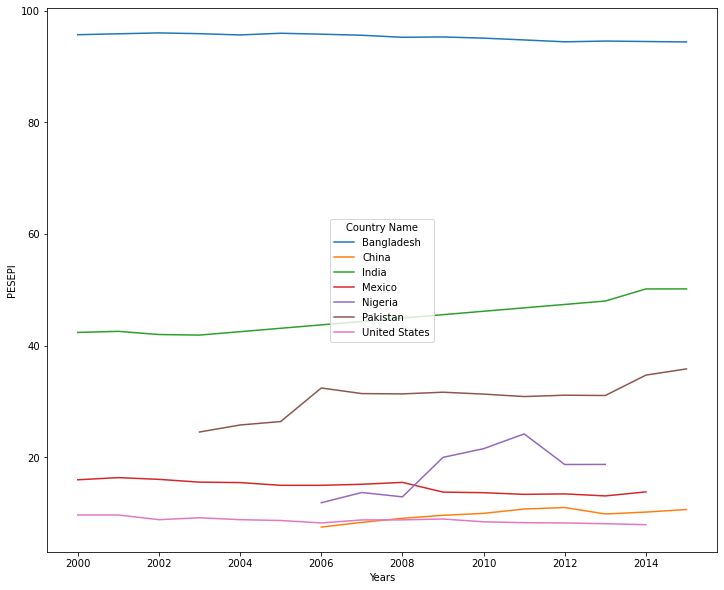

In [141]:
fig = plt.figure(figsize = (12,10))
sns.lineplot(x = 'Years', y = 'PESEPI', hue = 'Country Name', data = d[d['Country Name'].isin(country_select)].reset_index())

## Le septième indicateur : 'Percentage of enrolment in tertiary education in private institutions (%)'

In [142]:
mask7=df['Indicator Name'] == (liste_Indicateur[6])
data_indicateur_7 = df[mask7]
data_indicateur_7.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,2014,2015,Year,DESCRIPTION_y,Series Code,Topic,Short definition,Long definition,Other notes,Source
5236740,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,50.445339,53.94511,NaN,NaN,SE.TER.PRIV.ZS,Tertiary,NaN,Total number of students in tertiary education...,NaN,UNESCO Institute for Statistics
5236741,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,50.445339,53.94511,YR2017,5-year average value between 0s and 5s,SE.TER.PRIV.ZS,Tertiary,NaN,Total number of students in tertiary education...,NaN,UNESCO Institute for Statistics
5236742,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,41.783138,NaN,YR2017,5-year average value between 0s and 5s,SE.TER.PRIV.ZS,Tertiary,NaN,Total number of students in tertiary education...,NaN,UNESCO Institute for Statistics
5236743,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,41.783138,NaN,NaN,NaN,SE.TER.PRIV.ZS,Tertiary,NaN,Total number of students in tertiary education...,NaN,UNESCO Institute for Statistics
5236744,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,41.783138,NaN,NaN,NaN,SE.TER.PRIV.ZS,Tertiary,NaN,Total number of students in tertiary education...,NaN,UNESCO Institute for Statistics


In [143]:
data_indicateur_7_new = data_indicateur_7[my_columns]
data_indicateur_7_new

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
5236740,Aruba,13.18124,12.65356,13.88191,12.14115,13.49765,12.96296,13.27603,17.293909,15.12043,20.4918,19.184549,21.16613,21.21328,51.566471,50.445339,53.94511
5236741,Aruba,13.18124,12.65356,13.88191,12.14115,13.49765,12.96296,13.27603,17.293909,15.12043,20.4918,19.184549,21.16613,21.21328,51.566471,50.445339,53.94511
5236742,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.33123,NaN,NaN,41.783138,NaN
5236743,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.33123,NaN,NaN,41.783138,NaN
5236744,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.33123,NaN,NaN,41.783138,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5239555,South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.22153,5.011230,4.848990,NaN
5239556,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5239557,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5239558,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.817750,13.04604,NaN,NaN,NaN,6.92237


In [144]:
data_indicateur_7_new_7 = data_indicateur_7_new[data_indicateur_7_new['Country Name'].isin(liste_pays)] 
data_indicateur_7_new_7

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
5237036,Bangladesh,62.704330,63.50581,58.474709,58.307030,53.255562,46.807812,48.832161,49.231319,50.157391,43.026970,NaN,45.167370,43.026958,NaN,43.026951,NaN
5237037,Bangladesh,62.704330,63.50581,58.474709,58.307030,53.255562,46.807812,48.832161,49.231319,50.157391,43.026970,NaN,45.167370,43.026958,NaN,43.026951,NaN
5237289,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.48730,13.297520,13.53814
5237290,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.48730,13.297520,13.53814
5237291,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.48730,13.297520,13.53814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5238716,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.927210,6.383030,NaN,NaN,NaN,NaN
5238732,Pakistan,NaN,NaN,NaN,6.539740,12.021530,7.997740,NaN,NaN,32.923149,32.923141,NaN,34.332642,NaN,12.95779,15.119200,13.34742
5238733,Pakistan,NaN,NaN,NaN,6.539740,12.021530,7.997740,NaN,NaN,32.923149,32.923141,NaN,34.332642,NaN,12.95779,15.119200,13.34742
5239511,United States,26.346371,25.96389,23.197100,23.234921,23.924850,24.849010,25.536230,25.782820,26.070339,26.858141,27.497299,27.946720,28.026510,27.83729,27.525360,27.33971


In [145]:
data_indicateur_7_new_7 = data_indicateur_7_new_7.drop_duplicates()
data_indicateur_7_new_7

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
5237036,Bangladesh,62.704330,63.505810,58.474709,58.307030,53.255562,46.807812,48.832161,49.231319,50.157391,43.026970,NaN,45.167370,43.026958,NaN,43.026951,NaN
5237289,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.487300,13.297520,13.538140
5237990,Indonesia,NaN,62.786480,62.654369,61.049759,65.197891,60.520271,NaN,NaN,NaN,59.443649,58.155472,61.684052,66.243828,67.146500,66.944862,67.598038
5237997,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.879509,55.330990,57.875278
5238295,Mexico,30.352261,32.121861,32.791080,33.182671,32.973019,32.693901,32.681019,32.974880,33.327930,33.113499,32.259701,31.667521,31.723070,31.088751,30.612289,NaN
5238715,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.927210,6.383030,NaN,NaN,NaN,NaN
5238732,Pakistan,NaN,NaN,NaN,6.539740,12.021530,7.997740,NaN,NaN,32.923149,32.923141,NaN,34.332642,NaN,12.957790,15.119200,13.347420
5239511,United States,26.346371,25.963890,23.197100,23.234921,23.924850,24.849010,25.536230,25.782820,26.070339,26.858141,27.497299,27.946720,28.026510,27.837290,27.525360,27.339710


In [146]:
d1 = pd.DataFrame({'Country Name': data_indicateur_7_new_7['Country Name'], 'Years': 2000*np.ones(len(data_indicateur_7_new_7)),'PTEPI' :data_indicateur_7_new_7['2000']})
d2 = pd.DataFrame({'Country Name': data_indicateur_7_new_7['Country Name'], 'Years': 2001*np.ones(len(data_indicateur_7_new_7)),'PTEPI' :data_indicateur_7_new_7['2001']})
d3 = pd.DataFrame({'Country Name': data_indicateur_7_new_7['Country Name'], 'Years': 2002*np.ones(len(data_indicateur_7_new_7)),'PTEPI' :data_indicateur_7_new_7['2002']})
d4 = pd.DataFrame({'Country Name': data_indicateur_7_new_7['Country Name'], 'Years': 2003*np.ones(len(data_indicateur_7_new_7)),'PTEPI' :data_indicateur_7_new_7['2003']})
d5 = pd.DataFrame({'Country Name': data_indicateur_7_new_7['Country Name'], 'Years': 2004*np.ones(len(data_indicateur_7_new_7)),'PTEPI' :data_indicateur_7_new_7['2004']})
d6 = pd.DataFrame({'Country Name': data_indicateur_7_new_7['Country Name'], 'Years': 2005*np.ones(len(data_indicateur_7_new_7)),'PTEPI' :data_indicateur_7_new_7['2005']})
d7 = pd.DataFrame({'Country Name': data_indicateur_7_new_7['Country Name'], 'Years': 2006*np.ones(len(data_indicateur_7_new_7)),'PTEPI' :data_indicateur_7_new_7['2006']})
d8 = pd.DataFrame({'Country Name': data_indicateur_7_new_7['Country Name'], 'Years': 2007*np.ones(len(data_indicateur_7_new_7)),'PTEPI' :data_indicateur_7_new_7['2007']})
d9 = pd.DataFrame({'Country Name': data_indicateur_7_new_7['Country Name'], 'Years': 2008*np.ones(len(data_indicateur_7_new_7)),'PTEPI' :data_indicateur_7_new_7['2008']})
d10 = pd.DataFrame({'Country Name': data_indicateur_7_new_7['Country Name'], 'Years': 2009*np.ones(len(data_indicateur_7_new_7)),'PTEPI' :data_indicateur_7_new_7['2009']})
d11= pd.DataFrame({'Country Name': data_indicateur_7_new_7['Country Name'], 'Years': 2010*np.ones(len(data_indicateur_7_new_7)),'PTEPI' :data_indicateur_7_new_7['2010']})
d12= pd.DataFrame({'Country Name': data_indicateur_7_new_7['Country Name'], 'Years': 2011*np.ones(len(data_indicateur_7_new_7)),'PTEPI' :data_indicateur_7_new_7['2011']})
d13= pd.DataFrame({'Country Name': data_indicateur_7_new_7['Country Name'], 'Years': 2012*np.ones(len(data_indicateur_7_new_7)),'PTEPI' :data_indicateur_7_new_7['2012']})
d14= pd.DataFrame({'Country Name': data_indicateur_7_new_7['Country Name'], 'Years': 2013*np.ones(len(data_indicateur_7_new_7)),'PTEPI' :data_indicateur_7_new_7['2013']})
d15 = pd.DataFrame({'Country Name': data_indicateur_7_new_7['Country Name'], 'Years': 2014*np.ones(len(data_indicateur_7_new_7)),'PTEPI' :data_indicateur_7_new_7['2014']})
d16 = pd.DataFrame({'Country Name': data_indicateur_7_new_7['Country Name'], 'Years': 2015*np.ones(len(data_indicateur_7_new_7)),'PTEPI' :data_indicateur_7_new_7['2015']})

In [147]:
d = pd.concat([d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12, d13, d14, d15, d16])

<AxesSubplot:xlabel='Years', ylabel='PTEPI'>

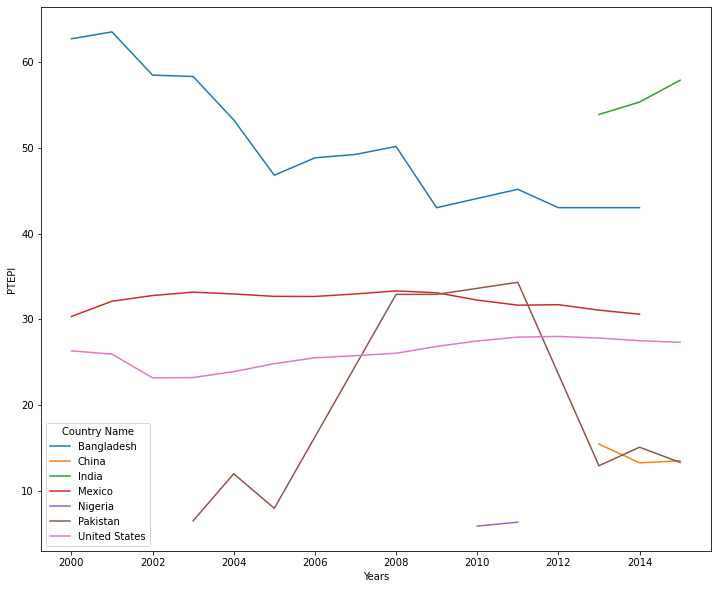

In [148]:
fig = plt.figure(figsize = (12,10))
sns.lineplot(x = 'Years', y = 'PTEPI', hue = 'Country Name', data = d[d['Country Name'].isin(country_select)].reset_index())

## Le huitième indicateur : 'Percentage of enrolment in upper secondary education in private institutions (%)'

In [149]:
mask8=df['Indicator Name'] == (liste_Indicateur[7])
data_indicateur_8 = df[mask8]
data_indicateur_8.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,2014,2015,Year,DESCRIPTION_y,Series Code,Topic,Short definition,Long definition,Other notes,Source
5239560,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,NaN,NaN,UIS.PRP.3,Secondary,NaN,Total number of students in upper secondary ed...,NaN,UNESCO Institute for Statistics
5239561,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,YR2017,5-year average value between 0s and 5s,UIS.PRP.3,Secondary,NaN,Total number of students in upper secondary ed...,NaN,UNESCO Institute for Statistics
5239562,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,1.6171,NaN,YR2017,5-year average value between 0s and 5s,UIS.PRP.3,Secondary,NaN,Total number of students in upper secondary ed...,NaN,UNESCO Institute for Statistics
5239563,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,1.6171,NaN,NaN,NaN,UIS.PRP.3,Secondary,NaN,Total number of students in upper secondary ed...,NaN,UNESCO Institute for Statistics
5239564,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,1.6171,NaN,NaN,NaN,UIS.PRP.3,Secondary,NaN,Total number of students in upper secondary ed...,NaN,UNESCO Institute for Statistics


In [152]:
data_indicateur_8_new = data_indicateur_8[my_columns]
data_indicateur_8_new

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
5239560,Aruba,NaN,92.13382,91.631210,92.530777,92.483482,92.713432,92.943604,93.11512,92.586212,92.530182,92.76770,92.266998,93.864899,NaN,NaN,NaN
5239561,Aruba,NaN,92.13382,91.631210,92.530777,92.483482,92.713432,92.943604,93.11512,92.586212,92.530182,92.76770,92.266998,93.864899,NaN,NaN,NaN
5239562,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.130340,1.823660,NaN,1.61710,NaN
5239563,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.130340,1.823660,NaN,1.61710,NaN
5239564,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.130340,1.823660,NaN,1.61710,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5242375,South Africa,2.55005,2.70718,2.822310,2.660010,2.665580,2.911260,3.099220,3.07404,3.062620,3.273940,3.80457,4.129390,4.481920,6.3092,6.20432,NaN
5242376,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5242377,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5242378,Zimbabwe,NaN,69.21006,69.428688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
data_indicateur_8_new_8 = data_indicateur_8_new.drop_duplicates()
data_indicateur_8_new_8

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
5239560,Aruba,NaN,92.13382,91.631210,92.530777,92.483482,92.713432,92.943604,93.11512,92.586212,92.530182,92.76770,92.266998,93.864899,NaN,NaN,NaN
5239562,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.130340,1.823660,NaN,1.61710,NaN
5239570,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.665590,10.128860,10.63457,10.534380,NaN,NaN,NaN,NaN
5239572,Albania,1.88192,2.54333,3.245890,4.724220,5.408250,5.916740,6.876020,7.54838,8.148810,8.806280,8.74254,9.289040,10.417130,11.21580,11.94113,NaN
5239574,Andorra,NaN,NaN,5.838510,7.047870,6.225680,5.993690,5.613700,5.07177,3.274090,2.284710,2.12940,NaN,3.045690,2.58621,2.87267,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5242355,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5242372,"Yemen, Rep.",NaN,1.38793,NaN,1.689590,1.654190,1.970370,NaN,NaN,NaN,NaN,3.12423,3.651270,NaN,3.69211,NaN,NaN
5242374,South Africa,2.55005,2.70718,2.822310,2.660010,2.665580,2.911260,3.099220,3.07404,3.062620,3.273940,3.80457,4.129390,4.481920,6.30920,6.20432,NaN
5242376,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
data_indicateur_8_new_8 = data_indicateur_8_new[data_indicateur_8_new['Country Name'].isin(liste_pays)] 
data_indicateur_8_new_8

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
5239856,Bangladesh,92.97049,93.088623,93.37706,93.086533,92.558083,93.146759,92.911003,92.494476,91.897888,92.048332,90.594521,90.879623,90.232941,90.423538,NaN,NaN
5239857,Bangladesh,92.97049,93.088623,93.37706,93.086533,92.558083,93.146759,92.911003,92.494476,91.897888,92.048332,90.594521,90.879623,90.232941,90.423538,NaN,NaN
5240109,China,NaN,NaN,NaN,NaN,NaN,NaN,9.830600,10.739640,11.508190,12.025010,12.356050,13.526110,13.595200,10.352570,10.057040,NaN
5240110,China,NaN,NaN,NaN,NaN,NaN,NaN,9.830600,10.739640,11.508190,12.025010,12.356050,13.526110,13.595200,10.352570,10.057040,NaN
5240111,China,NaN,NaN,NaN,NaN,NaN,NaN,9.830600,10.739640,11.508190,12.025010,12.356050,13.526110,13.595200,10.352570,10.057040,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5241536,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,12.307110,12.315930,13.734910,26.137280,26.320009,NaN,NaN,NaN,NaN,NaN
5241552,Pakistan,NaN,NaN,NaN,22.075859,23.075251,23.361151,30.815760,31.197180,30.682039,30.749229,30.171261,29.743349,27.911591,27.249229,32.772591,NaN
5241553,Pakistan,NaN,NaN,NaN,22.075859,23.075251,23.361151,30.815760,31.197180,30.682039,30.749229,30.171261,29.743349,27.911591,27.249229,32.772591,NaN
5242331,United States,9.35522,9.355220,8.84313,9.131030,8.783510,8.577190,8.017100,8.610490,8.638760,8.760310,8.430140,8.203840,8.240380,8.175300,7.976240,NaN


In [631]:
#data_indicateur_8_new_8 = data_indicateur_8_new[((data_indicateur_8_new["Country Name"] == "India")|(data_indicateur_8_new["Country Name"] == "China")|(data_indicateur_8_new["Country Name"] == " Pakistan")|(data_indicateur_8_new["Country Name"] == " Indonésia")|(data_indicateur_8_new["Country Name"] == " United States")|(data_indicateur_8_new["Country Name"] == " Bangladesh")|(data_indicateur_8_new["Country Name"] == " Nigeria")|(data_indicateur_8_new["Country Name"] == " Mexico"))]
#data_indicateur_8_new_8

In [155]:
data_indicateur_8_new_8 = data_indicateur_8_new_8.drop_duplicates()
data_indicateur_8_new_8

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
5239856,Bangladesh,92.970490,93.088623,93.377060,93.086533,92.558083,93.146759,92.911003,92.494476,91.897888,92.048332,90.594521,90.879623,90.232941,90.423538,NaN,NaN
5240109,China,NaN,NaN,NaN,NaN,NaN,NaN,9.830600,10.739640,11.508190,12.025010,12.356050,13.526110,13.595200,10.352570,10.057040,NaN
5240810,Indonesia,NaN,52.729752,53.185539,54.264099,54.222649,53.951530,53.147209,56.387581,51.385239,52.487381,49.821838,48.621731,49.584042,48.347439,52.242149,NaN
5240817,India,53.807758,53.676769,53.504360,53.387379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.312611,NaN,NaN
5241115,Mexico,21.396540,21.784040,21.953930,21.586660,21.142099,20.531191,20.067619,19.868719,19.216860,18.487940,17.718019,17.149780,17.483521,17.366970,19.836870,NaN
5241535,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,12.307110,12.315930,13.734910,26.137280,26.320009,NaN,NaN,NaN,NaN,NaN
5241552,Pakistan,NaN,NaN,NaN,22.075859,23.075251,23.361151,30.815760,31.197180,30.682039,30.749229,30.171261,29.743349,27.911591,27.249229,32.772591,NaN
5242331,United States,9.355220,9.355220,8.843130,9.131030,8.783510,8.577190,8.017100,8.610490,8.638760,8.760310,8.430140,8.203840,8.240380,8.175300,7.976240,NaN


In [156]:
d1 = pd.DataFrame({'Country Name': data_indicateur_8_new_8['Country Name'], 'Years': 2000*np.ones(len(data_indicateur_8_new_8)),'PEIUSEPI' :data_indicateur_8_new_8['2000']})
d2 = pd.DataFrame({'Country Name': data_indicateur_8_new_8['Country Name'], 'Years': 2001*np.ones(len(data_indicateur_8_new_8)),'PEIUSEPI' :data_indicateur_8_new_8['2001']})
d3 = pd.DataFrame({'Country Name': data_indicateur_8_new_8['Country Name'], 'Years': 2002*np.ones(len(data_indicateur_8_new_8)),'PEIUSEPI' :data_indicateur_8_new_8['2002']})
d4 = pd.DataFrame({'Country Name': data_indicateur_8_new_8['Country Name'], 'Years': 2003*np.ones(len(data_indicateur_8_new_8)),'PEIUSEPI' :data_indicateur_8_new_8['2003']})
d5 = pd.DataFrame({'Country Name': data_indicateur_8_new_8['Country Name'], 'Years': 2004*np.ones(len(data_indicateur_8_new_8)),'PEIUSEPI' :data_indicateur_8_new_8['2004']})
d6 = pd.DataFrame({'Country Name': data_indicateur_8_new_8['Country Name'], 'Years': 2005*np.ones(len(data_indicateur_8_new_8)),'PEIUSEPI' :data_indicateur_8_new_8['2005']})
d7 = pd.DataFrame({'Country Name': data_indicateur_8_new_8['Country Name'], 'Years': 2006*np.ones(len(data_indicateur_8_new_8)),'PEIUSEPI' :data_indicateur_8_new_8['2006']})
d8 = pd.DataFrame({'Country Name': data_indicateur_8_new_8['Country Name'], 'Years': 2007*np.ones(len(data_indicateur_8_new_8)),'PEIUSEPI' :data_indicateur_8_new_8['2007']})
d9 = pd.DataFrame({'Country Name': data_indicateur_8_new_8['Country Name'], 'Years': 2008*np.ones(len(data_indicateur_8_new_8)),'PEIUSEPI' :data_indicateur_8_new_8['2008']})
d10 = pd.DataFrame({'Country Name': data_indicateur_8_new_8['Country Name'], 'Years': 2009*np.ones(len(data_indicateur_8_new_8)),'PEIUSEPI' :data_indicateur_8_new_8['2009']})
d11= pd.DataFrame({'Country Name': data_indicateur_8_new_8['Country Name'], 'Years': 2010*np.ones(len(data_indicateur_8_new_8)),'PEIUSEPI' :data_indicateur_8_new_8['2010']})
d12= pd.DataFrame({'Country Name': data_indicateur_8_new_8['Country Name'], 'Years': 2011*np.ones(len(data_indicateur_8_new_8)),'PEIUSEPI' :data_indicateur_8_new_8['2011']})
d13= pd.DataFrame({'Country Name': data_indicateur_8_new_8['Country Name'], 'Years': 2012*np.ones(len(data_indicateur_8_new_8)),'PEIUSEPI' :data_indicateur_8_new_8['2012']})
d14= pd.DataFrame({'Country Name': data_indicateur_8_new_8['Country Name'], 'Years': 2013*np.ones(len(data_indicateur_8_new_8)),'PEIUSEPI' :data_indicateur_8_new_8['2013']})
d15 = pd.DataFrame({'Country Name': data_indicateur_8_new_8['Country Name'], 'Years': 2014*np.ones(len(data_indicateur_8_new_8)),'PEIUSEPI' :data_indicateur_8_new_8['2014']})
d16 = pd.DataFrame({'Country Name': data_indicateur_8_new_8['Country Name'], 'Years': 2015*np.ones(len(data_indicateur_8_new_8)),'PEIUSEPI' :data_indicateur_8_new_8['2015']})

In [157]:
d = pd.concat([d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12, d13, d14, d15, d16])

<AxesSubplot:xlabel='Years', ylabel='PEIUSEPI'>

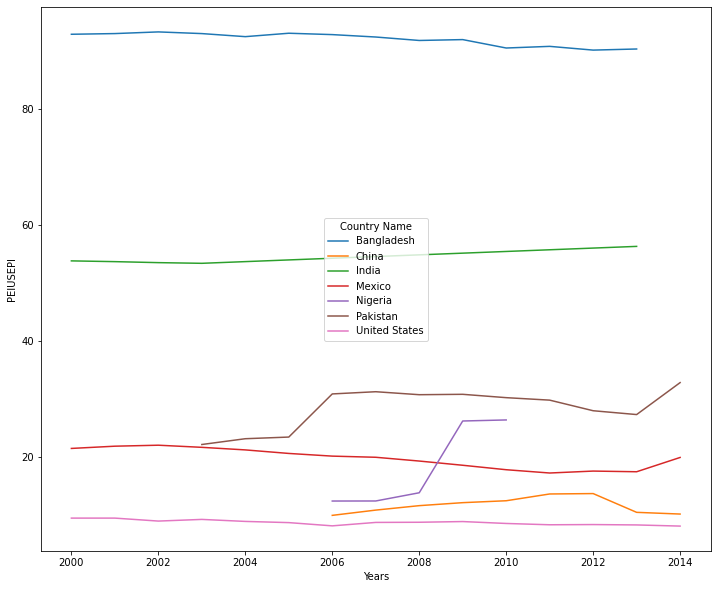

In [158]:
fig = plt.figure(figsize = (12,10))
sns.lineplot(x = 'Years', y = 'PEIUSEPI', hue = 'Country Name', data = d[d['Country Name'].isin(country_select)].reset_index())

## Le neuvième indicateur : 'GDP per capita (current US$)'

In [159]:
mask9 = df['Indicator Name'] == (liste_Indicateur[8])
data_indicateur_9 = df[mask9]
data_indicateur_9.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,2014,2015,Year,DESCRIPTION_y,Series Code,Topic,Short definition,Long definition,Other notes,Source
3510900,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,NaN,NaN,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,NaN,GDP per capita is gross domestic product divid...,NaN,"World Bank national accounts data, and OECD Na..."
3510901,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,YR2017,5-year average value between 0s and 5s,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,NaN,GDP per capita is gross domestic product divid...,NaN,"World Bank national accounts data, and OECD Na..."
3510902,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,612.069651,569.577923,YR2017,5-year average value between 0s and 5s,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,NaN,GDP per capita is gross domestic product divid...,NaN,"World Bank national accounts data, and OECD Na..."
3510903,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,612.069651,569.577923,NaN,NaN,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,NaN,GDP per capita is gross domestic product divid...,NaN,"World Bank national accounts data, and OECD Na..."
3510904,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,612.069651,569.577923,NaN,NaN,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,NaN,GDP per capita is gross domestic product divid...,NaN,"World Bank national accounts data, and OECD Na..."


In [160]:
data_indicateur_9_new = data_indicateur_9[my_columns]
data_indicateur_9_new

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
3510900,Aruba,20620.700626,20670.655664,20434.299436,20834.510199,22567.824925,23302.831988,24014.944267,25921.026052,27546.899390,24631.434860,24271.940421,25324.720362,NaN,NaN,NaN,NaN
3510901,Aruba,20620.700626,20670.655664,20434.299436,20834.510199,22567.824925,23302.831988,24014.944267,25921.026052,27546.899390,24631.434860,24271.940421,25324.720362,NaN,NaN,NaN,NaN
3510902,Afghanistan,NaN,117.409691,187.845095,198.728544,219.141353,250.294130,272.563077,369.835796,373.361116,445.893298,553.300289,603.537023,669.009051,631.744971,612.069651,569.577923
3510903,Afghanistan,NaN,117.409691,187.845095,198.728544,219.141353,250.294130,272.563077,369.835796,373.361116,445.893298,553.300289,603.537023,669.009051,631.744971,612.069651,569.577923
3510904,Afghanistan,NaN,117.409691,187.845095,198.728544,219.141353,250.294130,272.563077,369.835796,373.361116,445.893298,553.300289,603.537023,669.009051,631.744971,612.069651,569.577923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513715,South Africa,3037.225030,2683.578385,2524.193462,3775.608275,4870.831120,5412.506534,5635.281970,6117.225661,5793.261704,5914.076647,7361.755850,8058.833135,7548.255638,6880.445673,6484.584983,5773.483132
3513716,Zambia,341.905562,378.273624,377.130524,429.158343,530.277222,691.317816,1030.154199,1104.587985,1369.068249,1139.110233,1463.213573,1644.619672,1734.930612,1850.793359,1738.088202,1313.889646
3513717,Zambia,341.905562,378.273624,377.130524,429.158343,530.277222,691.317816,1030.154199,1104.587985,1369.068249,1139.110233,1463.213573,1644.619672,1734.930612,1850.793359,1738.088202,1313.889646
3513718,Zimbabwe,547.358878,548.058731,507.348003,453.351155,454.360665,444.760508,414.796232,396.998217,325.678570,624.272243,719.979517,840.949880,968.163871,1026.388289,1031.104616,1033.415842


In [161]:
#data_indicateur_9_new_9 = data_indicateur_9_new[((data_indicateur_9_new["Country Name"] == "India")|(data_indicateur_9_new["Country Name"] == "China")|(data_indicateur_9_new["Country Name"] == " Pakistan")|(data_indicateur_9_new["Country Name"] == " Indonésia")|(data_indicateur_9_new["Country Name"] == " United States")|(data_indicateur_9_new["Country Name"] == " Bangladesh")|(data_indicateur_9_new["Country Name"] == " Nigeria")|(data_indicateur_9_new["Country Name"] == " Mexico"))]
data_indicateur_9_new_9 = data_indicateur_9_new[data_indicateur_9_new['Country Name'].isin(liste_pays)] 
data_indicateur_9_new_9

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
3511196,Bangladesh,405.603307,402.598115,400.613575,432.738897,460.757917,484.155407,494.050147,541.065148,615.777541,681.120537,757.671757,835.789340,856.342857,951.889453,1084.565430,1210.158769
3511197,Bangladesh,405.603307,402.598115,400.613575,432.738897,460.757917,484.155407,494.050147,541.065148,615.777541,681.120537,757.671757,835.789340,856.342857,951.889453,1084.565430,1210.158769
3511449,China,959.372484,1053.108243,1148.508290,1288.643252,1508.668098,1753.417829,2099.229435,2695.365917,3471.248054,3838.433972,4560.512586,5633.795717,6337.883323,7077.770765,7683.502613,8069.213024
3511450,China,959.372484,1053.108243,1148.508290,1288.643252,1508.668098,1753.417829,2099.229435,2695.365917,3471.248054,3838.433972,4560.512586,5633.795717,6337.883323,7077.770765,7683.502613,8069.213024
3511451,China,959.372484,1053.108243,1148.508290,1288.643252,1508.668098,1753.417829,2099.229435,2695.365917,3471.248054,3838.433972,4560.512586,5633.795717,6337.883323,7077.770765,7683.502613,8069.213024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3512876,Nigeria,379.119326,351.799667,459.457212,512.650719,648.815085,807.893874,1019.743286,1136.829645,1383.893354,1097.661422,2327.320670,2527.942003,2755.297787,2996.964302,3221.678116,2655.157977
3512892,Pakistan,533.862411,510.656816,499.860003,563.594342,649.804823,711.469946,873.770273,950.432793,1039.312088,1006.603999,1040.142268,1226.215314,1261.208967,1272.441061,1316.980966,1428.637628
3512893,Pakistan,533.862411,510.656816,499.860003,563.594342,649.804823,711.469946,873.770273,950.432793,1039.312088,1006.603999,1040.142268,1226.215314,1261.208967,1272.441061,1316.980966,1428.637628
3513671,United States,36449.855116,37273.618103,38166.037841,39677.198348,41921.809762,44307.920585,46437.067117,48061.537661,48401.427340,47001.555350,48373.878816,49790.665478,51450.122295,52787.026949,54598.550689,56469.008969


In [162]:
data_indicateur_9_new_9 = data_indicateur_9_new_9.drop_duplicates()
data_indicateur_9_new_9

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
3511196,Bangladesh,405.603307,402.598115,400.613575,432.738897,460.757917,484.155407,494.050147,541.065148,615.777541,681.120537,757.671757,835.789340,856.342857,951.889453,1084.565430,1210.158769
3511449,China,959.372484,1053.108243,1148.508290,1288.643252,1508.668098,1753.417829,2099.229435,2695.365917,3471.248054,3838.433972,4560.512586,5633.795717,6337.883323,7077.770765,7683.502613,8069.213024
3512150,Indonesia,830.584588,796.395875,957.780643,1133.411259,1222.911783,1342.544156,1688.874304,1975.167375,2300.370675,2400.367644,3113.480635,3634.276805,3687.953996,3620.663981,3491.595887,3336.106686
3512157,India,438.864630,447.013897,466.200804,541.135228,621.318377,707.008019,792.025970,1018.166373,991.484630,1090.317765,1345.770153,1461.671957,1446.985410,1452.195373,1573.118089,1596.470003
3512455,Mexico,6720.902113,7031.378864,7106.082019,6751.998987,7199.059665,7986.798439,8767.920258,9330.341687,9689.052887,7748.123301,8959.581416,9834.472689,9820.532572,10298.867661,10452.783533,9152.872306
3512875,Nigeria,379.119326,351.799667,459.457212,512.650719,648.815085,807.893874,1019.743286,1136.829645,1383.893354,1097.661422,2327.320670,2527.942003,2755.297787,2996.964302,3221.678116,2655.157977
3512892,Pakistan,533.862411,510.656816,499.860003,563.594342,649.804823,711.469946,873.770273,950.432793,1039.312088,1006.603999,1040.142268,1226.215314,1261.208967,1272.441061,1316.980966,1428.637628
3513671,United States,36449.855116,37273.618103,38166.037841,39677.198348,41921.809762,44307.920585,46437.067117,48061.537661,48401.427340,47001.555350,48373.878816,49790.665478,51450.122295,52787.026949,54598.550689,56469.008969


In [163]:
d1 = pd.DataFrame({'Country Name': data_indicateur_9_new_9['Country Name'], 'Years': 2000*np.ones(len(data_indicateur_9_new_9)),'PIB' :data_indicateur_9_new_9['2000']})
d2 = pd.DataFrame({'Country Name': data_indicateur_9_new_9['Country Name'], 'Years': 2001*np.ones(len(data_indicateur_9_new_9)),'PIB' :data_indicateur_9_new_9['2001']})
d3 = pd.DataFrame({'Country Name': data_indicateur_9_new_9['Country Name'], 'Years': 2002*np.ones(len(data_indicateur_9_new_9)),'PIB' :data_indicateur_9_new_9['2002']})
d4 = pd.DataFrame({'Country Name': data_indicateur_9_new_9['Country Name'], 'Years': 2003*np.ones(len(data_indicateur_9_new_9)),'PIB' :data_indicateur_9_new_9['2003']})
d5 = pd.DataFrame({'Country Name': data_indicateur_9_new_9['Country Name'], 'Years': 2004*np.ones(len(data_indicateur_9_new_9)),'PIB' :data_indicateur_9_new_9['2004']})
d6 = pd.DataFrame({'Country Name': data_indicateur_9_new_9['Country Name'], 'Years': 2005*np.ones(len(data_indicateur_9_new_9)),'PIB' :data_indicateur_9_new_9['2005']})
d7 = pd.DataFrame({'Country Name': data_indicateur_9_new_9['Country Name'], 'Years': 2006*np.ones(len(data_indicateur_9_new_9)),'PIB' :data_indicateur_9_new_9['2006']})
d8 = pd.DataFrame({'Country Name': data_indicateur_9_new_9['Country Name'], 'Years': 2007*np.ones(len(data_indicateur_9_new_9)),'PIB' :data_indicateur_9_new_9['2007']})
d9 = pd.DataFrame({'Country Name': data_indicateur_9_new_9['Country Name'], 'Years': 2008*np.ones(len(data_indicateur_9_new_9)),'PIB' :data_indicateur_9_new_9['2008']})
d10 = pd.DataFrame({'Country Name': data_indicateur_9_new_9['Country Name'], 'Years': 2009*np.ones(len(data_indicateur_9_new_9)),'PIB' :data_indicateur_9_new_9['2009']})
d11= pd.DataFrame({'Country Name': data_indicateur_9_new_9['Country Name'], 'Years': 2010*np.ones(len(data_indicateur_9_new_9)),'PIB' :data_indicateur_9_new_9['2010']})
d12= pd.DataFrame({'Country Name': data_indicateur_9_new_9['Country Name'], 'Years': 2011*np.ones(len(data_indicateur_9_new_9)),'PIB' :data_indicateur_9_new_9['2011']})
d13= pd.DataFrame({'Country Name': data_indicateur_9_new_9['Country Name'], 'Years': 2012*np.ones(len(data_indicateur_9_new_9)),'PIB' :data_indicateur_9_new_9['2012']})
d14= pd.DataFrame({'Country Name': data_indicateur_9_new_9['Country Name'], 'Years': 2013*np.ones(len(data_indicateur_9_new_9)),'PIB' :data_indicateur_9_new_9['2013']})
d15 = pd.DataFrame({'Country Name': data_indicateur_9_new_9['Country Name'], 'Years': 2014*np.ones(len(data_indicateur_9_new_9)),'PIB' :data_indicateur_9_new_9['2014']})
d16 = pd.DataFrame({'Country Name': data_indicateur_9_new_9['Country Name'], 'Years': 2015*np.ones(len(data_indicateur_9_new_9)),'PIB' :data_indicateur_9_new_9['2015']})

In [164]:
d = pd.concat([d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12, d13, d14, d15, d16])

<AxesSubplot:xlabel='Years', ylabel='PIB'>

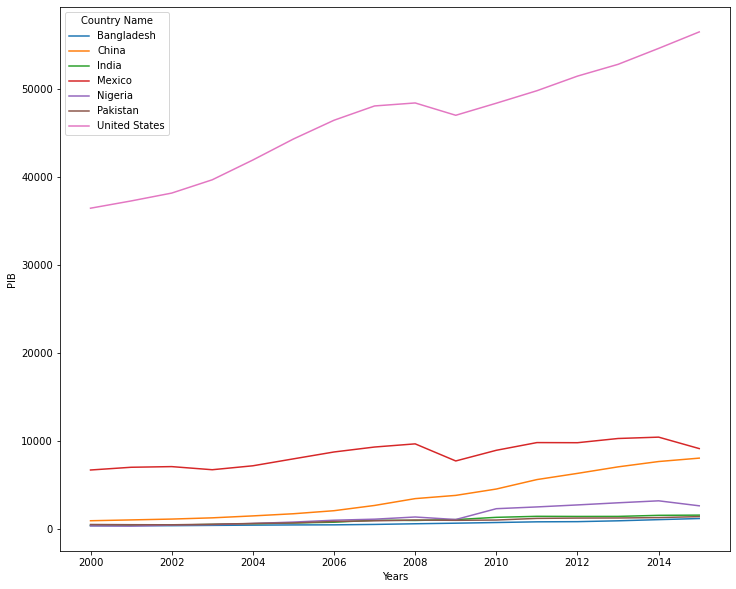

In [165]:
fig = plt.figure(figsize = (12,10))
sns.lineplot(x = 'Years', y = 'PIB', hue = 'Country Name', data = d[d['Country Name'].isin(country_select)].reset_index())

## Le dixième indicateur : 'Enrolment in secondary education, both sexes (number)'

In [166]:
mask10 = df['Indicator Name'] == (liste_Indicateur[9])
data_indicateur_10 = df[mask10]
data_indicateur_10.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,2014,2015,Year,DESCRIPTION_y,Series Code,Topic,Short definition,Long definition,Other notes,Source
3358620,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,NaN,NaN,SE.SEC.ENRL,Secondary,NaN,Total number of students enrolled at public an...,NaN,UNESCO Institute for Statistics
3358621,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,YR2017,5-year average value between 0s and 5s,SE.SEC.ENRL,Secondary,NaN,Total number of students enrolled at public an...,NaN,UNESCO Institute for Statistics
3358622,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,2602734.0,2698816.0,YR2017,5-year average value between 0s and 5s,SE.SEC.ENRL,Secondary,NaN,Total number of students enrolled at public an...,NaN,UNESCO Institute for Statistics
3358623,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,2602734.0,2698816.0,NaN,NaN,SE.SEC.ENRL,Secondary,NaN,Total number of students enrolled at public an...,NaN,UNESCO Institute for Statistics
3358624,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,2602734.0,2698816.0,NaN,NaN,SE.SEC.ENRL,Secondary,NaN,Total number of students enrolled at public an...,NaN,UNESCO Institute for Statistics


In [167]:
data_indicateur_10_new = data_indicateur_10[my_columns]
data_indicateur_10_new

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
3358620,Aruba,6178.0,6428.0,6757.0,6869.0,6973.0,7116.0,7439.0,7853.0,7270.0,7439.0,7342.0,7378.0,8377.0,NaN,NaN,NaN
3358621,Aruba,6178.0,6428.0,6757.0,6869.0,6973.0,7116.0,7439.0,7853.0,7270.0,7439.0,7342.0,7378.0,8377.0,NaN,NaN,NaN
3358622,Afghanistan,NaN,362415.0,NaN,406895.0,594306.0,651453.0,1006841.0,1035782.0,1425009.0,1716190.0,2044157.0,2208963.0,2415884.0,2538420.0,2602734.0,2698816.0
3358623,Afghanistan,NaN,362415.0,NaN,406895.0,594306.0,651453.0,1006841.0,1035782.0,1425009.0,1716190.0,2044157.0,2208963.0,2415884.0,2538420.0,2602734.0,2698816.0
3358624,Afghanistan,NaN,362415.0,NaN,406895.0,594306.0,651453.0,1006841.0,1035782.0,1425009.0,1716190.0,2044157.0,2208963.0,2415884.0,2538420.0,2602734.0,2698816.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3361435,South Africa,4141946.0,4250400.0,4353817.0,4446841.0,4593492.0,4657674.0,4790382.0,4815932.0,4671139.0,4687958.0,4689600.0,4756111.0,4843800.0,NaN,5220975.0,NaN
3361436,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3361437,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3361438,Zimbabwe,844183.0,866171.0,828456.0,758229.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,936734.0,957461.0,NaN,NaN


In [169]:
data_indicateur_10_new_10 = data_indicateur_10_new[data_indicateur_10_new['Country Name'].isin(liste_pays)] 
data_indicateur_10_new_10

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
3358916,Bangladesh,10329065.0,10690742.0,11024326.0,11051234.0,10354760.0,10109395.0,10250862.0,10444714.0,10036889.0,10907065.0,11334055.0,11542964.0,12187154.0,13314077.0,NaN,14566771.0
3358917,Bangladesh,10329065.0,10690742.0,11024326.0,11051234.0,10354760.0,10109395.0,10250862.0,10444714.0,10036889.0,10907065.0,11334055.0,11542964.0,12187154.0,13314077.0,NaN,14566771.0
3359169,China,81487960.0,86516712.0,90722792.0,95624760.0,NaN,NaN,101195120.0,101830968.0,101448264.0,100392464.0,99218080.0,97452464.0,95004208.0,94324416.0,88691792.0,86127200.0
3359170,China,81487960.0,86516712.0,90722792.0,95624760.0,NaN,NaN,101195120.0,101830968.0,101448264.0,100392464.0,99218080.0,97452464.0,95004208.0,94324416.0,88691792.0,86127200.0
3359171,China,81487960.0,86516712.0,90722792.0,95624760.0,NaN,NaN,101195120.0,101830968.0,101448264.0,100392464.0,99218080.0,97452464.0,95004208.0,94324416.0,88691792.0,86127200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3360596,Nigeria,4104345.0,4601105.0,5124270.0,NaN,6279562.0,6397581.0,6436449.0,6068160.0,6888700.0,7827318.0,9056768.0,9591205.0,10212250.0,12532753.0,NaN,NaN
3360612,Pakistan,NaN,NaN,NaN,5734294.0,6449481.0,6852316.0,8421015.0,9145084.0,9339991.0,9432977.0,9654940.0,9939407.0,10371759.0,10794350.0,11286628.0,12077917.0
3360613,Pakistan,NaN,NaN,NaN,5734294.0,6449481.0,6852316.0,8421015.0,9145084.0,9339991.0,9432977.0,9654940.0,9939407.0,10371759.0,10794350.0,11286628.0,12077917.0
3361391,United States,22593562.0,23087042.0,23196310.0,23854458.0,24185786.0,24431934.0,24552316.0,24731028.0,24692888.0,24524564.0,24192786.0,24214304.0,24122436.0,24095460.0,24229776.0,NaN


In [170]:
data_indicateur_10_new_10 = data_indicateur_10_new_10.drop_duplicates()
data_indicateur_10_new_10

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
3358916,Bangladesh,10329065.0,10690742.0,11024326.0,11051234.0,10354760.0,10109395.0,10250862.0,10444714.0,10036889.0,10907065.0,11334055.0,11542964.0,12187154.0,13314077.0,NaN,14566771.0
3359169,China,81487960.0,86516712.0,90722792.0,95624760.0,NaN,NaN,101195120.0,101830968.0,101448264.0,100392464.0,99218080.0,97452464.0,95004208.0,94324416.0,88691792.0,86127200.0
3359870,Indonesia,14720390.0,14828085.0,15140713.0,15872535.0,16353933.0,15993187.0,16797808.0,18716928.0,18314900.0,19520704.0,19975916.0,20777856.0,21445796.0,22322494.0,22586956.0,23756316.0
3359877,India,71030512.0,72392728.0,76215688.0,81050128.0,84569080.0,89461792.0,91529432.0,96049056.0,101783936.0,101110384.0,107686864.0,113727864.0,119148200.0,119400528.0,129438992.0,129542056.0
3360175,Mexico,9094103.0,9357144.0,9692976.0,10188185.0,10403853.0,10564404.0,10883455.0,11122276.0,11444055.0,11474843.0,11681530.0,11836424.0,12139246.0,12467278.0,12993322.0,NaN
3360595,Nigeria,4104345.0,4601105.0,5124270.0,NaN,6279562.0,6397581.0,6436449.0,6068160.0,6888700.0,7827318.0,9056768.0,9591205.0,10212250.0,12532753.0,NaN,NaN
3360612,Pakistan,NaN,NaN,NaN,5734294.0,6449481.0,6852316.0,8421015.0,9145084.0,9339991.0,9432977.0,9654940.0,9939407.0,10371759.0,10794350.0,11286628.0,12077917.0
3361391,United States,22593562.0,23087042.0,23196310.0,23854458.0,24185786.0,24431934.0,24552316.0,24731028.0,24692888.0,24524564.0,24192786.0,24214304.0,24122436.0,24095460.0,24229776.0,NaN


In [171]:
d1 = pd.DataFrame({'Country Name': data_indicateur_10_new_10['Country Name'], 'Years': 2000*np.ones(len(data_indicateur_10_new_10)),'ERS' :data_indicateur_10_new_10['2000']})
d2 = pd.DataFrame({'Country Name': data_indicateur_10_new_10['Country Name'], 'Years': 2001*np.ones(len(data_indicateur_10_new_10)),'ERS' :data_indicateur_10_new_10['2001']})
d3 = pd.DataFrame({'Country Name': data_indicateur_10_new_10['Country Name'], 'Years': 2002*np.ones(len(data_indicateur_10_new_10)),'ERS' :data_indicateur_10_new_10['2002']})
d4 = pd.DataFrame({'Country Name': data_indicateur_10_new_10['Country Name'], 'Years': 2003*np.ones(len(data_indicateur_10_new_10)),'ERS' :data_indicateur_10_new_10['2003']})
d5 = pd.DataFrame({'Country Name': data_indicateur_10_new_10['Country Name'], 'Years': 2004*np.ones(len(data_indicateur_10_new_10)),'ERS' :data_indicateur_10_new_10['2004']})
d6 = pd.DataFrame({'Country Name': data_indicateur_10_new_10['Country Name'], 'Years': 2005*np.ones(len(data_indicateur_10_new_10)),'ERS' :data_indicateur_10_new_10['2005']})
d7 = pd.DataFrame({'Country Name': data_indicateur_10_new_10['Country Name'], 'Years': 2006*np.ones(len(data_indicateur_10_new_10)),'ERS' :data_indicateur_10_new_10['2006']})
d8 = pd.DataFrame({'Country Name': data_indicateur_10_new_10['Country Name'], 'Years': 2007*np.ones(len(data_indicateur_10_new_10)),'ERS' :data_indicateur_10_new_10['2007']})
d9 = pd.DataFrame({'Country Name': data_indicateur_10_new_10['Country Name'], 'Years': 2008*np.ones(len(data_indicateur_10_new_10)),'ERS' :data_indicateur_10_new_10['2008']})
d10 = pd.DataFrame({'Country Name': data_indicateur_10_new_10['Country Name'], 'Years': 2009*np.ones(len(data_indicateur_10_new_10)),'ERS' :data_indicateur_10_new_10['2009']})
d11= pd.DataFrame({'Country Name': data_indicateur_10_new_10['Country Name'], 'Years': 2010*np.ones(len(data_indicateur_10_new_10)),'ERS' :data_indicateur_10_new_10['2010']})
d12= pd.DataFrame({'Country Name': data_indicateur_10_new_10['Country Name'], 'Years': 2011*np.ones(len(data_indicateur_10_new_10)),'ERS' :data_indicateur_10_new_10['2011']})
d13= pd.DataFrame({'Country Name': data_indicateur_10_new_10['Country Name'], 'Years': 2012*np.ones(len(data_indicateur_10_new_10)),'ERS' :data_indicateur_10_new_10['2012']})
d14= pd.DataFrame({'Country Name': data_indicateur_10_new_10['Country Name'], 'Years': 2013*np.ones(len(data_indicateur_10_new_10)),'ERS' :data_indicateur_10_new_10['2013']})
d15 = pd.DataFrame({'Country Name': data_indicateur_10_new_10['Country Name'], 'Years': 2014*np.ones(len(data_indicateur_10_new_10)),'ERS' :data_indicateur_10_new_10['2014']})
d16 = pd.DataFrame({'Country Name': data_indicateur_10_new_10['Country Name'], 'Years': 2015*np.ones(len(data_indicateur_10_new_10)),'ERS' :data_indicateur_10_new_10['2015']})

In [172]:
d = pd.concat([d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12, d13, d14, d15, d16])

<AxesSubplot:xlabel='Years', ylabel='ERS'>

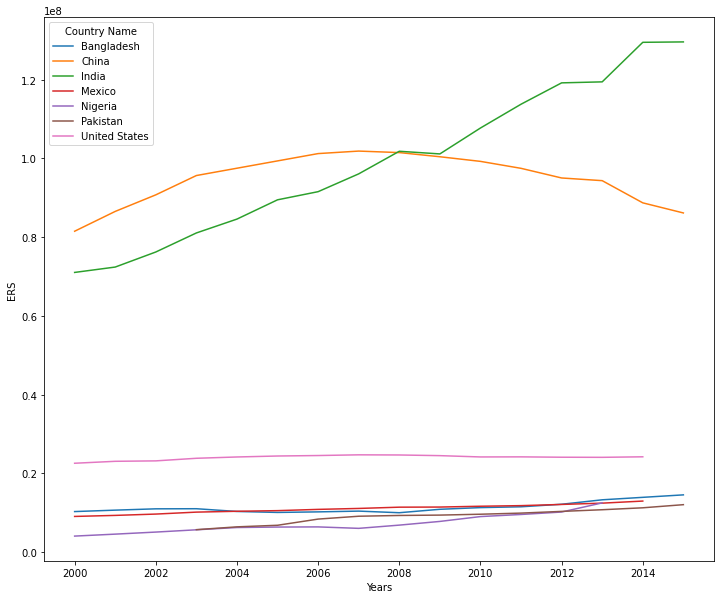

In [173]:
fig = plt.figure(figsize = (12,10))
sns.lineplot(x = 'Years', y = 'ERS', hue = 'Country Name', data = d[d['Country Name'].isin(country_select)].reset_index())

## Le onzième indicateur : 'Population of the official age for upper secondary education, both sexes (number)'

In [174]:
mask11 = df['Indicator Name'] == (liste_Indicateur[10])
data_indicateur_11 = df[mask11]
data_indicateur_11.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,2014,2015,Year,DESCRIPTION_y,Series Code,Topic,Short definition,Long definition,Other notes,Source
6576240,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,4510.0,4492.0,NaN,NaN,SP.SEC.UTOT.IN,Population,NaN,Population of the age-group theoretically corr...,NaN,UNESCO Institute for Statistics
6576241,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,4510.0,4492.0,YR2017,5-year average value between 0s and 5s,SP.SEC.UTOT.IN,Population,NaN,Population of the age-group theoretically corr...,NaN,UNESCO Institute for Statistics
6576242,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,2206482.0,2305137.0,YR2017,5-year average value between 0s and 5s,SP.SEC.UTOT.IN,Population,NaN,Population of the age-group theoretically corr...,NaN,UNESCO Institute for Statistics
6576243,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,2206482.0,2305137.0,NaN,NaN,SP.SEC.UTOT.IN,Population,NaN,Population of the age-group theoretically corr...,NaN,UNESCO Institute for Statistics
6576244,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,2206482.0,2305137.0,NaN,NaN,SP.SEC.UTOT.IN,Population,NaN,Population of the age-group theoretically corr...,NaN,UNESCO Institute for Statistics


In [175]:
data_indicateur_11_new = data_indicateur_11[my_columns]
data_indicateur_11_new

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
6576240,Aruba,3796.0,3887.0,3966.0,4068.0,4194.0,4338.0,4479.0,4486.0,4543.0,4607.0,4623.0,4594.0,4553.0,4529.0,4510.0,4492.0
6576241,Aruba,3796.0,3887.0,3966.0,4068.0,4194.0,4338.0,4479.0,4486.0,4543.0,4607.0,4623.0,4594.0,4553.0,4529.0,4510.0,4492.0
6576242,Afghanistan,1245988.0,1309228.0,1378528.0,1449172.0,1514752.0,1570386.0,1597963.0,1625093.0,1656586.0,1700525.0,1765556.0,1864912.0,1977811.0,2095149.0,2206482.0,2305137.0
6576243,Afghanistan,1245988.0,1309228.0,1378528.0,1449172.0,1514752.0,1570386.0,1597963.0,1625093.0,1656586.0,1700525.0,1765556.0,1864912.0,1977811.0,2095149.0,2206482.0,2305137.0
6576244,Afghanistan,1245988.0,1309228.0,1378528.0,1449172.0,1514752.0,1570386.0,1597963.0,1625093.0,1656586.0,1700525.0,1765556.0,1864912.0,1977811.0,2095149.0,2206482.0,2305137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6579055,South Africa,2784760.0,2862435.0,2941882.0,3022513.0,3095465.0,3145926.0,3179463.0,3179639.0,3153804.0,3121051.0,3099135.0,3107324.0,3137731.0,3173114.0,3192593.0,3184165.0
6579056,Zambia,713675.0,732171.0,753723.0,776714.0,799374.0,820783.0,837061.0,853218.0,870485.0,889980.0,912154.0,935649.0,962187.0,990577.0,1020428.0,1052490.0
6579057,Zambia,713675.0,732171.0,753723.0,776714.0,799374.0,820783.0,837061.0,853218.0,870485.0,889980.0,912154.0,935649.0,962187.0,990577.0,1020428.0,1052490.0
6579058,Zimbabwe,1301540.0,1313878.0,1321977.0,1328536.0,1336030.0,1344484.0,1341028.0,1338730.0,1337559.0,1337565.0,1338788.0,1331526.0,1327364.0,1327040.0,1331677.0,1342035.0


In [176]:
data_indicateur_11_new_11 = data_indicateur_11_new[data_indicateur_11_new['Country Name'].isin(liste_pays)] 
data_indicateur_11_new_11

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
6576536,Bangladesh,12028254.0,12164207.0,12291310.0,12403144.0,12493047.0,12561029.0,12565979.0,12576252.0,12603870.0,12657296.0,12741303.0,12811429.0,12880749.0,12942679.0,12997460.0,13048209.0
6576537,Bangladesh,12028254.0,12164207.0,12291310.0,12403144.0,12493047.0,12561029.0,12565979.0,12576252.0,12603870.0,12657296.0,12741303.0,12811429.0,12880749.0,12942679.0,12997460.0,13048209.0
6576789,China,59692664.0,63482392.0,68390680.0,73786544.0,78335104.0,80661456.0,79682944.0,76289656.0,72095800.0,67986328.0,63935432.0,60089948.0,56444740.0,52732112.0,49212488.0,46531520.0
6576790,China,59692664.0,63482392.0,68390680.0,73786544.0,78335104.0,80661456.0,79682944.0,76289656.0,72095800.0,67986328.0,63935432.0,60089948.0,56444740.0,52732112.0,49212488.0,46531520.0
6576791,China,59692664.0,63482392.0,68390680.0,73786544.0,78335104.0,80661456.0,79682944.0,76289656.0,72095800.0,67986328.0,63935432.0,60089948.0,56444740.0,52732112.0,49212488.0,46531520.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6578216,Nigeria,8091424.0,8266951.0,8400379.0,8547733.0,8711784.0,8885616.0,9064771.0,9218403.0,9399080.0,9608628.0,9845856.0,10109440.0,10370957.0,10660474.0,10977676.0,11326234.0
6578232,Pakistan,12600461.0,13102812.0,13555005.0,13957963.0,14284849.0,14525126.0,14691939.0,14820448.0,14937282.0,15052706.0,15182885.0,15340861.0,15441405.0,15515885.0,15539628.0,15504304.0
6578233,Pakistan,12600461.0,13102812.0,13555005.0,13957963.0,14284849.0,14525126.0,14691939.0,14820448.0,14937282.0,15052706.0,15182885.0,15340861.0,15441405.0,15515885.0,15539628.0,15504304.0
6579011,United States,12080275.0,12263306.0,12415027.0,12536966.0,12649754.0,12763853.0,12882710.0,12918001.0,12984536.0,13052178.0,13081354.0,13051672.0,13022033.0,12845029.0,12580923.0,12321350.0


In [177]:
data_indicateur_11_new_11 = data_indicateur_11_new_11.drop_duplicates()
data_indicateur_11_new_11

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
6576536,Bangladesh,12028254.0,12164207.0,12291310.0,12403144.0,12493047.0,12561029.0,12565979.0,12576252.0,12603870.0,12657296.0,12741303.0,12811429.0,12880749.0,12942679.0,12997460.0,13048209.0
6576789,China,59692664.0,63482392.0,68390680.0,73786544.0,78335104.0,80661456.0,79682944.0,76289656.0,72095800.0,67986328.0,63935432.0,60089948.0,56444740.0,52732112.0,49212488.0,46531520.0
6577490,Indonesia,13336636.0,13411470.0,13276542.0,13164804.0,13132529.0,13189406.0,13314025.0,13150722.0,12981728.0,12854980.0,12772024.0,12755606.0,12963577.0,13177263.0,13400031.0,13619948.0
6577497,India,88120752.0,89492624.0,90582416.0,91583408.0,92509480.0,93310936.0,93973512.0,94465728.0,94937104.0,95450352.0,96032912.0,96680720.0,97328080.0,97985136.0,98613256.0,99198160.0
6577795,Mexico,6397627.0,6440184.0,6452567.0,6468253.0,6490877.0,6528043.0,6584296.0,6660726.0,6743337.0,6827592.0,6909111.0,6983764.0,7049175.0,7107633.0,7154249.0,7180821.0
6578215,Nigeria,8091424.0,8266951.0,8400379.0,8547733.0,8711784.0,8885616.0,9064771.0,9218403.0,9399080.0,9608628.0,9845856.0,10109440.0,10370957.0,10660474.0,10977676.0,11326234.0
6578232,Pakistan,12600461.0,13102812.0,13555005.0,13957963.0,14284849.0,14525126.0,14691939.0,14820448.0,14937282.0,15052706.0,15182885.0,15340861.0,15441405.0,15515885.0,15539628.0,15504304.0
6579011,United States,12080275.0,12263306.0,12415027.0,12536966.0,12649754.0,12763853.0,12882710.0,12918001.0,12984536.0,13052178.0,13081354.0,13051672.0,13022033.0,12845029.0,12580923.0,12321350.0


In [178]:
d1 = pd.DataFrame({'Country Name': data_indicateur_11_new_11['Country Name'], 'Years': 2000*np.ones(len(data_indicateur_11_new_11)),'POAUSE' :data_indicateur_11_new_11['2000']})
d2 = pd.DataFrame({'Country Name': data_indicateur_11_new_11['Country Name'], 'Years': 2001*np.ones(len(data_indicateur_11_new_11)),'POAUSE' :data_indicateur_11_new_11['2001']})
d3 = pd.DataFrame({'Country Name': data_indicateur_11_new_11['Country Name'], 'Years': 2002*np.ones(len(data_indicateur_11_new_11)),'POAUSE' :data_indicateur_11_new_11['2002']})
d4 = pd.DataFrame({'Country Name': data_indicateur_11_new_11['Country Name'], 'Years': 2003*np.ones(len(data_indicateur_11_new_11)),'POAUSE' :data_indicateur_11_new_11['2003']})
d5 = pd.DataFrame({'Country Name': data_indicateur_11_new_11['Country Name'], 'Years': 2004*np.ones(len(data_indicateur_11_new_11)),'POAUSE' :data_indicateur_11_new_11['2004']})
d6 = pd.DataFrame({'Country Name': data_indicateur_11_new_11['Country Name'], 'Years': 2005*np.ones(len(data_indicateur_11_new_11)),'POAUSE' :data_indicateur_11_new_11['2005']})
d7 = pd.DataFrame({'Country Name': data_indicateur_11_new_11['Country Name'], 'Years': 2006*np.ones(len(data_indicateur_11_new_11)),'POAUSE' :data_indicateur_11_new_11['2006']})
d8 = pd.DataFrame({'Country Name': data_indicateur_11_new_11['Country Name'], 'Years': 2007*np.ones(len(data_indicateur_11_new_11)),'POAUSE' :data_indicateur_11_new_11['2007']})
d9 = pd.DataFrame({'Country Name': data_indicateur_11_new_11['Country Name'], 'Years': 2008*np.ones(len(data_indicateur_11_new_11)),'POAUSE' :data_indicateur_11_new_11['2008']})
d10 = pd.DataFrame({'Country Name': data_indicateur_11_new_11['Country Name'], 'Years': 2009*np.ones(len(data_indicateur_11_new_11)),'POAUSE' :data_indicateur_11_new_11['2009']})
d11= pd.DataFrame({'Country Name': data_indicateur_11_new_11['Country Name'], 'Years': 2010*np.ones(len(data_indicateur_11_new_11)),'POAUSE' :data_indicateur_11_new_11['2010']})
d12= pd.DataFrame({'Country Name': data_indicateur_11_new_11['Country Name'], 'Years': 2011*np.ones(len(data_indicateur_11_new_11)),'POAUSE' :data_indicateur_11_new_11['2011']})
d13= pd.DataFrame({'Country Name': data_indicateur_11_new_11['Country Name'], 'Years': 2012*np.ones(len(data_indicateur_11_new_11)),'POAUSE' :data_indicateur_11_new_11['2012']})
d14= pd.DataFrame({'Country Name': data_indicateur_11_new_11['Country Name'], 'Years': 2013*np.ones(len(data_indicateur_11_new_11)),'POAUSE' :data_indicateur_11_new_11['2013']})
d15 = pd.DataFrame({'Country Name': data_indicateur_11_new_11['Country Name'], 'Years': 2014*np.ones(len(data_indicateur_11_new_11)),'POAUSE' :data_indicateur_11_new_11['2014']})
d16 = pd.DataFrame({'Country Name': data_indicateur_11_new_11['Country Name'], 'Years': 2015*np.ones(len(data_indicateur_11_new_11)),'POAUSE' :data_indicateur_11_new_11['2015']})

In [179]:
d = pd.concat([d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12, d13, d14, d15, d16])

<AxesSubplot:xlabel='Years', ylabel='POAUSE'>

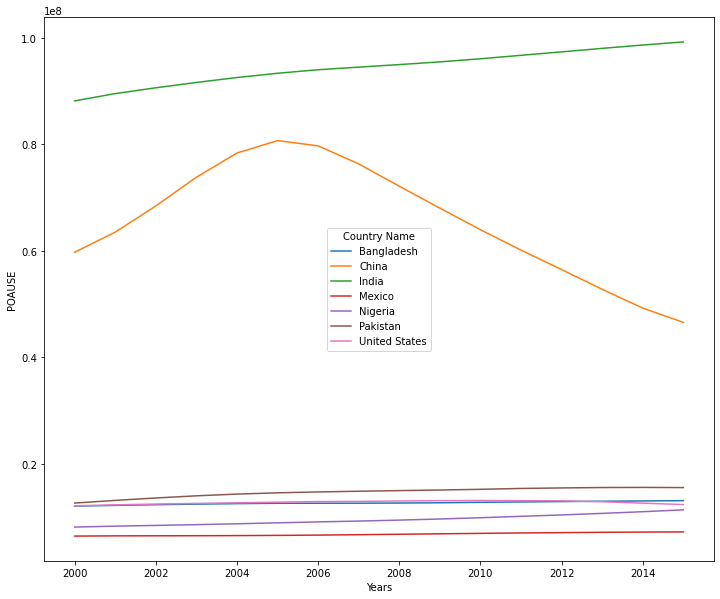

In [180]:
fig = plt.figure(figsize = (12,10))
sns.lineplot(x = 'Years', y = 'POAUSE', hue = 'Country Name', data = d[d['Country Name'].isin(country_select)].reset_index())

## Le douzième indicateur : 'Internet users (per 100 people)'

In [181]:
mask12 = df['Indicator Name'] == (liste_Indicateur[11])
data_indicateur_12 = df[mask12]
data_indicateur_12

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,2014,2015,Year,DESCRIPTION_y,Series Code,Topic,Short definition,Long definition,Other notes,Source
3877500,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,83.78000,88.661227,NaN,NaN,IT.NET.USER.P2,Infrastructure: Communications,NaN,Internet users are individuals who have used t...,NaN,"International Telecommunication Union, World T..."
3877501,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,83.78000,88.661227,YR2017,5-year average value between 0s and 5s,IT.NET.USER.P2,Infrastructure: Communications,NaN,Internet users are individuals who have used t...,NaN,"International Telecommunication Union, World T..."
3877502,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,7.00000,8.260000,YR2017,5-year average value between 0s and 5s,IT.NET.USER.P2,Infrastructure: Communications,NaN,Internet users are individuals who have used t...,NaN,"International Telecommunication Union, World T..."
3877503,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,7.00000,8.260000,NaN,NaN,IT.NET.USER.P2,Infrastructure: Communications,NaN,Internet users are individuals who have used t...,NaN,"International Telecommunication Union, World T..."
3877504,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,7.00000,8.260000,NaN,NaN,IT.NET.USER.P2,Infrastructure: Communications,NaN,Internet users are individuals who have used t...,NaN,"International Telecommunication Union, World T..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3880315,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,...,49.00000,51.919116,YR2017,5-year average value between 0s and 5s,IT.NET.USER.P2,Infrastructure: Communications,NaN,Internet users are individuals who have used t...,NaN,"International Telecommunication Union, World T..."
3880316,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data have rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,...,19.00000,21.000000,YR2017,5-year average value between 0s and 5s,IT.NET.USER.P2,Infrastructure: Communications,NaN,Internet users are individuals who have used t...,NaN,"International Telecommunication Union, World T..."
3880317,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data have rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,...,19.00000,21.000000,NaN,NaN,IT.NET.USER.P2,Infrastructure: Communications,NaN,Internet users are individuals who have used t...,NaN,"International Telecommunication Union, World T..."
3880318,ZWE,Zimbabwe,Zimbabwe,Republic of Zimbabwe,ZW,U.S. dollar,Fiscal year end: June 30; reporting period for...,Sub-Saharan Africa,Low income,ZW,...,16.36474,22.742818,NaN,NaN,IT.NET.USER.P2,Infrastructure: Communications,NaN,Internet users are individuals who have used t...,NaN,"International Telecommunication Union, World T..."


In [182]:
#my_columns = ['Country Name','2000','2001','2002','2003','2004','2005', '2006','2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
data_indicateur_12_new = data_indicateur_12[my_columns]
data_indicateur_12_new

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
3877500,Aruba,15.442823,17.100000,18.800000,20.800000,23.000000,25.400000,28.000000,30.900000,52.00,58.00,62.0,69.00,74.000000,78.9,83.78000,88.661227
3877501,Aruba,15.442823,17.100000,18.800000,20.800000,23.000000,25.400000,28.000000,30.900000,52.00,58.00,62.0,69.00,74.000000,78.9,83.78000,88.661227
3877502,Afghanistan,NaN,0.004723,0.004561,0.087891,0.105809,1.224148,2.107124,1.900000,1.84,3.55,4.0,5.00,5.454545,5.9,7.00000,8.260000
3877503,Afghanistan,NaN,0.004723,0.004561,0.087891,0.105809,1.224148,2.107124,1.900000,1.84,3.55,4.0,5.00,5.454545,5.9,7.00000,8.260000
3877504,Afghanistan,NaN,0.004723,0.004561,0.087891,0.105809,1.224148,2.107124,1.900000,1.84,3.55,4.0,5.00,5.454545,5.9,7.00000,8.260000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3880315,South Africa,5.348560,6.346619,6.710322,7.007692,8.425119,7.488543,7.607140,8.065375,8.43,10.00,24.0,33.97,41.000000,46.5,49.00000,51.919116
3880316,Zambia,0.191072,0.233130,0.477751,0.980483,2.013550,2.851752,4.159913,4.870000,5.55,6.31,10.0,11.50,13.468200,15.4,19.00000,21.000000
3880317,Zambia,0.191072,0.233130,0.477751,0.980483,2.013550,2.851752,4.159913,4.870000,5.55,6.31,10.0,11.50,13.468200,15.4,19.00000,21.000000
3880318,Zimbabwe,0.401434,0.799846,1.100000,1.800000,2.100000,2.400000,2.400000,3.000000,3.50,4.00,6.4,8.40,12.000000,15.5,16.36474,22.742818


In [183]:
data_indicateur_12_new_12 = data_indicateur_12_new[data_indicateur_12_new['Country Name'].isin(liste_pays)] 
data_indicateur_12_new_12

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
3877796,Bangladesh,0.071039,0.129808,0.139920,0.163878,0.199036,0.241637,1.000000,1.80,2.5,3.1,3.70,4.500000,5.000000,6.63,13.9,14.400000
3877797,Bangladesh,0.071039,0.129808,0.139920,0.163878,0.199036,0.241637,1.000000,1.80,2.5,3.1,3.70,4.500000,5.000000,6.63,13.9,14.400000
3878049,China,1.775913,2.639650,4.595704,6.200000,7.300000,8.523257,10.523153,16.00,22.6,28.9,34.30,38.300000,42.300117,45.80,47.9,50.300000
3878050,China,1.775913,2.639650,4.595704,6.200000,7.300000,8.523257,10.523153,16.00,22.6,28.9,34.30,38.300000,42.300117,45.80,47.9,50.300000
3878051,China,1.775913,2.639650,4.595704,6.200000,7.300000,8.523257,10.523153,16.00,22.6,28.9,34.30,38.300000,42.300117,45.80,47.9,50.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3879476,Nigeria,0.064081,0.089901,0.320462,0.558576,1.286138,3.549156,5.545036,6.77,8.0,9.3,11.50,13.800000,16.100000,19.10,21.0,24.500000
3879492,Pakistan,NaN,1.318551,2.577427,5.041158,6.164321,6.332329,6.500000,6.80,7.0,7.5,8.00,9.000000,9.960000,10.90,12.0,14.000000
3879493,Pakistan,NaN,1.318551,2.577427,5.041158,6.164321,6.332329,6.500000,6.80,7.0,7.5,8.00,9.000000,9.960000,10.90,12.0,14.000000
3880271,United States,43.079163,49.080832,58.785404,61.697117,64.758256,67.968053,68.931193,75.00,74.0,71.0,71.69,69.729461,74.700000,71.40,73.0,74.554202


In [184]:
data_indicateur_12_new_12 = data_indicateur_12_new_12.drop_duplicates()
data_indicateur_12_new_12

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
3877796,Bangladesh,0.071039,0.129808,0.139920,0.163878,0.199036,0.241637,1.000000,1.800000,2.500000,3.10,3.70,4.500000,5.000000,6.63,13.90,14.400000
3878049,China,1.775913,2.639650,4.595704,6.200000,7.300000,8.523257,10.523153,16.000000,22.600000,28.90,34.30,38.300000,42.300117,45.80,47.90,50.300000
3878750,Indonesia,0.925564,2.018614,2.134136,2.387020,2.600286,3.602025,4.764813,5.786275,7.917479,6.92,10.92,12.280000,14.520000,14.94,17.14,21.976068
3878757,India,0.527532,0.660146,1.537876,1.686490,1.976136,2.388075,2.805500,3.950000,4.380000,5.12,7.50,10.070000,12.580061,15.10,21.00,26.000000
3879055,Mexico,5.081384,7.038023,11.900000,12.900000,14.100000,17.210000,19.520000,20.810000,21.710000,26.34,31.05,37.176295,39.750000,43.46,44.39,57.431043
3879475,Nigeria,0.064081,0.089901,0.320462,0.558576,1.286138,3.549156,5.545036,6.770000,8.000000,9.30,11.50,13.800000,16.100000,19.10,21.00,24.500000
3879492,Pakistan,NaN,1.318551,2.577427,5.041158,6.164321,6.332329,6.500000,6.800000,7.000000,7.50,8.00,9.000000,9.960000,10.90,12.00,14.000000
3880271,United States,43.079163,49.080832,58.785404,61.697117,64.758256,67.968053,68.931193,75.000000,74.000000,71.00,71.69,69.729461,74.700000,71.40,73.00,74.554202


In [185]:
d1 = pd.DataFrame({'Country Name': data_indicateur_12_new_12['Country Name'], 'Years': 2000*np.ones(len(data_indicateur_12_new_12)),'Internet Users' :data_indicateur_12_new_12['2000']})
d2 = pd.DataFrame({'Country Name': data_indicateur_12_new_12['Country Name'], 'Years': 2001*np.ones(len(data_indicateur_12_new_12)),'Internet Users' :data_indicateur_12_new_12['2001']})
d3 = pd.DataFrame({'Country Name': data_indicateur_12_new_12['Country Name'], 'Years': 2002*np.ones(len(data_indicateur_12_new_12)),'Internet Users' :data_indicateur_12_new_12['2002']})
d4 = pd.DataFrame({'Country Name': data_indicateur_12_new_12['Country Name'], 'Years': 2003*np.ones(len(data_indicateur_12_new_12)),'Internet Users' :data_indicateur_12_new_12['2003']})
d5 = pd.DataFrame({'Country Name': data_indicateur_12_new_12['Country Name'], 'Years': 2004*np.ones(len(data_indicateur_12_new_12)),'Internet Users' :data_indicateur_12_new_12['2004']})
d6 = pd.DataFrame({'Country Name': data_indicateur_12_new_12['Country Name'], 'Years': 2005*np.ones(len(data_indicateur_12_new_12)),'Internet Users' :data_indicateur_12_new_12['2005']})
d7 = pd.DataFrame({'Country Name': data_indicateur_12_new_12['Country Name'], 'Years': 2006*np.ones(len(data_indicateur_12_new_12)),'Internet Users' :data_indicateur_12_new_12['2006']})
d8 = pd.DataFrame({'Country Name': data_indicateur_12_new_12['Country Name'], 'Years': 2007*np.ones(len(data_indicateur_12_new_12)),'Internet Users' :data_indicateur_12_new_12['2007']})
d9 = pd.DataFrame({'Country Name': data_indicateur_12_new_12['Country Name'], 'Years': 2008*np.ones(len(data_indicateur_12_new_12)),'Internet Users' :data_indicateur_12_new_12['2008']})
d10 = pd.DataFrame({'Country Name': data_indicateur_12_new_12['Country Name'], 'Years': 2009*np.ones(len(data_indicateur_12_new_12)),'Internet Users' :data_indicateur_12_new_12['2009']})
d11= pd.DataFrame({'Country Name': data_indicateur_12_new_12['Country Name'], 'Years': 2010*np.ones(len(data_indicateur_12_new_12)),'Internet Users' :data_indicateur_12_new_12['2010']})
d12= pd.DataFrame({'Country Name': data_indicateur_12_new_12['Country Name'], 'Years': 2011*np.ones(len(data_indicateur_12_new_12)),'Internet Users' :data_indicateur_12_new_12['2011']})
d13= pd.DataFrame({'Country Name': data_indicateur_12_new_12['Country Name'], 'Years': 2012*np.ones(len(data_indicateur_12_new_12)),'Internet Users' :data_indicateur_12_new_12['2012']})
d14= pd.DataFrame({'Country Name': data_indicateur_12_new_12['Country Name'], 'Years': 2013*np.ones(len(data_indicateur_12_new_12)),'Internet Users' :data_indicateur_12_new_12['2013']})
d15 = pd.DataFrame({'Country Name': data_indicateur_12_new_12['Country Name'], 'Years': 2014*np.ones(len(data_indicateur_12_new_12)),'Internet Users' :data_indicateur_12_new_12['2014']})
d16 = pd.DataFrame({'Country Name': data_indicateur_12_new_12['Country Name'], 'Years': 2015*np.ones(len(data_indicateur_12_new_12)),'Internet Users' :data_indicateur_12_new_12['2015']})

In [186]:
d = pd.concat([d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12, d13, d14, d15, d16])

<AxesSubplot:xlabel='Years', ylabel='Internet Users'>

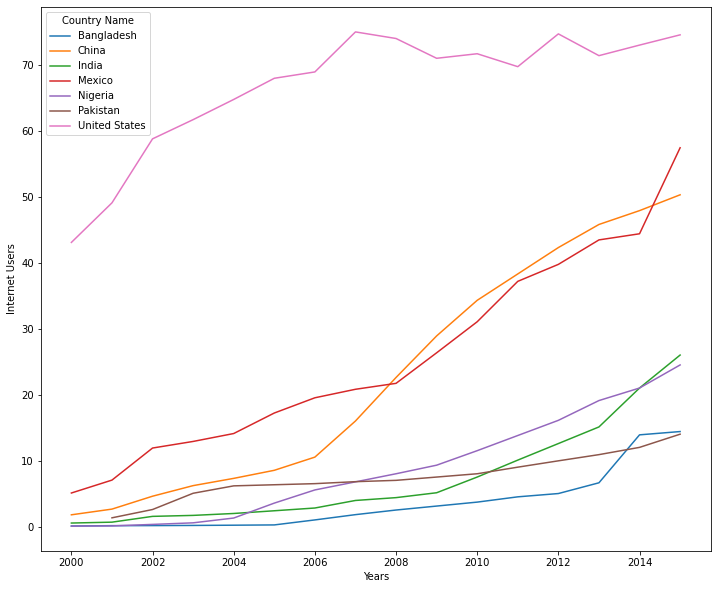

In [187]:
fig = plt.figure(figsize = (12,10))
sns.lineplot(x = 'Years', y = 'Internet Users', hue = 'Country Name', data = d[d['Country Name'].isin(country_select)].reset_index())

<AxesSubplot:ylabel='Country Name'>

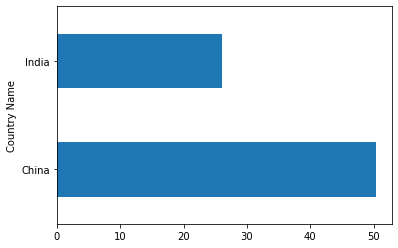

In [189]:
#data_indicateur_12_new_13['2015'].plot.barh()

En 2015, on voit que les utilisateurs d'Internet sont près de 50% plus en Chine qu'en Inde.

## Le treizième indicateur : 'Proportion of primary schools with acces to electicity(%)'

In [188]:
mask13 = df['Indicator Name'] == (liste_Indicateur[12])
data_indicateur_13 = df[mask13]
data_indicateur_13

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,2014,2015,Year,DESCRIPTION_y,Series Code,Topic,Short definition,Long definition,Other notes,Source


# Score d'attractivité 

In [256]:
data6 # données sans les nuls et sans les groupes income

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1757928,Albania,365664.0,377936.0,382205.0,396095.0,393503.0,407403.0,408980.0,410444.0,406553.0,354587.0,355871.0,355158.0,349269.0,346365.000,3.332910e+05,315079.00
1757929,Albania,365664.0,377936.0,382205.0,396095.0,393503.0,407403.0,408980.0,410444.0,406553.0,354587.0,355871.0,355158.0,349269.0,346365.000,3.332910e+05,315079.00
1757985,Austria,748659.0,749135.0,755581.0,764426.0,770391.0,781292.0,782981.0,777792.0,770792.0,762981.0,743709.0,723523.0,709910.0,706501.625,6.973884e+05,691071.25
1757986,Austria,748659.0,749135.0,755581.0,764426.0,770391.0,781292.0,782981.0,777792.0,770792.0,762981.0,743709.0,723523.0,709910.0,706501.625,6.973884e+05,691071.25
1757991,Belgium,1057536.0,1125256.0,1149329.0,1180028.0,805778.0,814539.0,821996.0,825293.0,817258.0,810411.0,805880.0,802659.0,793767.0,1206574.000,1.210112e+06,1217912.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3443503,South Africa,2784760.0,2862435.0,2941882.0,3022513.0,3095465.0,3145926.0,3179463.0,3179639.0,3153804.0,3121051.0,3099135.0,3107324.0,3137731.0,3173114.000,3.192593e+06,3184165.00
3443504,Zambia,713675.0,732171.0,753723.0,776714.0,799374.0,820783.0,837061.0,853218.0,870485.0,889980.0,912154.0,935649.0,962187.0,990577.000,1.020428e+06,1052490.00
3443505,Zambia,713675.0,732171.0,753723.0,776714.0,799374.0,820783.0,837061.0,853218.0,870485.0,889980.0,912154.0,935649.0,962187.0,990577.000,1.020428e+06,1052490.00
3443506,Zimbabwe,1301540.0,1313878.0,1321977.0,1328536.0,1336030.0,1344484.0,1341028.0,1338730.0,1337559.0,1337565.0,1338788.0,1331526.0,1327364.0,1327040.000,1.331677e+06,1342035.00


In [257]:
data_pays_moyennes = data6.mean(axis=1)
data_pays_moyennes 

C:\Users\laeti\AppData\Local\Temp\ipykernel_12816\3707369230.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_pays_moyennes = data6.mean(axis=1)


1757928    3.724002e+05
1757929    3.724002e+05
1757985    7.460083e+05
1757986    7.460083e+05
1757991    9.652705e+05
               ...     
3443503    3.086312e+06
3443504    8.700418e+05
3443505    8.700418e+05
3443506    1.331235e+06
3443507    1.331235e+06
Length: 6784, dtype: float64

In [258]:
data_pays_ecart_Types = data6.std(axis=1)
data_pays_ecart_Types

C:\Users\laeti\AppData\Local\Temp\ipykernel_12816\3858758901.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_pays_ecart_Types = data6.std(axis=1)


1757928     29745.477064
1757929     29745.477064
1757985     30901.246307
1757986     30901.246307
1757991    184668.827368
               ...      
3443503    122318.372634
3443504    103243.567468
3443505    103243.567468
3443506     11293.868349
3443507     11293.868349
Length: 6784, dtype: float64

In [259]:
score_attractivite = data_pays_moyennes + data_pays_ecart_Types
score_attractivite

1757928    4.021457e+05
1757929    4.021457e+05
1757985    7.769096e+05
1757986    7.769096e+05
1757991    1.149939e+06
               ...     
3443503    3.208631e+06
3443504    9.732854e+05
3443505    9.732854e+05
3443506    1.342529e+06
3443507    1.342529e+06
Length: 6784, dtype: float64

In [260]:
#data_pays.reset_index(inplace= True)
name = data6 ['Country Name']
name

1757928         Albania
1757929         Albania
1757985         Austria
1757986         Austria
1757991         Belgium
               ...     
3443503    South Africa
3443504          Zambia
3443505          Zambia
3443506        Zimbabwe
3443507        Zimbabwe
Name: Country Name, Length: 6784, dtype: object

In [261]:

data_score_attractivite = {"score": score_attractivite, 
                           "name": name}
data_score_attractivite_2 = pd.concat(data_score_attractivite,axis = 1) 
data_score_attractivite_2

,score,name
1757928,4.021457e+05,Albania
1757929,4.021457e+05,Albania
1757985,7.769096e+05,Austria
1757986,7.769096e+05,Austria
1757991,1.149939e+06,Belgium
...,...,...
3443503,3.208631e+06,South Africa
3443504,9.732854e+05,Zambia
3443505,9.732854e+05,Zambia
3443506,1.342529e+06,Zimbabwe


In [262]:
data_score_attractivite_2.drop_duplicates()

,score,name
1757928,4.021457e+05,Albania
1757985,7.769096e+05,Austria
1757991,1.149939e+06,Belgium
1757999,6.916987e+05,Bulgaria
1758013,1.121071e+06,Bolivia
...,...,...
3443490,2.109050e+04,Samoa
3443500,1.811984e+06,"Yemen, Rep."
3443502,3.208631e+06,South Africa
3443504,9.732854e+05,Zambia


In [265]:
#Lire les données du monde et affichez l'en-tête
# De GeoPandas, nos données de carte du monde
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) 
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [266]:
score_attractivite_monde = pd.merge(world, data_score_attractivite_2, how='left', on = None)
score_attractivite_monde

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,score
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",4658.962326
1,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",4658.962326
2,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",31.054942
3,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",31.054942
4,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",117870.346771
...,...,...,...,...,...,...,...
6108,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",137852.030913
6109,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",137852.030913
6110,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",54218.245708
6111,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",54218.245708


In [267]:
score_attractivite_monde_2 = score_attractivite_monde.fillna(0) # on remplace les score inexistants par 0.
score_attractivite_monde_2

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,score
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",4658.962326
1,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",4658.962326
2,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",31.054942
3,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",31.054942
4,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",117870.346771
...,...,...,...,...,...,...,...
6108,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",137852.030913
6109,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",137852.030913
6110,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",54218.245708
6111,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",54218.245708


In [268]:
score_Pays_Geo = gpd.GeoDataFrame(score_attractivite_monde_2, geometry='geometry')# Je transforme ma table final en table geopandas

<AxesSubplot:>

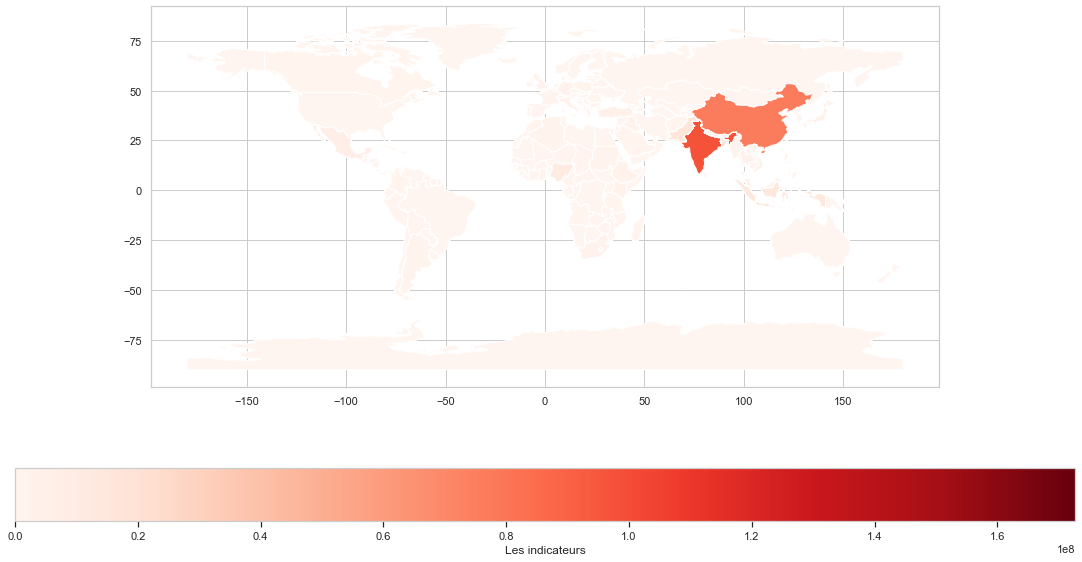

In [269]:
ig, ax = plt.subplots(figsize=(19,10))
score_Pays_Geo.plot(column='score',cmap='Reds', ax=ax, legend= True , legend_kwds={'label' : "Les indicateurs", 'orientation' : "horizontal"})

# Courbes d'évolution 

In [270]:
data6 # données sans les nuls et sans les groupes income

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1757928,Albania,365664.0,377936.0,382205.0,396095.0,393503.0,407403.0,408980.0,410444.0,406553.0,354587.0,355871.0,355158.0,349269.0,346365.000,3.332910e+05,315079.00
1757929,Albania,365664.0,377936.0,382205.0,396095.0,393503.0,407403.0,408980.0,410444.0,406553.0,354587.0,355871.0,355158.0,349269.0,346365.000,3.332910e+05,315079.00
1757985,Austria,748659.0,749135.0,755581.0,764426.0,770391.0,781292.0,782981.0,777792.0,770792.0,762981.0,743709.0,723523.0,709910.0,706501.625,6.973884e+05,691071.25
1757986,Austria,748659.0,749135.0,755581.0,764426.0,770391.0,781292.0,782981.0,777792.0,770792.0,762981.0,743709.0,723523.0,709910.0,706501.625,6.973884e+05,691071.25
1757991,Belgium,1057536.0,1125256.0,1149329.0,1180028.0,805778.0,814539.0,821996.0,825293.0,817258.0,810411.0,805880.0,802659.0,793767.0,1206574.000,1.210112e+06,1217912.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3443503,South Africa,2784760.0,2862435.0,2941882.0,3022513.0,3095465.0,3145926.0,3179463.0,3179639.0,3153804.0,3121051.0,3099135.0,3107324.0,3137731.0,3173114.000,3.192593e+06,3184165.00
3443504,Zambia,713675.0,732171.0,753723.0,776714.0,799374.0,820783.0,837061.0,853218.0,870485.0,889980.0,912154.0,935649.0,962187.0,990577.000,1.020428e+06,1052490.00
3443505,Zambia,713675.0,732171.0,753723.0,776714.0,799374.0,820783.0,837061.0,853218.0,870485.0,889980.0,912154.0,935649.0,962187.0,990577.000,1.020428e+06,1052490.00
3443506,Zimbabwe,1301540.0,1313878.0,1321977.0,1328536.0,1336030.0,1344484.0,1341028.0,1338730.0,1337559.0,1337565.0,1338788.0,1331526.0,1327364.0,1327040.000,1.331677e+06,1342035.00


In [310]:
data6['Country Name'].unique()

array(['Albania', 'Austria', 'Belgium', 'Bulgaria', 'Bolivia',
       'Brunei Darussalam', 'Switzerland', 'Cabo Verde', 'Cuba', 'Cyprus',
       'Czech Republic', 'Germany', 'Denmark', 'Eritrea', 'Spain',
       'Estonia', 'Finland', 'Hungary', 'Indonesia', 'India',
       'Iran, Islamic Rep.', 'Israel', 'Italy', 'Korea, Rep.', 'Lao PDR',
       'Lebanon', 'St. Lucia', 'Lesotho', 'Lithuania', 'Latvia',
       'Macao SAR, China', 'Moldova', 'Mauritius', 'Malaysia', 'Niger',
       'Netherlands', 'Norway', 'New Zealand', 'Peru', 'Portugal',
       'West Bank and Gaza', 'Qatar', 'Romania', 'Rwanda', 'El Salvador',
       'Serbia', 'Slovak Republic', 'Sweden', 'Seychelles', 'Turkey',
       'Ukraine', 'Venezuela, RB', 'Angola', 'Andorra',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia', 'Euro area',
       'Heavily indebted poor countries (HIPC)',
       'Latin America

In [328]:
listePays = ['India', 'China', 'Pakistan','Indonesia','United States', 'Bangladesh','Nigeria', 'Mexico']
data_pays_chosis = data6[data6['Country Name'].isin(listePays)]
data_pays_choisis

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,China,5.772091e+07,5.999785e+07,6.251096e+07,6.489709e+07,6.683400e+07,6.803950e+07,6.830003e+07,6.763815e+07,6.636747e+07,6.452918e+07,6.208365e+07,5.907418e+07,5.588520e+07,5.275481e+07,4.993472e+07,4.756348e+07
1,India,6.921281e+07,7.042615e+07,7.192020e+07,7.352159e+07,7.482848e+07,7.627900e+07,7.717364e+07,7.838634e+07,7.977629e+07,8.009124e+07,8.161044e+07,8.303457e+07,8.433278e+07,8.477099e+07,8.683404e+07,8.722359e+07


In [324]:
data_pays_choisis = data_pays_choisis.drop_duplicates()
data_pays_choisis

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,China,5.772091e+07,5.999785e+07,6.251096e+07,6.489709e+07,6.683400e+07,6.803950e+07,6.830003e+07,6.763815e+07,6.636747e+07,6.452918e+07,6.208365e+07,5.907418e+07,5.588520e+07,5.275481e+07,4.993472e+07,4.756348e+07
1,India,6.921281e+07,7.042615e+07,7.192020e+07,7.352159e+07,7.482848e+07,7.627900e+07,7.717364e+07,7.838634e+07,7.977629e+07,8.009124e+07,8.161044e+07,8.303457e+07,8.433278e+07,8.477099e+07,8.683404e+07,8.722359e+07


In [325]:
data_pays_choisis = data_pays_choisis.groupby(['Country Name']).mean()
data_pays_choisis 

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,
China,5.772091e+07,5.999785e+07,6.251096e+07,6.489709e+07,6.683400e+07,6.803950e+07,6.830003e+07,6.763815e+07,6.636747e+07,6.452918e+07,6.208365e+07,5.907418e+07,5.588520e+07,5.275481e+07,4.993472e+07,4.756348e+07
India,6.921281e+07,7.042615e+07,7.192020e+07,7.352159e+07,7.482848e+07,7.627900e+07,7.717364e+07,7.838634e+07,7.977629e+07,8.009124e+07,8.161044e+07,8.303457e+07,8.433278e+07,8.477099e+07,8.683404e+07,8.722359e+07


In [326]:
data_pays_choisis.reset_index(inplace = True)
data_pays_choisis

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,China,5.772091e+07,5.999785e+07,6.251096e+07,6.489709e+07,6.683400e+07,6.803950e+07,6.830003e+07,6.763815e+07,6.636747e+07,6.452918e+07,6.208365e+07,5.907418e+07,5.588520e+07,5.275481e+07,4.993472e+07,4.756348e+07
1,India,6.921281e+07,7.042615e+07,7.192020e+07,7.352159e+07,7.482848e+07,7.627900e+07,7.717364e+07,7.838634e+07,7.977629e+07,8.009124e+07,8.161044e+07,8.303457e+07,8.433278e+07,8.477099e+07,8.683404e+07,8.722359e+07


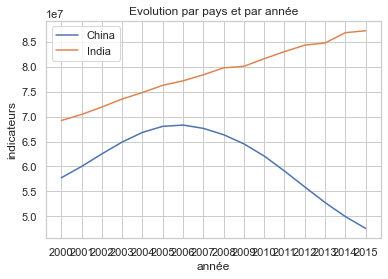

In [327]:
x = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
for index in data_pays_choisis.index: 
  y0=data_pays_choisis.loc[index]['2000']
  y1 = data_pays_choisis.loc[index]['2001']
  y2 = data_pays_choisis.loc[index]['2002']
  y3 = data_pays_choisis.loc[index]['2003']
  y4 = data_pays_choisis.loc[index]['2004']
  y5 = data_pays_choisis.loc[index]['2005']
  y6 = data_pays_choisis.loc[index]['2006']
  y7 = data_pays_choisis.loc[index]['2007']
  y8 = data_pays_choisis.loc[index]['2008']
  y9 = data_pays_choisis.loc[index]['2009']
  y10 = data_pays_choisis.loc[index]['2010']
  y11 = data_pays_choisis.loc[index]['2011']
  y12 = data_pays_choisis.loc[index]['2012']
  y13 = data_pays_choisis.loc[index]['2013']
  y14 = data_pays_choisis.loc[index]['2014']
  y15 = data_pays_choisis.loc[index]['2015']
  y =[y0, y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, y14, y15]
  plt.plot(x,y, label = data_pays_choisis.loc[index]['Country Name'])
  #plt.legend([data_pays_choisis.loc[index]['Country Name']])
  #plt.xlabel(data_pays_choisis.loc[index]['Country Name'])
  plt.xlabel('année')
  plt.ylabel("indicateurs")
  plt.title('Evolution par pays et par année')
plt.legend()

# Analyse bivariée 

In [302]:
data_pivot_final # on récupère la dataFrame de pivot

Indicator Name,Country Name,"Enrolment in secondary education, both sexes (number)",GDP per capita (current US$),Internet users (per 100 people),Percentage of enrolment in secondary education in private institutions (%),Percentage of enrolment in tertiary education in private institutions (%),"Population of the official age for secondary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)"
61,Finland,4.667580e+05,41357.538884,75.963797,8.943469,17.659544,3.870508e+05,3.319884e+05,1.963521e+05
80,Hungary,9.329539e+05,11317.786770,48.414376,12.875589,15.256219,9.363583e+05,6.846168e+05,4.856389e+05
89,Italy,4.549836e+06,31989.564937,42.745780,6.066798,7.848710,4.569492e+06,3.124707e+06,2.890317e+06
97,"Korea, Rep.",3.787779e+06,19921.451298,75.337786,33.435092,80.492913,3.947018e+06,3.521678e+06,2.053829e+06
101,Lao PDR,4.291251e+05,964.048082,5.385868,1.934218,27.097063,9.407322e+05,6.569021e+05,4.293674e+05
103,Lebanon,3.780288e+05,6963.528392,31.857234,57.245849,53.246677,4.936510e+05,4.073264e+05,2.473767e+05
110,"Macao SAR, China",3.958981e+04,44725.224896,46.265604,94.768080,60.067978,4.121150e+04,3.975006e+04,2.151769e+04
114,Malaysia,2.576481e+06,7402.731982,50.012281,6.091169,35.288726,3.731154e+06,2.678383e+06,2.141281e+06
148,Portugal,7.382681e+05,19278.708272,42.939756,15.450508,24.109584,6.928236e+05,6.440177e+05,3.553223e+05
168,Spain,3.167330e+06,26550.555763,52.542393,28.268642,14.294059,2.640644e+06,2.583265e+06,9.930214e+05


In [303]:
CorrMatrix = data_pivot_final.corr()# la matrice de corrélations

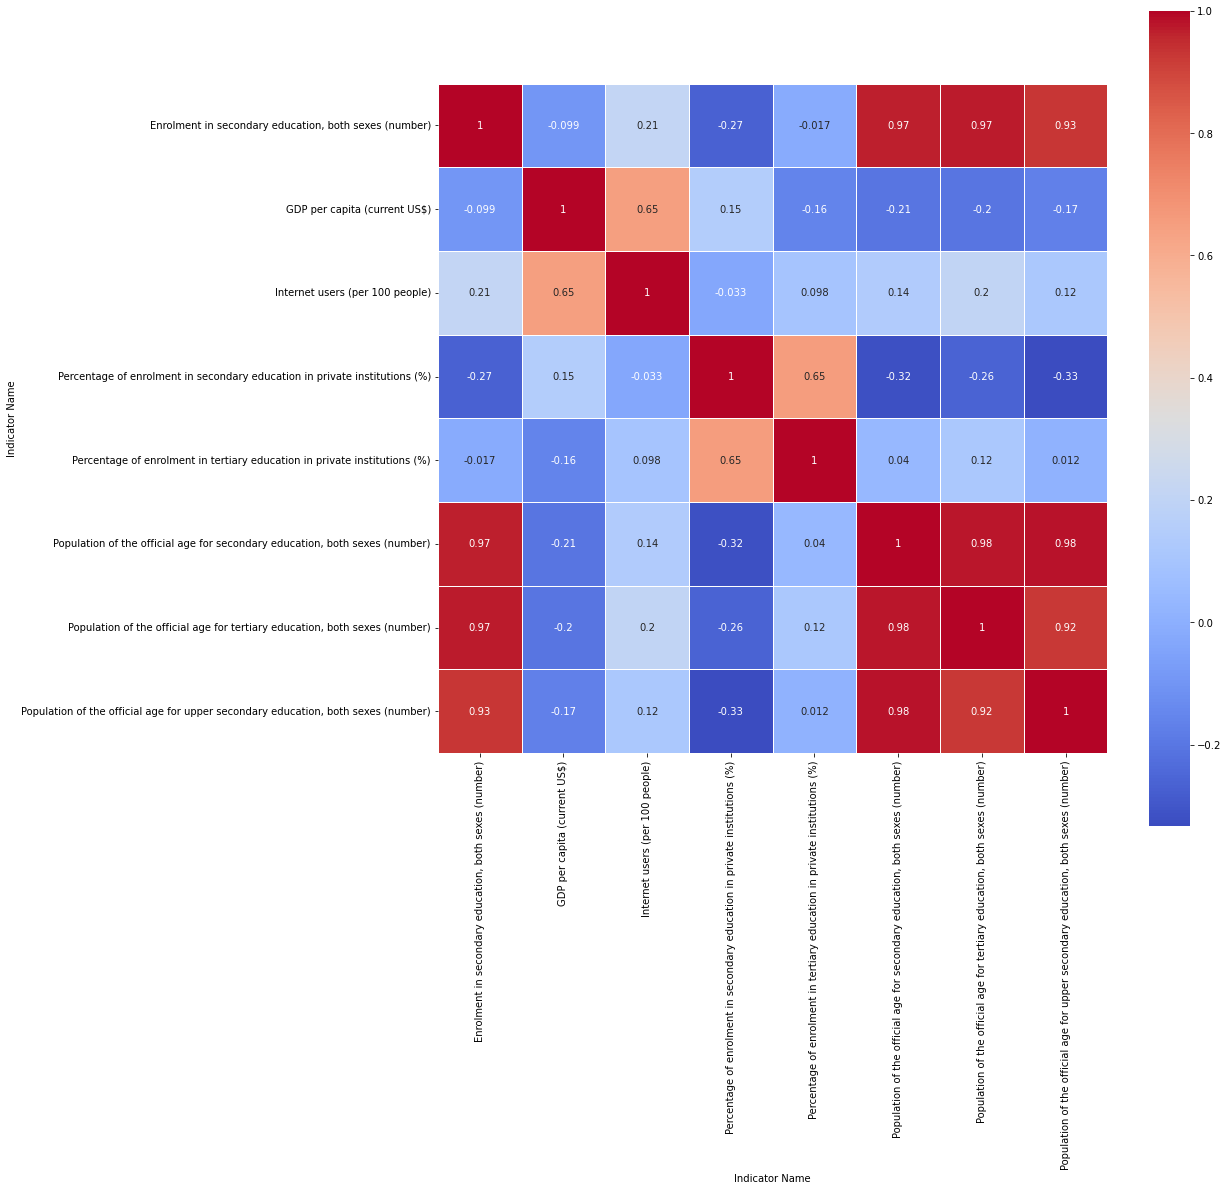

In [304]:
plt.figure(figsize=(15,15))
_= sns.heatmap(CorrMatrix, square = True, annot = True, linewidths = .5, cmap = 'coolwarm')
_= plt.show()

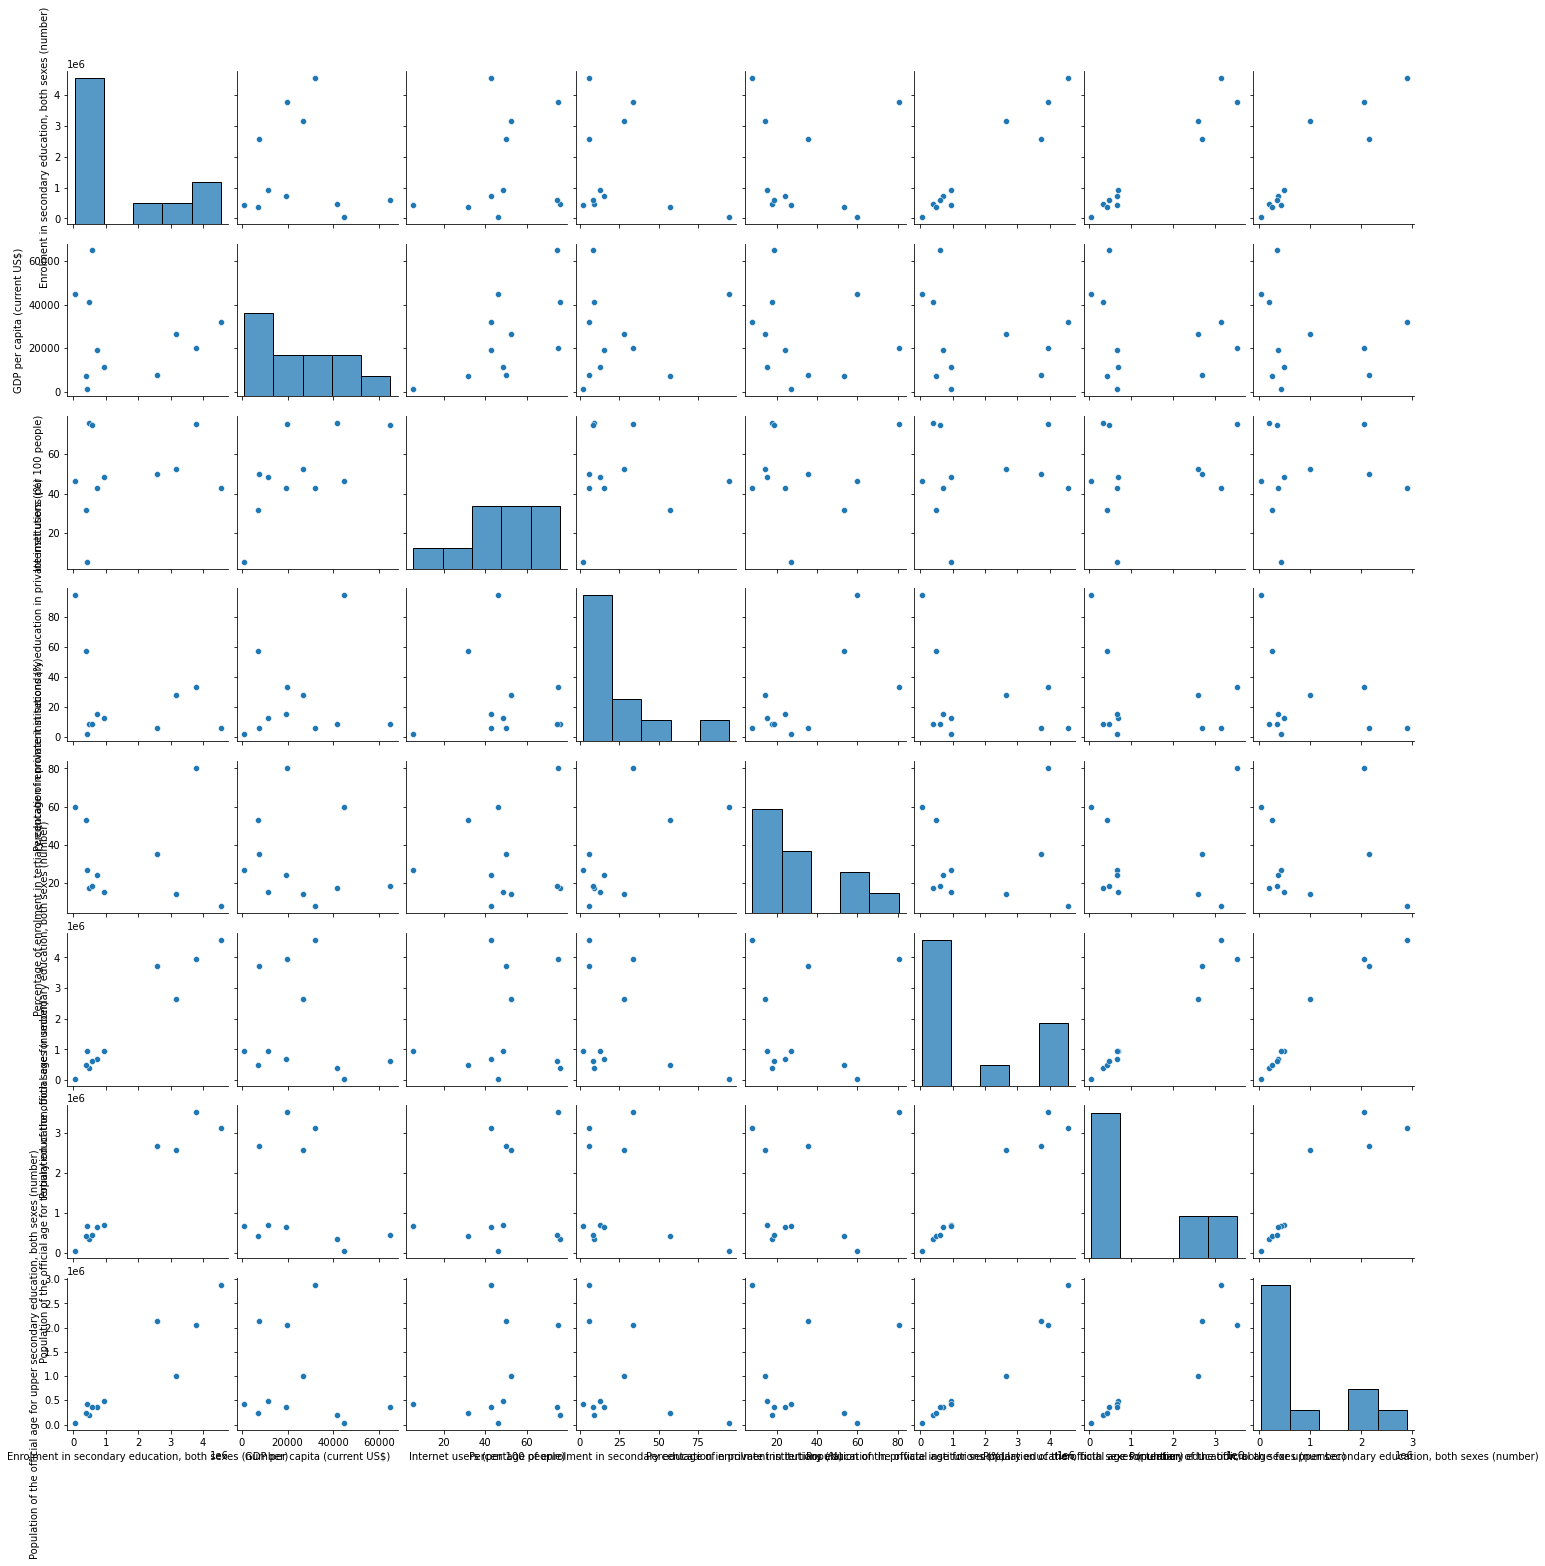

In [305]:
sns_plot = sns.pairplot(data_pivot_final)